# ALS Project

## Labs
- multi-subject
- make this tidy

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
#from functools import reduce
import pickle
from collections import defaultdict

### Functions

In [79]:
def linreg_scalers(df, subject_col, y_col, x_col, y_label):
    '''
    creates linear regression slopes, intercepts for every subject in a df.
    input:
        df = df
        subject_col = name of subject id column
        y_col = name of first y data column
        x_col = name of column with x values
        y_label = name of y feature (for table output)
    output:
        regression outputs in dataframe
    '''
    slopes = defaultdict()
    
    # list of every subject in table 
    subjects_list = list(np.unique(df[subject_col]))
    
    # for each subject
    for subj in subjects_list:
        data = df.loc[ df[subject_col]==subj].copy()
        y=data[y_col]
        x=data[x_col]

        # if only one record then skip
        if len(data)==1:
            continue
        # if missing values in x or y then skip
        if ~(y.isnull().any())  or (x.isnull().any()):
            y=np.array(y)
            x=np.array(x)
            # linregress is part of scipy.stats. 
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            slopes[subj] = (y_label, slope, intercept)

    # format as dataframe
    full_result = pd.DataFrame(slopes).transpose().reset_index()
    
    # relabel columns
    s_label = "slope_" + y_label 
    i_label = "intercept_" + y_label
    full_result.rename(index=str, columns={"index": "subject_id", 
                                      0: "test" ,1: s_label, 
                                      2: i_label }, inplace=True)
    
    # make small table
    mini_table = slope_mini_table(full_result.copy(), i_label)
    
    # return table
    return full_result, mini_table

In [80]:
def slope_mini_table(df, i_label):
    df.drop(['test', i_label], axis=1, inplace=True)
    df.dropna(axis=0, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [81]:
def make_lower(val):
    w=val.lower()
    return w

## Load data

In [3]:
#load original csv file
labs = pd.read_csv("data/Labs.csv")

In [4]:
labs.head(20)

subject_id                  Test_Name Test_Result Test_Unit  \
0          329                 Hemoglobin         130       g/L   
1          329                Urine Color      YELLOW       NaN   
2          329                  Uric Acid      237.92    umol/L   
3          329            ALPHA2-GLOBULIN           1      g/dL   
4          329                     Sodium         138    mmol/L   
5          329                    Glucose           -       NaN   
6          329                   Chloride         105    mmol/L   
7          329                Bicarbonate          21    mmol/L   
8          329      Segmented Neutrophils          66         %   
9          329                  Platelets         273    10E9/L   
10         329      Red Blood Cells (RBC)        2000    10E9/L   
11         329                    Glucose      4.9395    mmol/L   
12         329                 Hematocrit          41         %   
13         329          Bilirubin (Total)           0    umol/L   
14         329           IMMUNOGLOBULIN M          88     mg/dL   
15         329         Bilirubin (Direct)           0    umol/L   
16         329                 Fibrinogen         264     mg/dL   
17         329  Absolute Eosinophil Count           7    10E9/L   
18         329       Alkaline Phosphatase          66       U/L   
19         329           IMMUNOGLOBULIN A         115     mg/dL   

    Laboratory_Delta  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0  
10               0.0  
11               0.0  
12               0.0  
13               0.0  
14               0.0  
15               0.0  
16               0.0  
17               0.0  
18               0.0  
19               0.0

In [5]:
labs['study_day'] = labs["Laboratory_Delta"]
labs.drop("Laboratory_Delta", axis=1, inplace=True)

In [6]:
print(labs.shape)
labs.head()

(2445059, 5)


subject_id        Test_Name Test_Result Test_Unit  study_day
0         329       Hemoglobin         130       g/L        0.0
1         329      Urine Color      YELLOW       NaN        0.0
2         329        Uric Acid      237.92    umol/L        0.0
3         329  ALPHA2-GLOBULIN           1      g/dL        0.0
4         329           Sodium         138    mmol/L        0.0

In [7]:
# make lowercase location column
labs['test_name'] = labs['Test_Name'].apply(make_lower)

In [8]:
# what do test look like?
#sorted(list(labs['test_name'].unique()))

In [9]:
# what are the common lab tests?
tests = labs['test_name'].value_counts(ascending=True)
x = tests[tests<100]

In [10]:
len(x) # number of tests less than 100

93

In [11]:
len(tests) # total number of tests

222

In [12]:
#list(x.index)  # see which tests are too uncommon

In [13]:
# get rid of any tests where less than 100 values exist.
labs = labs[ ~labs['test_name'].isin(list(x.index))]

In [14]:
# check few tests gone from dataset = yes
#labs['test_name'].value_counts(ascending=True)

In [15]:
labs.head()

subject_id        Test_Name Test_Result Test_Unit  study_day  \
0         329       Hemoglobin         130       g/L        0.0   
1         329      Urine Color      YELLOW       NaN        0.0   
2         329        Uric Acid      237.92    umol/L        0.0   
3         329  ALPHA2-GLOBULIN           1      g/dL        0.0   
4         329           Sodium         138    mmol/L        0.0   

         test_name  
0       hemoglobin  
1      urine color  
2        uric acid  
3  alpha2-globulin  
4           sodium

In [16]:
# there are missing samples
labs[ (labs['subject_id']==329) & (labs['study_day']==0)]['test_name'].value_counts()

protein                                      2
white blood cell (wbc)                       2
red blood cells (rbc)                        2
glucose                                      2
potassium                                    1
chloride                                     1
hemoglobin                                   1
ck                                           1
calcium                                      1
alt(sgpt)                                    1
uric acid                                    1
gamma-globulin                               1
albumin                                      1
lactate dehydrogenase                        1
mean corpuscular hemoglobin concentration    1
monocytes                                    1
blood urea nitrogen (bun)                    1
partial thromboplastin time                  1
urine squamous epithelial cells              1
immunoglobulin g                             1
alkaline phosphatase                         1
creatinine   

In [17]:
dups = ['red blood cells (rbc)', 'glucose', 'protein', 'white blood cell (wbc)']

In [18]:
labs[ (labs['subject_id']==329) & (labs['study_day']==0) & 
            (labs['test_name'].isin(dups))]

subject_id               Test_Name Test_Result Test_Unit  study_day  \
5          329                 Glucose           -       NaN        0.0   
10         329   Red Blood Cells (RBC)        2000    10E9/L        0.0   
11         329                 Glucose      4.9395    mmol/L        0.0   
25         329                 Protein          70       g/L        0.0   
35         329                 Protein           -       NaN        0.0   
37         329  White Blood Cell (WBC)          10    10E9/L        0.0   
39         329  White Blood Cell (WBC)         7.5       NaN        0.0   
49         329   Red Blood Cells (RBC)        6000    10E9/L        0.0   

                 test_name  
5                  glucose  
10   red blood cells (rbc)  
11                 glucose  
25                 protein  
35                 protein  
37  white blood cell (wbc)  
39  white blood cell (wbc)  
49   red blood cells (rbc)

In [19]:
# replace the '-' with nans
labs['Test_Result'].replace('-', np.NaN, inplace=True)

In [20]:
labs[ (labs['subject_id']==329) & (labs['study_day']==0)]

subject_id                                  Test_Name Test_Result  \
0          329                                 Hemoglobin         130   
1          329                                Urine Color      YELLOW   
2          329                                  Uric Acid      237.92   
3          329                            ALPHA2-GLOBULIN           1   
4          329                                     Sodium         138   
5          329                                    Glucose         NaN   
6          329                                   Chloride         105   
7          329                                Bicarbonate          21   
8          329                      Segmented Neutrophils          66   
9          329                                  Platelets         273   
10         329                      Red Blood Cells (RBC)        2000   
11         329                                    Glucose      4.9395   
12         329                                 Hematocrit          41   
13         329                          Bilirubin (Total)           0   
14         329                           IMMUNOGLOBULIN M          88   
15         329                         Bilirubin (Direct)           0   
16         329                                 Fibrinogen         264   
17         329                  Absolute Eosinophil Count           7   
18         329                       Alkaline Phosphatase          66   
19         329                           IMMUNOGLOBULIN A         115   
20         329                                  AST(SGOT)          20   
21         329                             GAMMA-GLOBULIN           1   
22         329                     Urine Specific Gravity           1   
23         329                           IMMUNOGLOBULIN G           1   
24         329                                  Monocytes           3   
25         329                                    Protein          70   
26         329            Urine Squamous Epithelial Cells    Moderate   
27         329                Mean Corpuscular Hemoglobin          24   
28         329  Mean Corpuscular Hemoglobin Concentration          32   
29         329                                  Potassium           4   
30         329                    Mean Corpuscular Volume          74   
31         329                                 Phosphorus       1.292   
32         329                                         CK         350   
33         329                                    Free T4           8   
34         329                                Lymphocytes          23   
35         329                                    Protein         NaN   
36         329                Partial Thromboplastin Time          42   
37         329                     White Blood Cell (WBC)          10   
38         329                         C-Reactive Protein           1   
39         329                     White Blood Cell (WBC)         7.5   
40         329                      Lactate Dehydrogenase         139   
41         329                                    Calcium      2.2455   
42         329                  Blood Urea Nitrogen (BUN)      2.9208   
43         329                     Albumin/globulin ratio           1   
44         329                           Urine Appearance        HAZY   
45         329                                    Albumin          40   
46         329                                  Basophils           1   
47         329                              BETA-GLOBULIN           1   
48         329                                 Creatinine        88.4   
49         329                      Red Blood Cells (RBC)        6000   
50         329                             Urine Bacteria    Moderate   
51         329                                  ALT(SGPT)          18   
52         329                            ALPHA1-GLOBULIN           0   

   Test_Unit  study_day                                  test

In [21]:
# remove old 'Test_Name'
labs.drop('Test_Name', axis=1, inplace=True)

In [22]:
print(labs.shape)
labs.head()

(2444028, 5)


subject_id Test_Result Test_Unit  study_day        test_name
0         329         130       g/L        0.0       hemoglobin
1         329      YELLOW       NaN        0.0      urine color
2         329      237.92    umol/L        0.0        uric acid
3         329           1      g/dL        0.0  alpha2-globulin
4         329         138    mmol/L        0.0           sodium

In [23]:
# drop all observations from labs where 2 values are missing
labs.dropna(subset=['Test_Result'], inplace=True, how ='any', axis=0)

In [24]:
print(labs.shape)
labs.head(50)

(2394069, 5)


subject_id Test_Result Test_Unit  study_day  \
0          329         130       g/L        0.0   
1          329      YELLOW       NaN        0.0   
2          329      237.92    umol/L        0.0   
3          329           1      g/dL        0.0   
4          329         138    mmol/L        0.0   
6          329         105    mmol/L        0.0   
7          329          21    mmol/L        0.0   
8          329          66         %        0.0   
9          329         273    10E9/L        0.0   
10         329        2000    10E9/L        0.0   
11         329      4.9395    mmol/L        0.0   
12         329          41         %        0.0   
13         329           0    umol/L        0.0   
14         329          88     mg/dL        0.0   
15         329           0    umol/L        0.0   
16         329         264     mg/dL        0.0   
17         329           7    10E9/L        0.0   
18         329          66       U/L        0.0   
19         329         115     mg/dL        0.0   
20         329          20       U/L        0.0   
21         329           1      g/dL        0.0   
22         329           1       NaN        0.0   
23         329           1       NaN        0.0   
24         329           3         %        0.0   
25         329          70       g/L        0.0   
26         329    Moderate       NaN        0.0   
27         329          24   pg/cell        0.0   
28         329          32         %        0.0   
29         329           4    mmol/L        0.0   
30         329          74        fL        0.0   
31         329       1.292    mmol/L        0.0   
32         329         350       U/L        0.0   
33         329           8     ug/dL        0.0   
34         329          23         %        0.0   
36         329          42   seconds        0.0   
37         329          10    10E9/L        0.0   
38         329           1      mg/L        0.0   
39         329         7.5       NaN        0.0   
40         329         139       U/L        0.0   
41         329      2.2455    mmol/L        0.0   
42         329      2.9208    mmol/L        0.0   
43         329           1       NaN        0.0   
44         329        HAZY       NaN        0.0   
45         329          40       g/L        0.0   
46         329           1         %        0.0   
47         329           1       g/L        0.0   
48         329        88.4    umol/L        0.0   
49         329        6000    10E9/L        0.0   
50         329    Moderate       NaN        0.0   
51         329          18       U/L        0.0   

                                    test_name  
0                                  hemoglobin  
1                                 urine color  
2                                   uric acid  
3                             alpha2-globulin  
4                                      sodium  
6                                    chloride  
7                                 bicarbonate  
8                       segmented neutrophils  
9                                   platelets  
10                      red blood cells (rbc)  
11                                    glucose  
12                                 hematocrit  
13                          bilirubin (total)  
14                           immunoglobulin m  
15                         bilirubin (direct)  
16                                 fibrinogen  
17                  absolute eosinophil count  
18                       alkaline phosphatase  
19                           immunoglobulin a  
20                                  ast(sgot)  
21                             gamma-globulin  
22                     urine specific gravity  
23                           immunoglobulin g  
24                                  monocytes  
25                                    protein  
26            urine squamous epithelial cells  
27                mean corpuscular hemoglobin  
28  mean corpuscular hemoglobin concentration  
29        

In [25]:
# there are missing samples
labs[ (labs['subject_id']==329) & (labs['study_day']==0)]['test_name'].value_counts()

white blood cell (wbc)                       2
red blood cells (rbc)                        2
potassium                                    1
mean corpuscular hemoglobin concentration    1
alkaline phosphatase                         1
ck                                           1
protein                                      1
calcium                                      1
alt(sgpt)                                    1
uric acid                                    1
gamma-globulin                               1
albumin                                      1
chloride                                     1
c-reactive protein                           1
hemoglobin                                   1
monocytes                                    1
blood urea nitrogen (bun)                    1
partial thromboplastin time                  1
urine squamous epithelial cells              1
immunoglobulin g                             1
bicarbonate                                  1
creatinine   

In [26]:
# drop the white blood cells without a unit.
labs.drop(labs[ (labs['test_name']=='white blood cell (wbc)') & 
               (pd.isna(labs['Test_Unit'])==True)].index, inplace=True)

In [27]:
print(labs.shape)
labs.head()

(2389662, 5)


subject_id Test_Result Test_Unit  study_day        test_name
0         329         130       g/L        0.0       hemoglobin
1         329      YELLOW       NaN        0.0      urine color
2         329      237.92    umol/L        0.0        uric acid
3         329           1      g/dL        0.0  alpha2-globulin
4         329         138    mmol/L        0.0           sodium

In [28]:
labs[ (labs['subject_id']==329) & (labs['test_name']=='red blood cells (rbc)')]

subject_id Test_Result Test_Unit  study_day              test_name
10          329        2000    10E9/L        0.0  red blood cells (rbc)
49          329        6000    10E9/L        0.0  red blood cells (rbc)
58          329        5000    10E9/L       42.0  red blood cells (rbc)
122         329        5000    10E9/L       72.0  red blood cells (rbc)
172         329        6000    10E9/L      106.0  red blood cells (rbc)
194         329        6000    10E9/L      135.0  red blood cells (rbc)
267         329        5000    10E9/L      168.0  red blood cells (rbc)
287         329         500    10E9/L      189.0  red blood cells (rbc)
311         329        5000    10E9/L      189.0  red blood cells (rbc)
340         329        5000    10E9/L      212.0  red blood cells (rbc)
393         329        6000    10E9/L      247.0  red blood cells (rbc)
410         329        4000    10E9/L      274.0  red blood cells (rbc)
424         329        5000    10E9/L      274.0  red blood cells (rbc)

In [29]:
# make a table of just 'red blood cells (rbc)'
red = labs[labs['test_name']=='red blood cells (rbc)']

In [30]:
red.head()

subject_id Test_Result Test_Unit  study_day              test_name
10          329        2000    10E9/L        0.0  red blood cells (rbc)
49          329        6000    10E9/L        0.0  red blood cells (rbc)
58          329        5000    10E9/L       42.0  red blood cells (rbc)
122         329        5000    10E9/L       72.0  red blood cells (rbc)
172         329        6000    10E9/L      106.0  red blood cells (rbc)

In [31]:
# keep only red blood cell values with higher score
for subject in list(red['subject_id'].unique()):
    # index of all the redblood cells test results for this subject
    inx = list(red[ (red['subject_id']==subject) &
                (red['test_name']=='red blood cells (rbc)') ].index)
    if len(inx)>1:
        # unique days for this subject
        days=red.iloc[inx,3].unique()
        # for each unique day
        for d in days:
            # table of unique days
            near = red[ (red['subject_id']==subject) &
                        (red['study_day']== d) & 
                        (red['test_name']=='red blood cells (rbc)')]['Test_Result'].astype(float)
            # drop the row from labs table with lowest RBC value
            if len(near)>1:
                labs.drop(near.idxmin(), inplace=True)


IndexError: positional indexers are out-of-bounds

In [59]:
print(labs.shape)
labs.head()

(2389645, 5)


subject_id Test_Result Test_Unit  study_day        test_name
0         329         130       g/L        0.0       hemoglobin
1         329      YELLOW       NaN        0.0      urine color
2         329      237.92    umol/L        0.0        uric acid
3         329           1      g/dL        0.0  alpha2-globulin
4         329         138    mmol/L        0.0           sodium

In [35]:
'''
#The onset data is being left off for now. The following works.

# add the onset data
tdrod = pd.read_csv("clean_data/tdrod.csv")
tdrod.head()
onset_dates = tdrod[['subject_id', 'Study_Arm', 'Onset_Delta']]
# merge onset data with labs
labs_onset = labs.merge(onset_dates, how='left', on='subject_id')
print(labs_onset.shape)
labs_onset.head()
labs_onset['days_from_onset'] = np.abs(labs_onset['Onset_Delta']) + labs_onset['study_day']
labs_onset.drop('Onset_Delta', axis=1, inplace=True)
print(labs_onset.shape)
labs_onset.head()
'''

In [61]:
#separate lab data into several smaller tables

lab_dfs=[]
for inx, t in enumerate(list(labs['test_name'].unique())):
    new_lab = labs[ labs['test_name'] == t].copy().reset_index(drop=True)
    new_lab[t]=new_lab['Test_Result']
    new_lab[t+' unit']=new_lab['Test_Unit']
    new_lab.drop(['test_name', 'Test_Unit', 'Test_Result'], axis=1, inplace=True)
    if inx == 0:
        final_lab = new_lab
    lab_dfs.append(new_lab)

In [65]:
lab_dfs[0].head()

subject_id  study_day hemoglobin hemoglobin unit
0         329        0.0        130             g/L
1         329       42.0        120             g/L
2         329       72.0        120             g/L
3         329      106.0        120             g/L
4         329      135.0        120             g/L

In [66]:
# pickle the table list
with open('labs_list.pkl', 'wb') as f:
    pickle.dump(lab_dfs, f)

# Explore the data

In [67]:
# open the pickle file
with open('labs_list.pkl', 'rb') as f:
    labs_dfs = pickle.load(f)

## Hemoglobin

In [68]:
hemo=labs_dfs[0]

In [69]:
hemo.head()

subject_id  study_day hemoglobin hemoglobin unit
0         329        0.0        130             g/L
1         329       42.0        120             g/L
2         329       72.0        120             g/L
3         329      106.0        120             g/L
4         329      135.0        120             g/L

In [71]:
# hemoglobin units  #  all 'g/L'
hemo['hemoglobin unit'].unique()

array(['g/L'], dtype=object)

In [82]:
# create linear regression lines for each subject's response
df = hemo.copy()

# the columns
subject_col='subject_id'
y_col='hemoglobin'
x_col='study_day'
y_label = 'hemoglobin_g/L'

# the function
full, mini = linreg_scalers(df, subject_col, y_col, x_col, y_label)


NameError: name 'linregress' is not defined

In [48]:
def plot_lab_result(df, subset_factor=None):
    '''
    subset_factor = string. column name
    '''
    if subset_factor!=None:
        f_list = list(df[subset_factor].unique())
    
    subjects = df['subject_id'].unique()
    test = df.columns[4]
    unit = df.iloc[0,5]

    print("Number of subjects: {}".format(len(subjects)))
    print("Number results in table: {}".format(len(df)))
    #f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
    
    plt.figure(figsize=(12,6))
    # make a line for each subject
    for subject in subjects:
        sub = df[ df['subject_id'] == subject]
        '''
        # color by subset_factor
        #if np.any(sub[subset_factor]=='Yes'):
            #color = 'red'
        #else:
            #color = 'gray'
        '''
        color='gray'
        '''
        # if factor == to some value:
            ax1.plot(sub['days_since_onset'], sub['ALSFRS_Total'], color=color,
                     alpha=0.5, linewidth=1)
        else:
            ax2.plot(sub['days_since_onset'], sub['ALSFRS_R_Total'], color=color,
                     alpha=0.5, linewidth=1)
        '''
        plt.plot(sub['days_from_onset'], sub[test], color=color,
                     alpha=0.5, linewidth=1)
    
    # plotting particulars
    if subset_factor!=None:
        ax1.set_title("{} : {} ".format(test, ))
        ax2.set_title('Revised Function Assess')
    else:
        plt.title(test)
    plt.xlabel("days_from_onset")
    plt.ylabel(test+" "+unit)
    #plt.ylim(bottom=0, top=50)
    #plt.xlim(left=0, right=4000)
    plt.show()

Number of subjects: 500
Number results in table: 64070


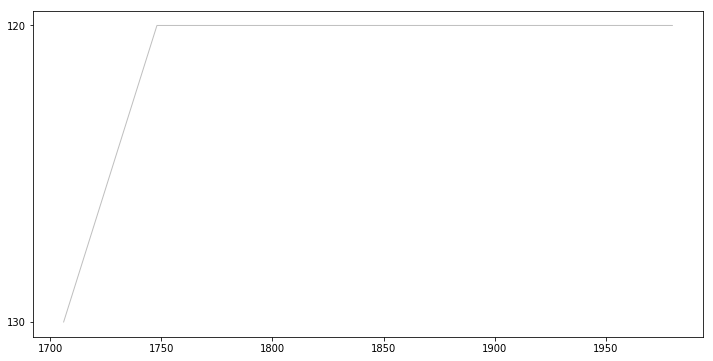

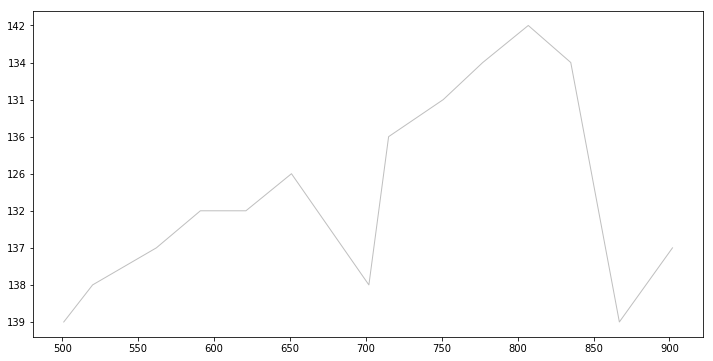

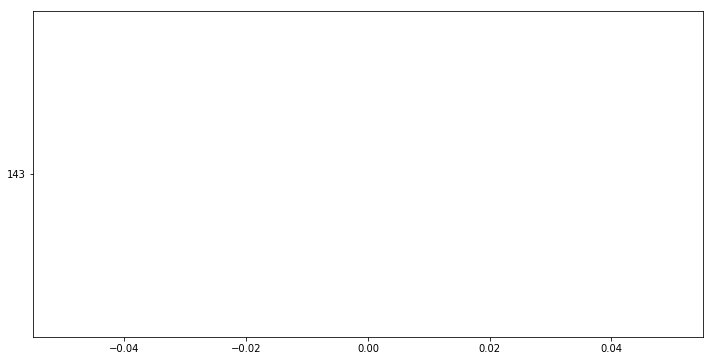

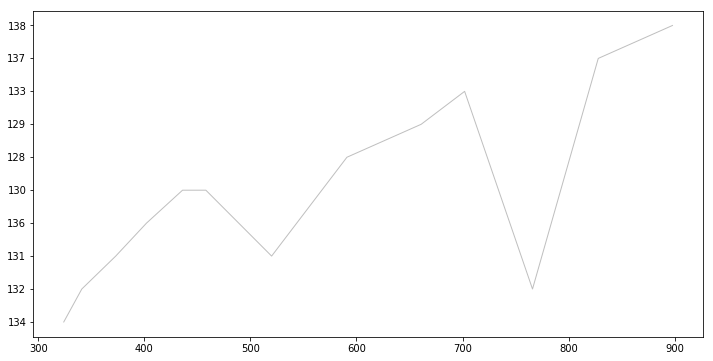

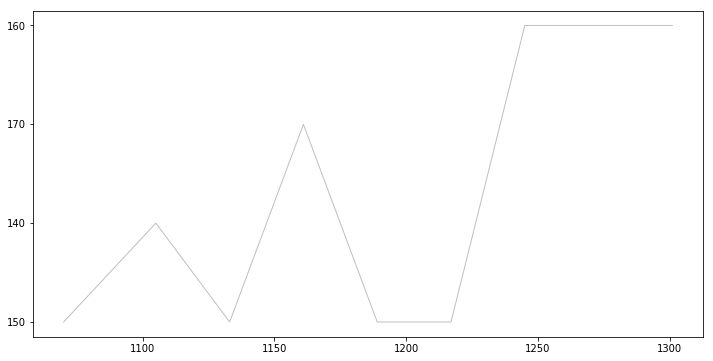

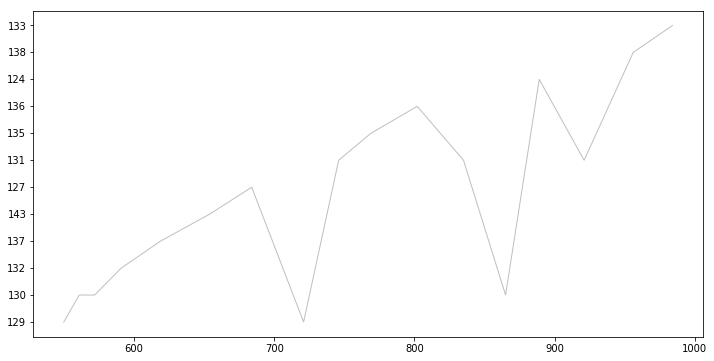

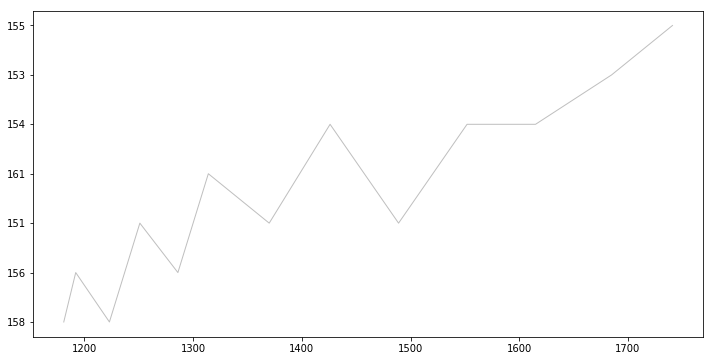

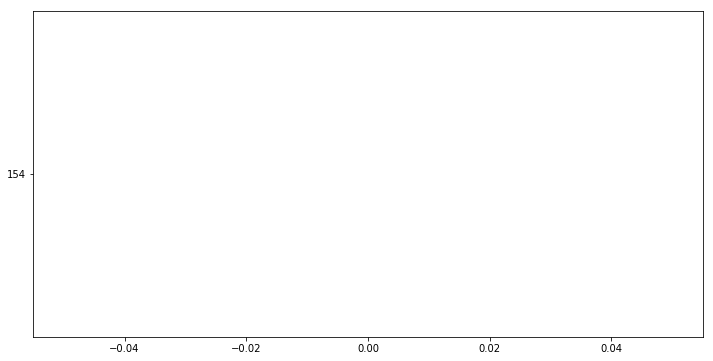

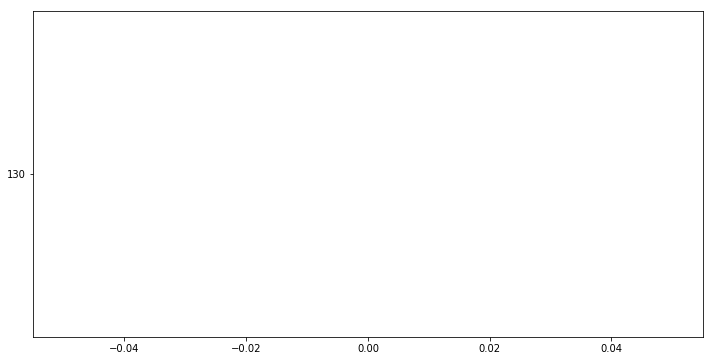

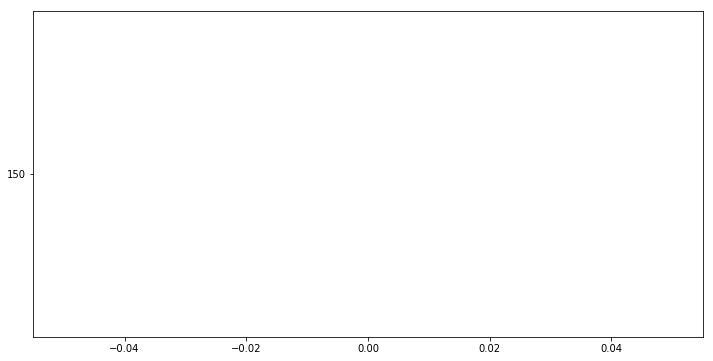

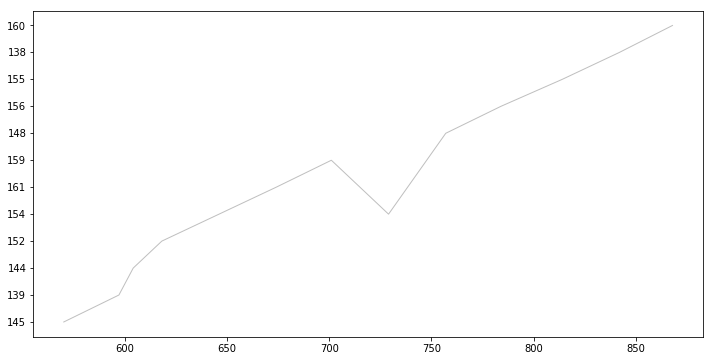

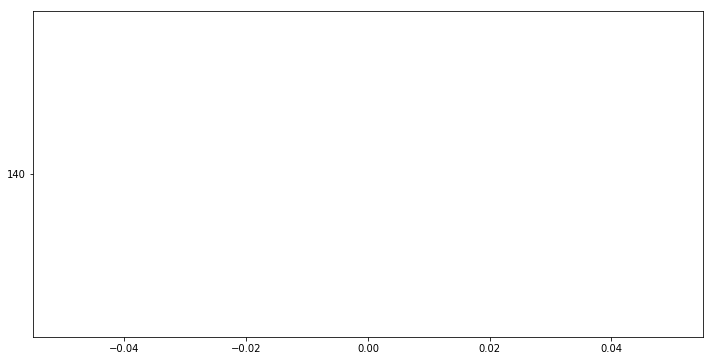

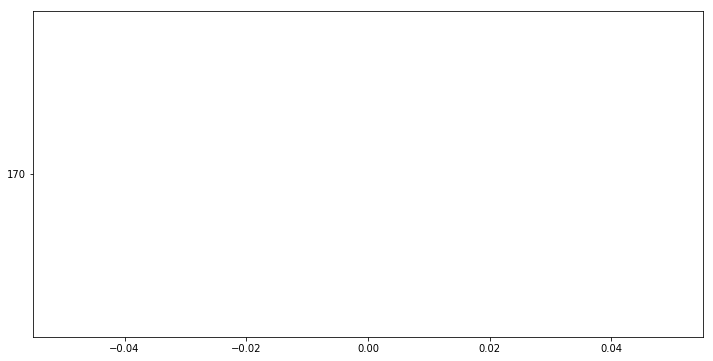

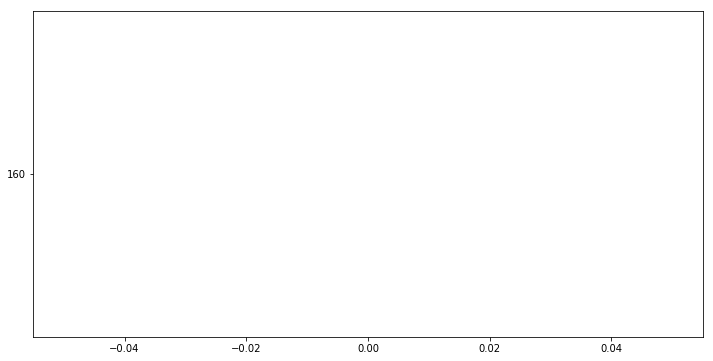

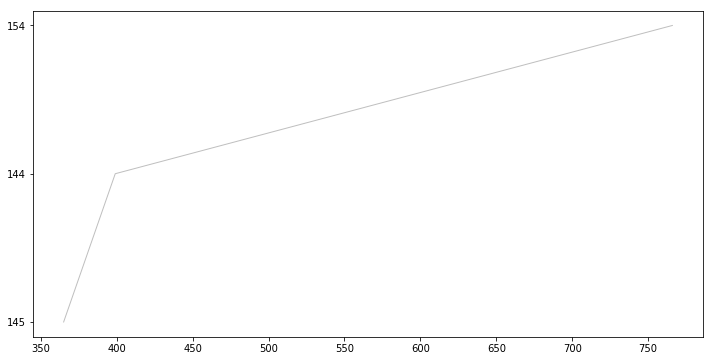

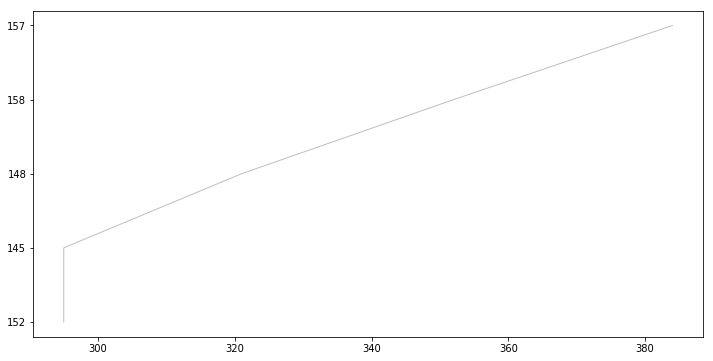

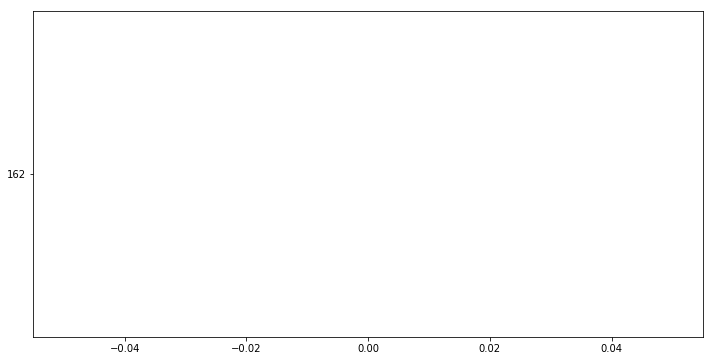

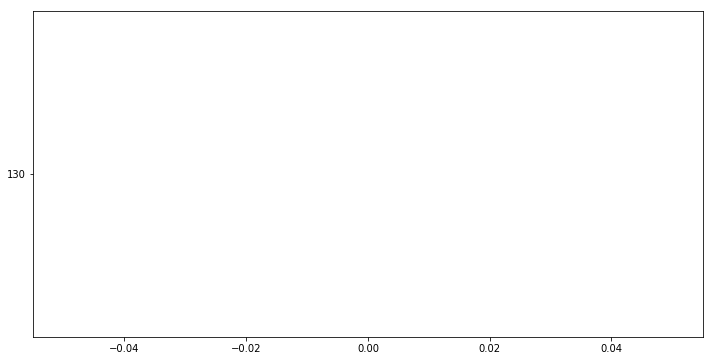

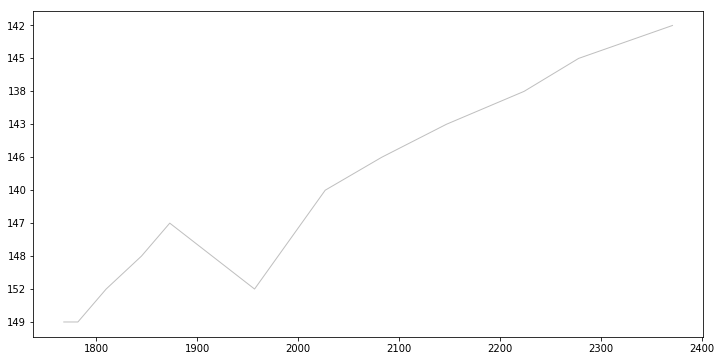

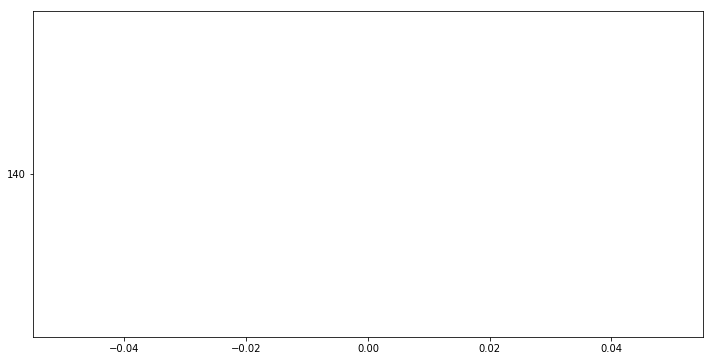

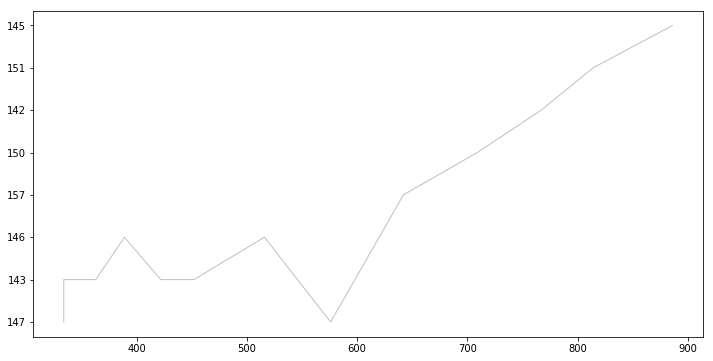

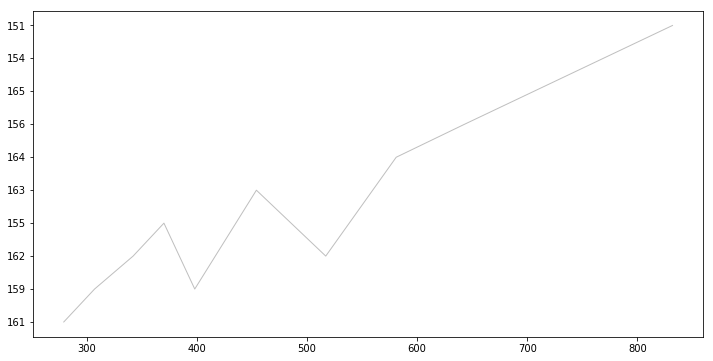

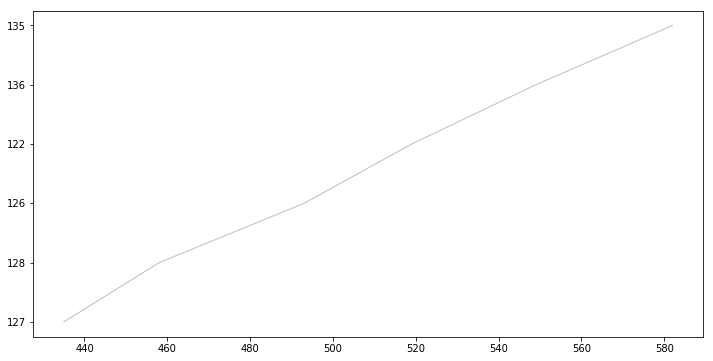

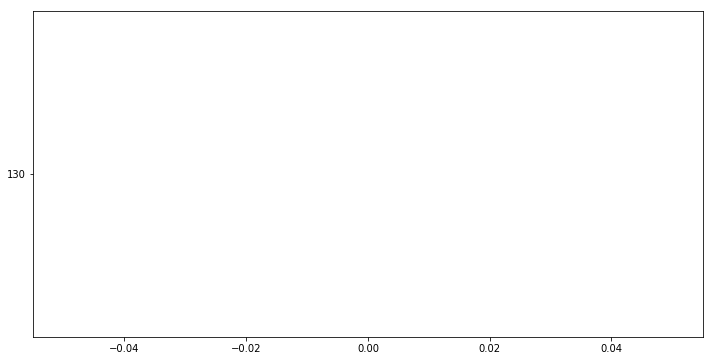

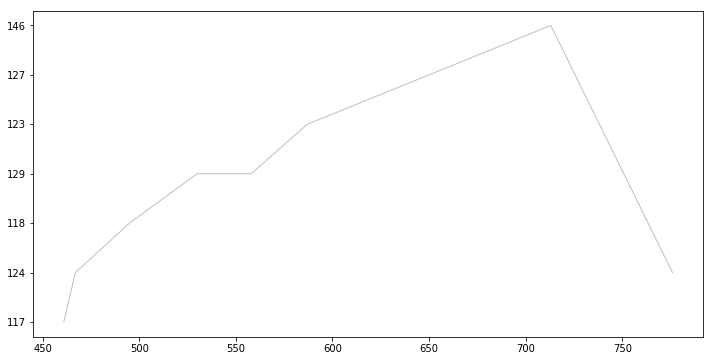

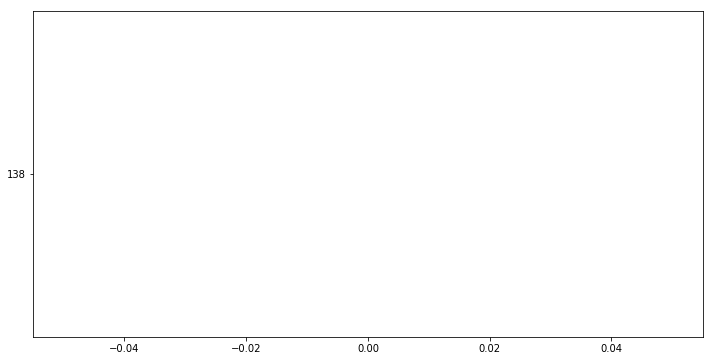

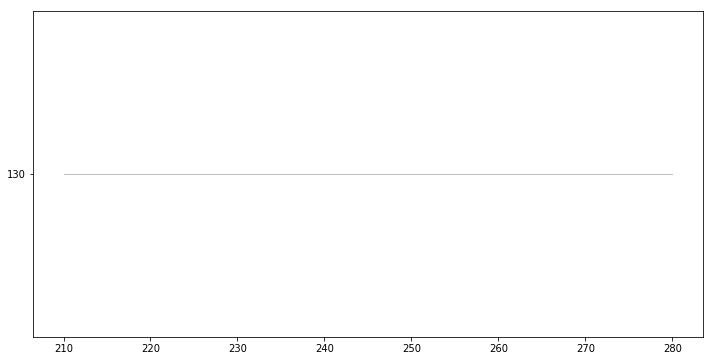

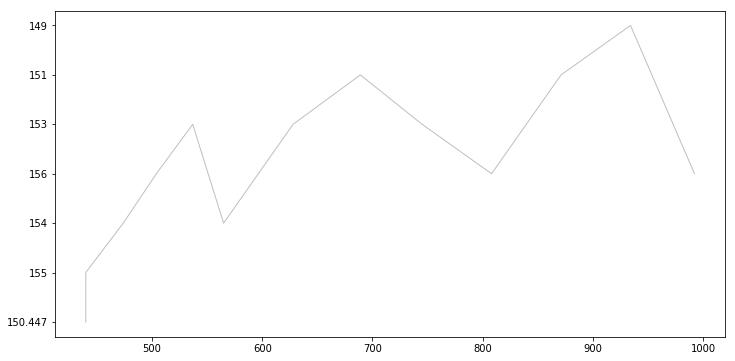

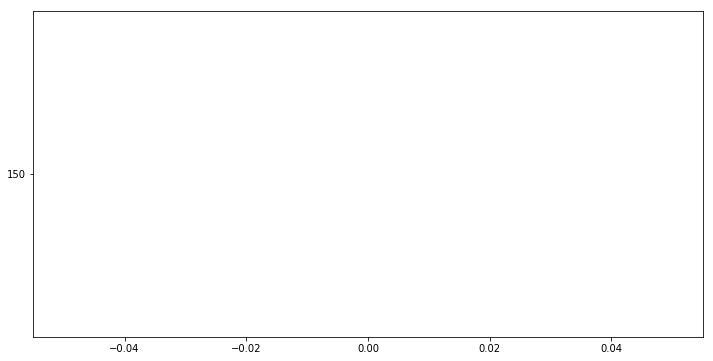

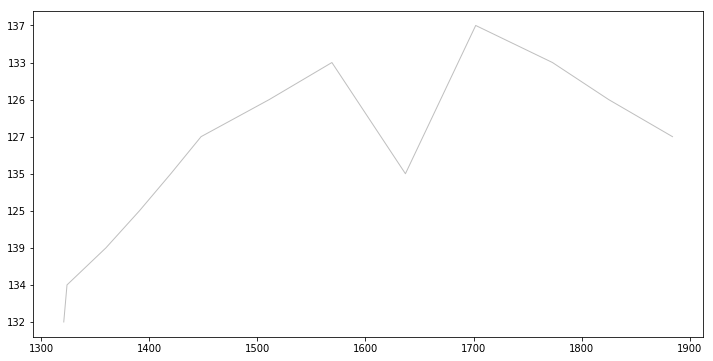

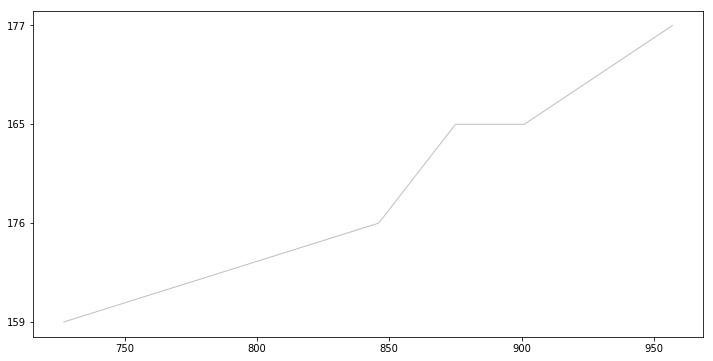

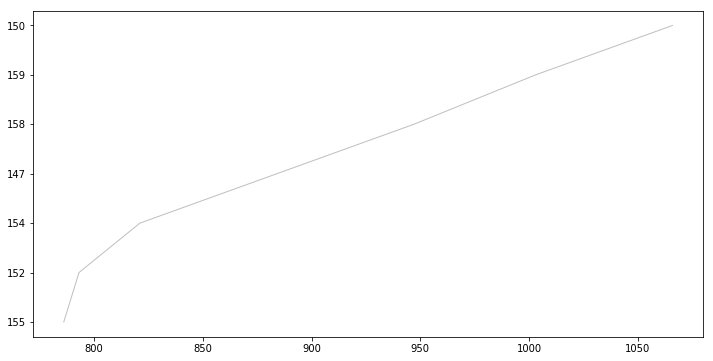

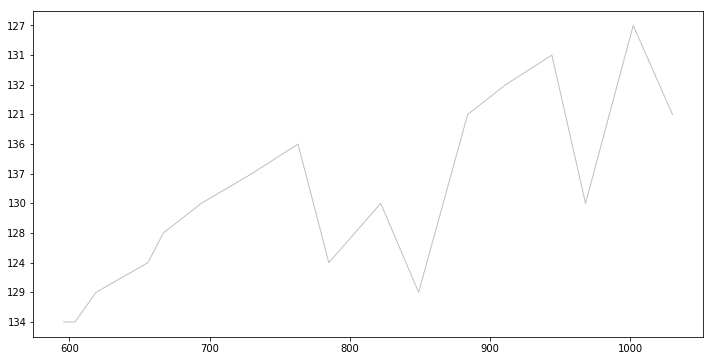

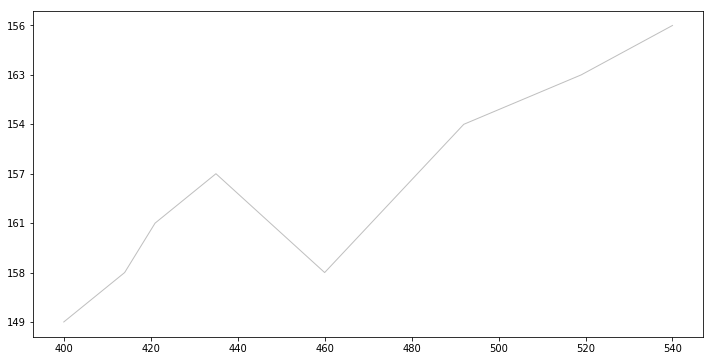

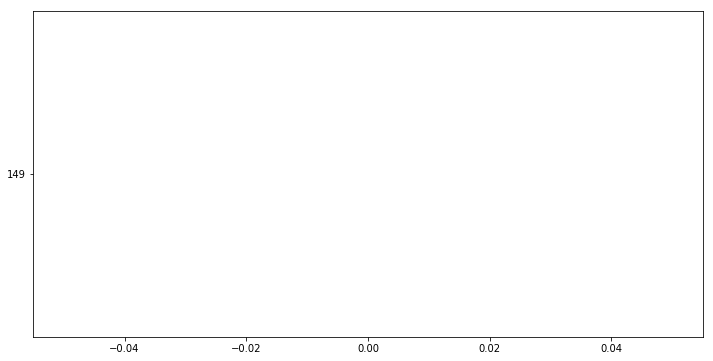

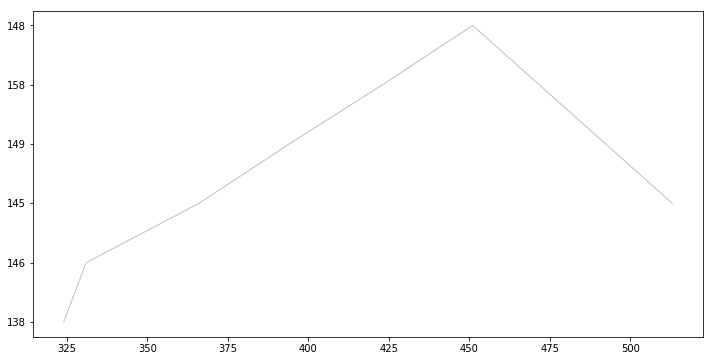

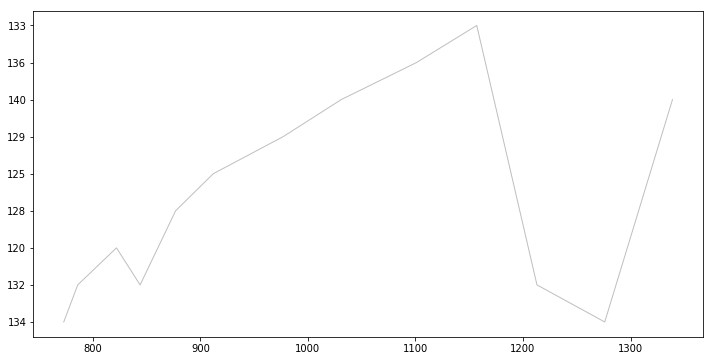

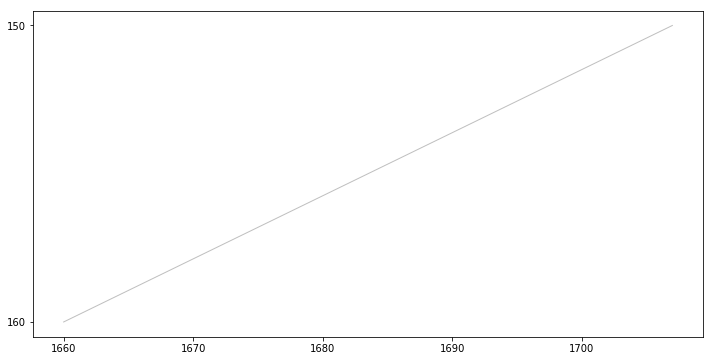

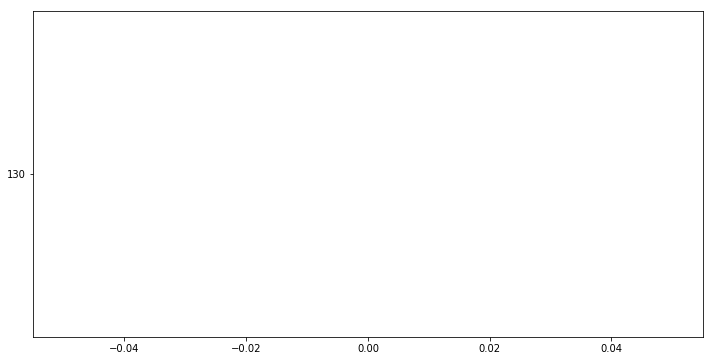

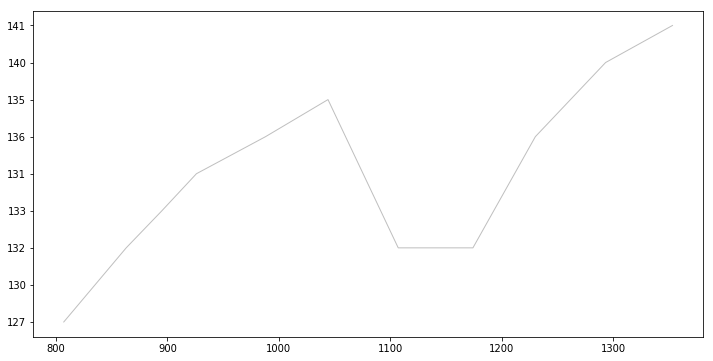

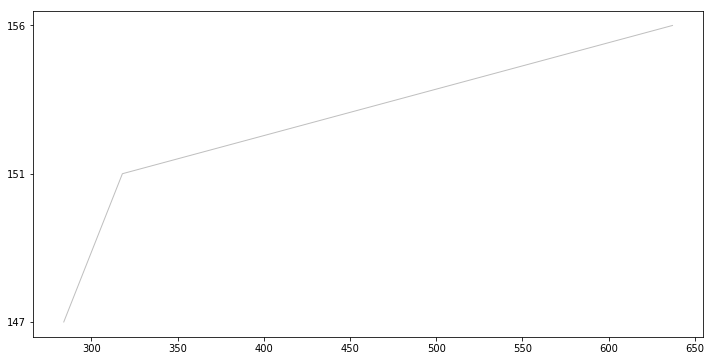

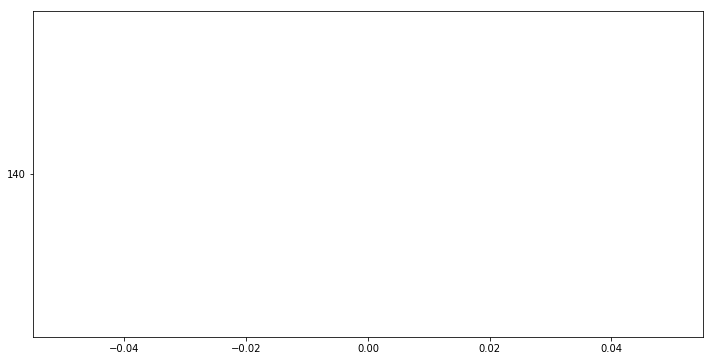

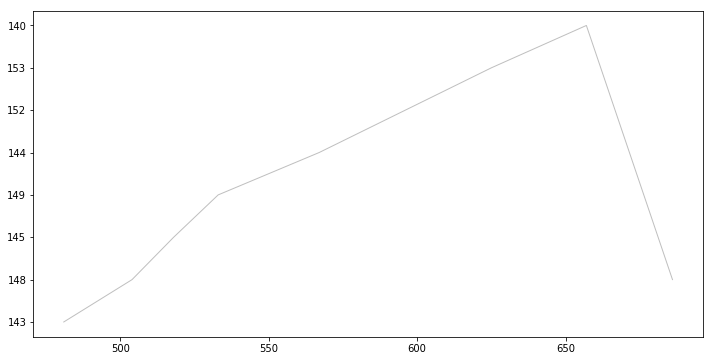

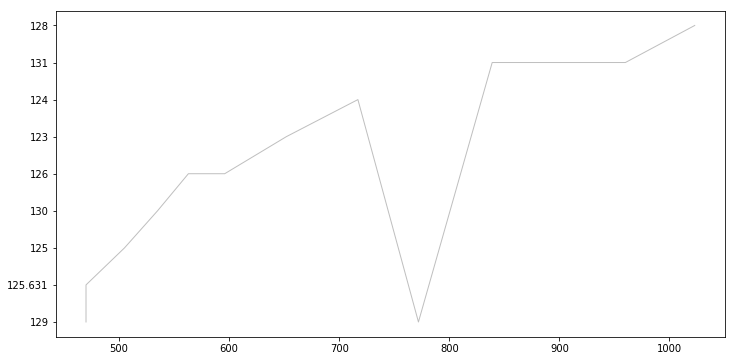

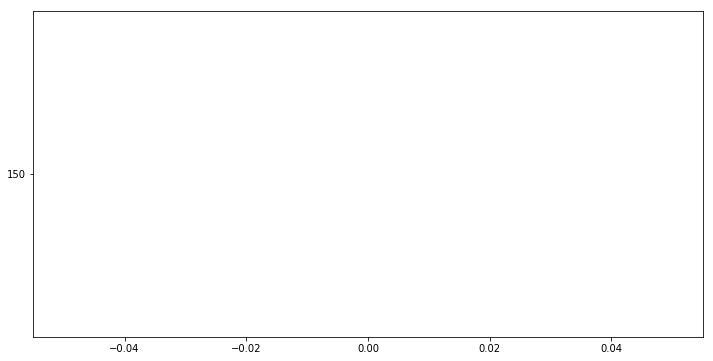

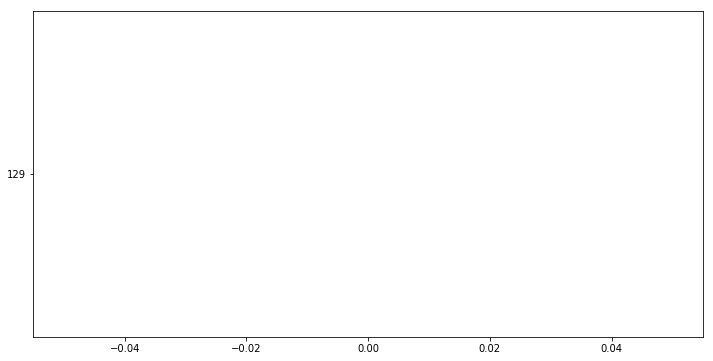

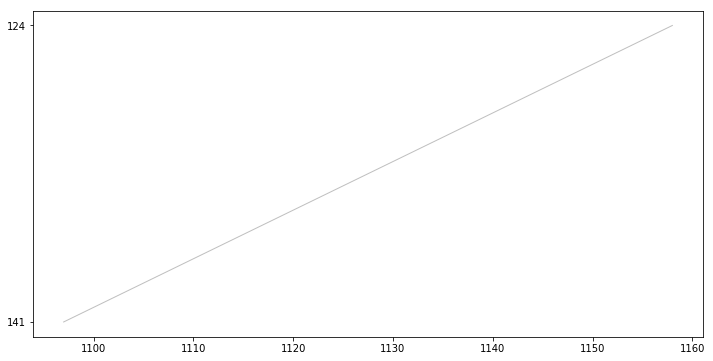

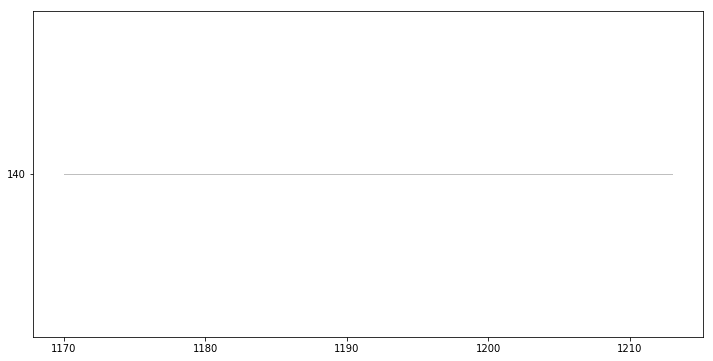

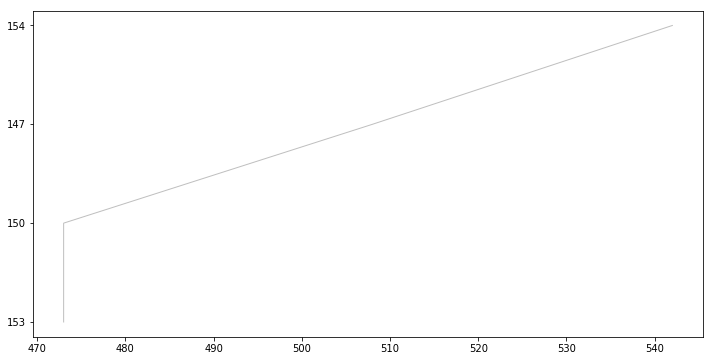

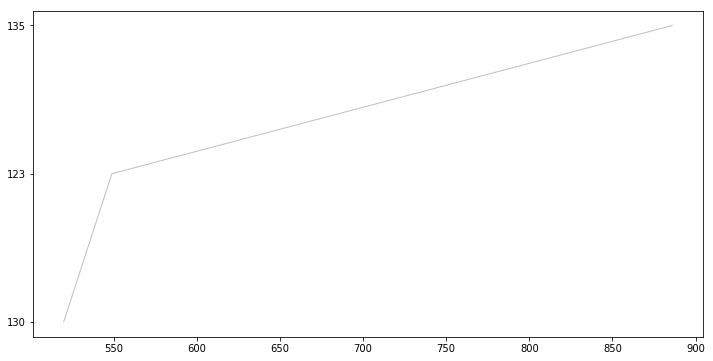

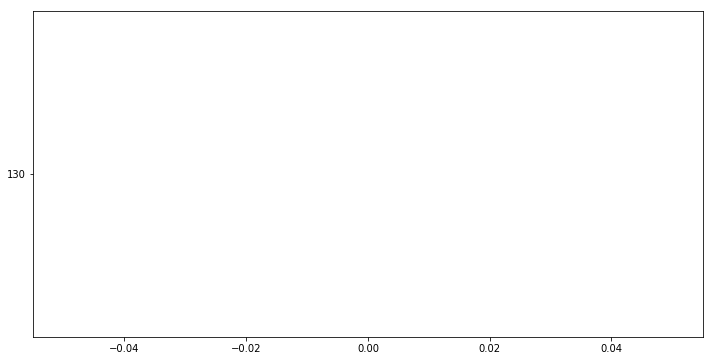

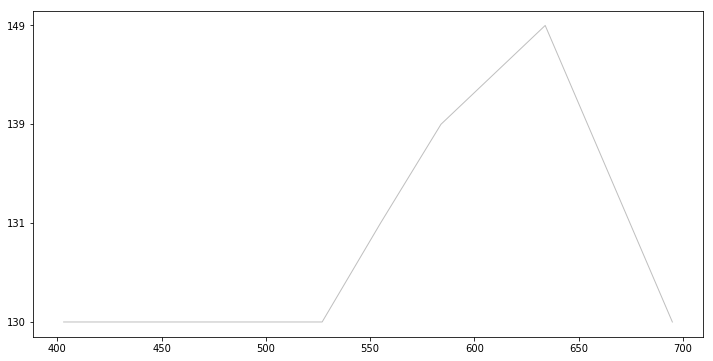

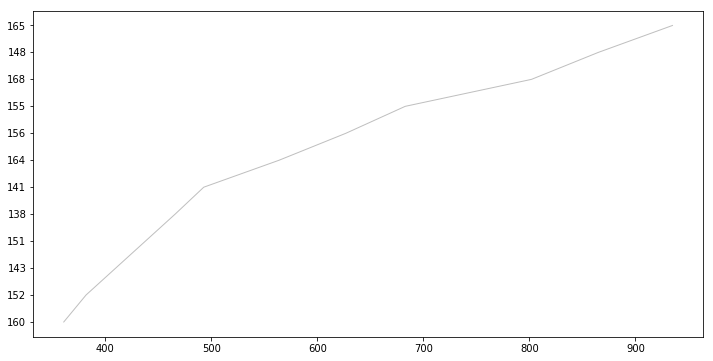

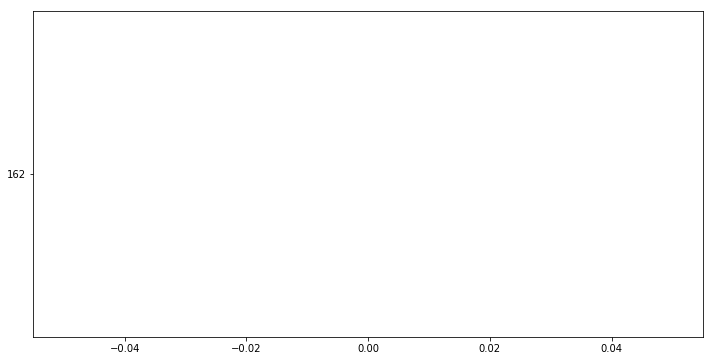

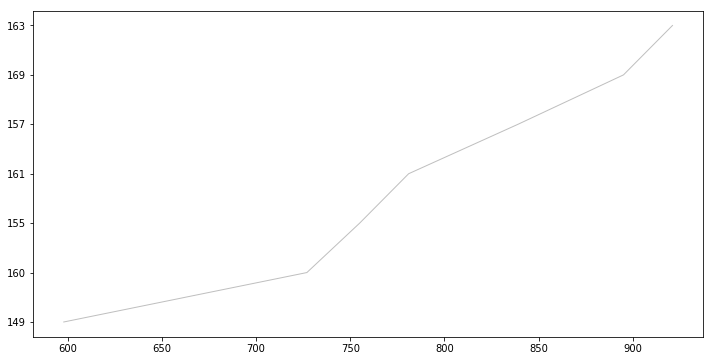

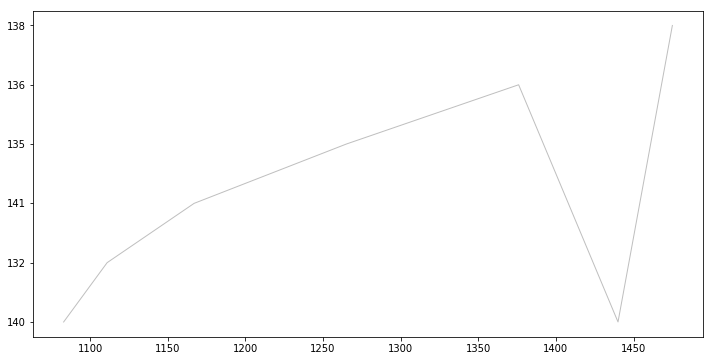

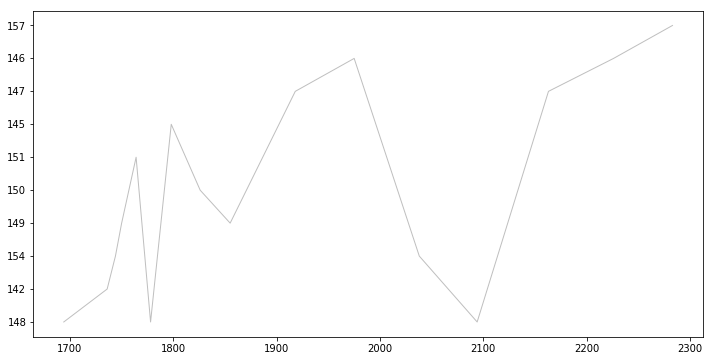

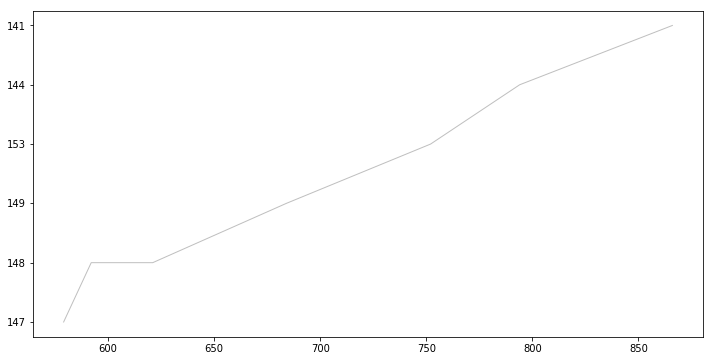

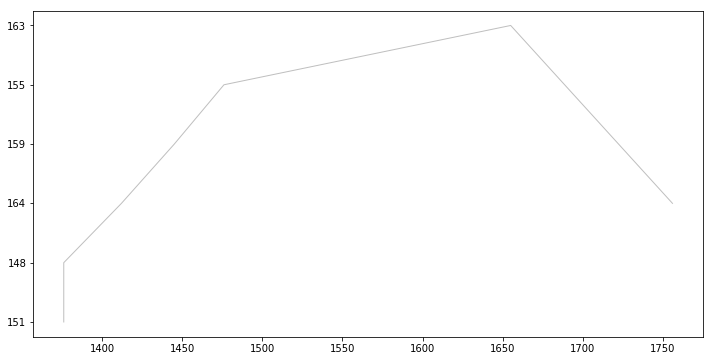

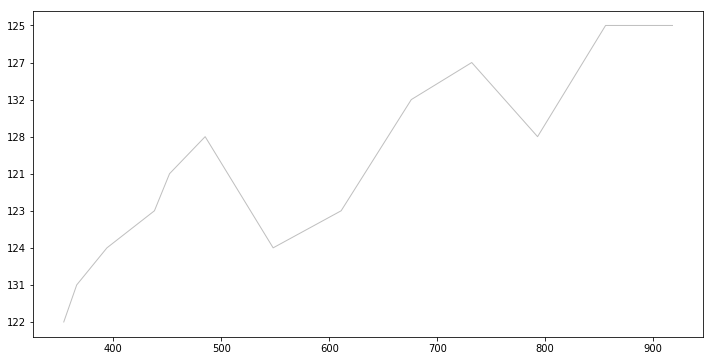

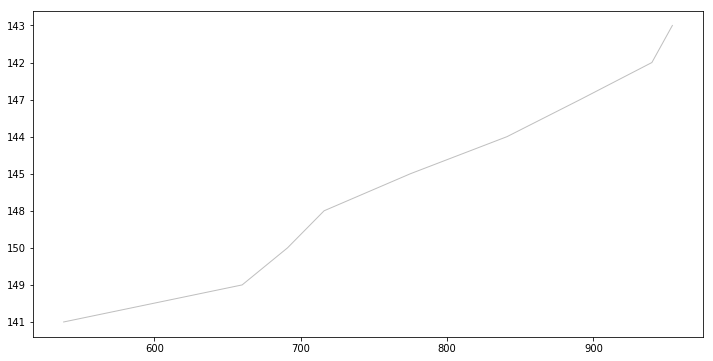

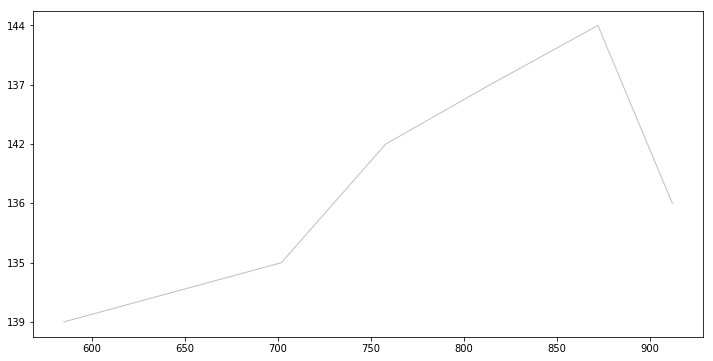

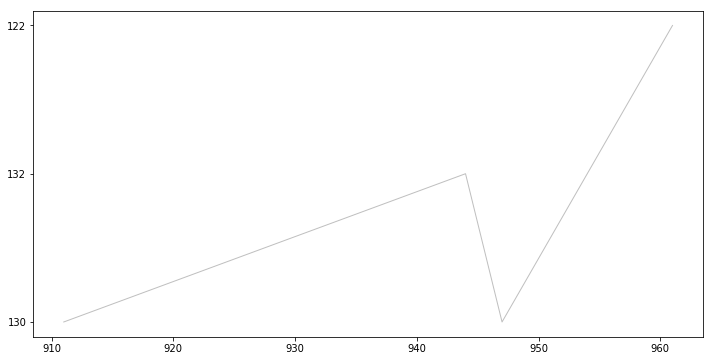

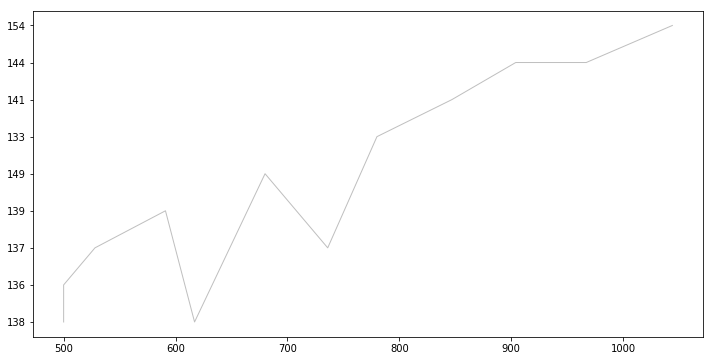

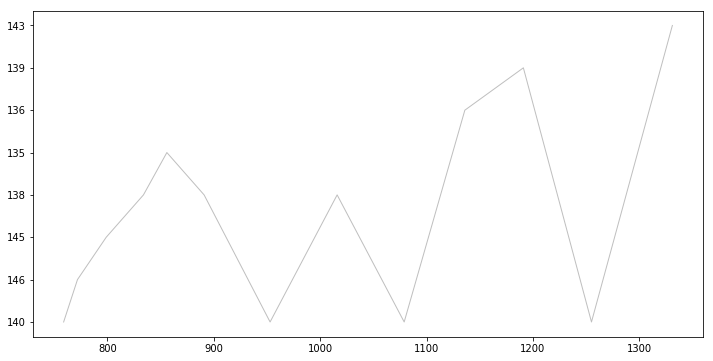

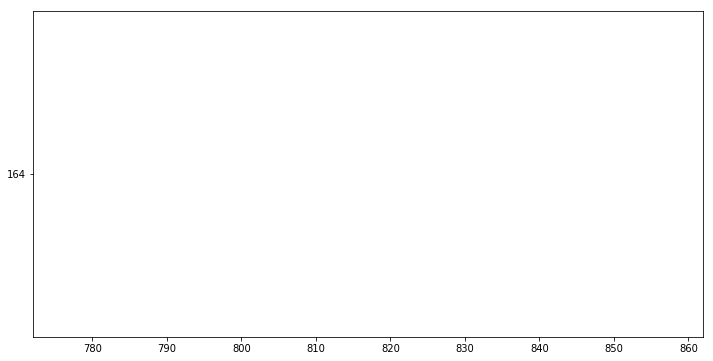

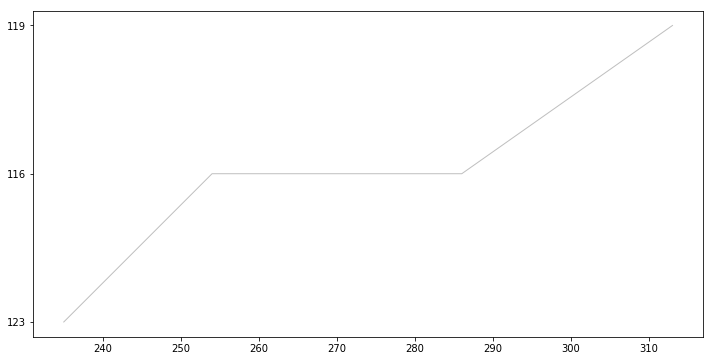

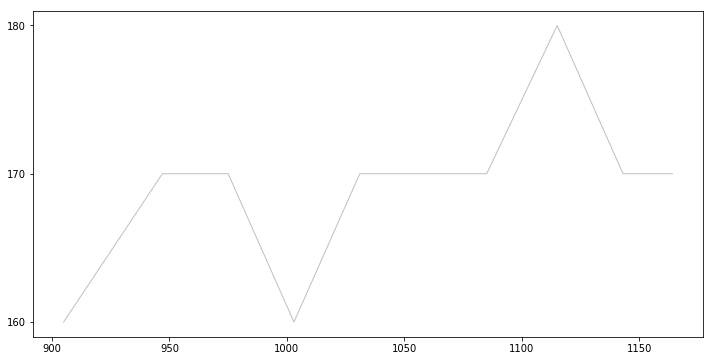

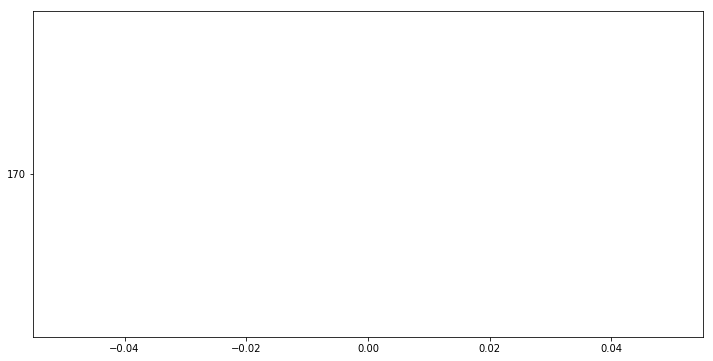

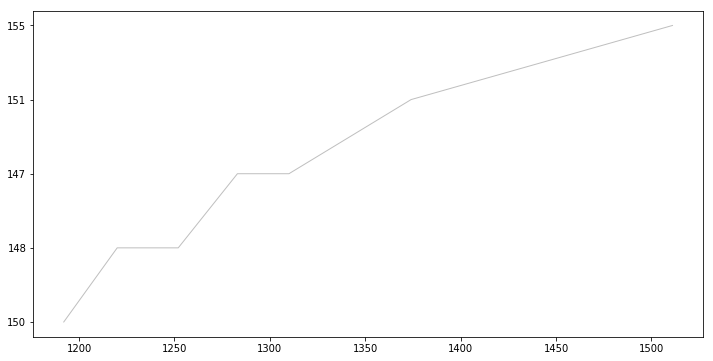

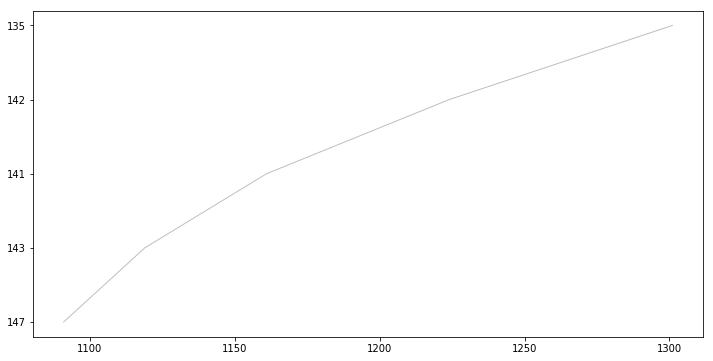

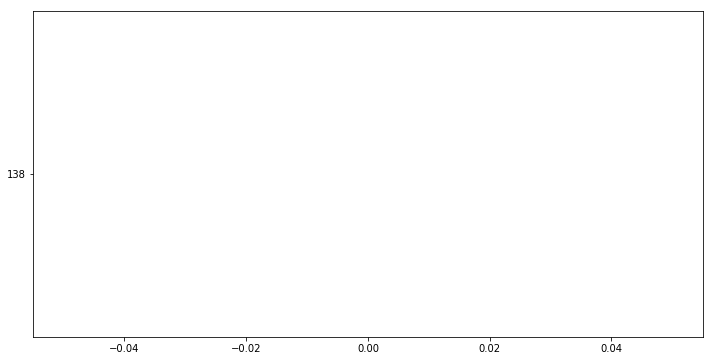

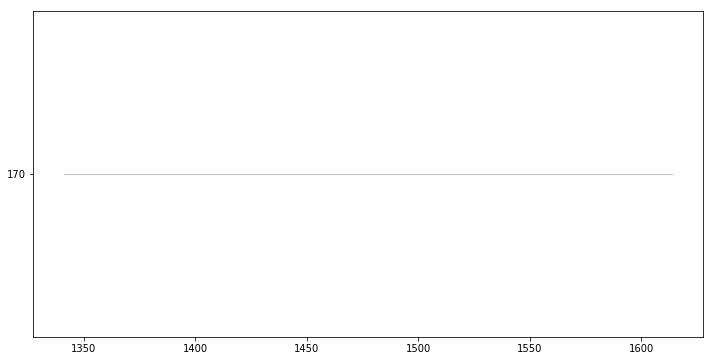

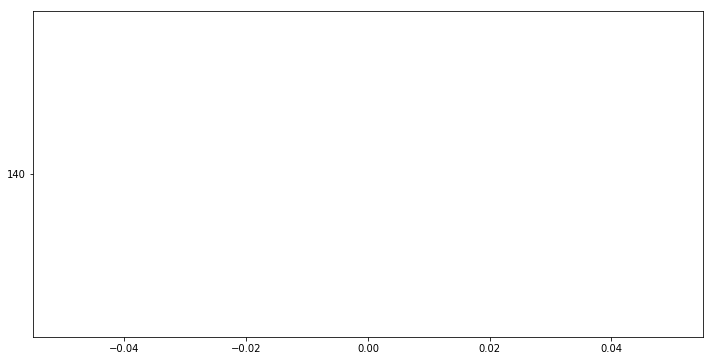

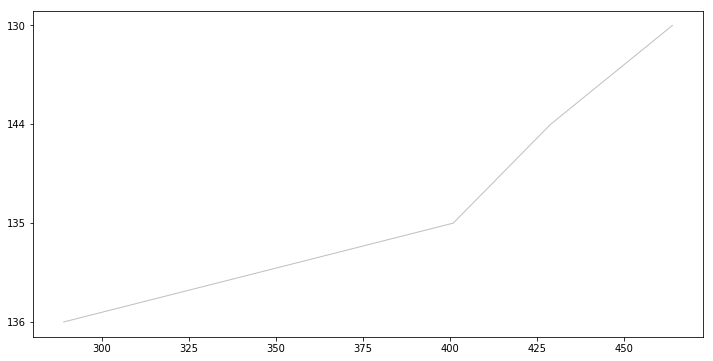

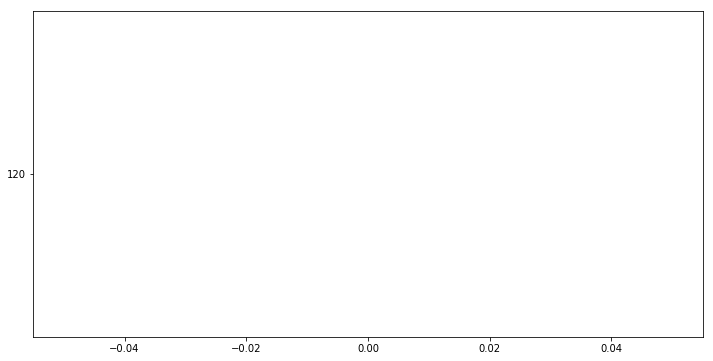

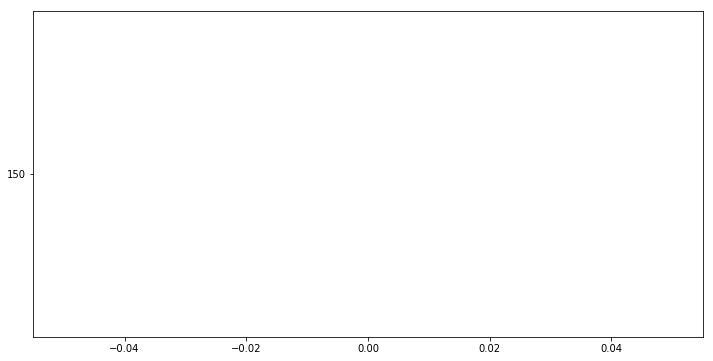

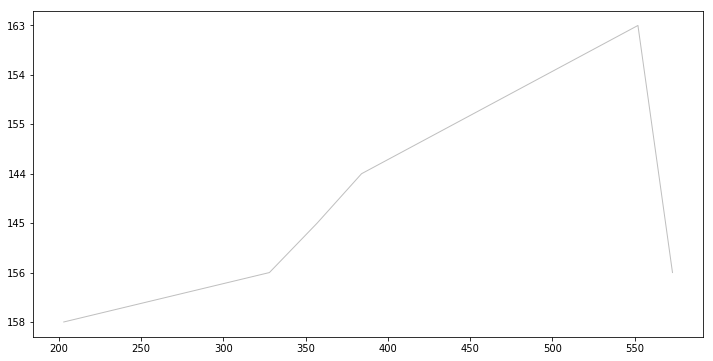

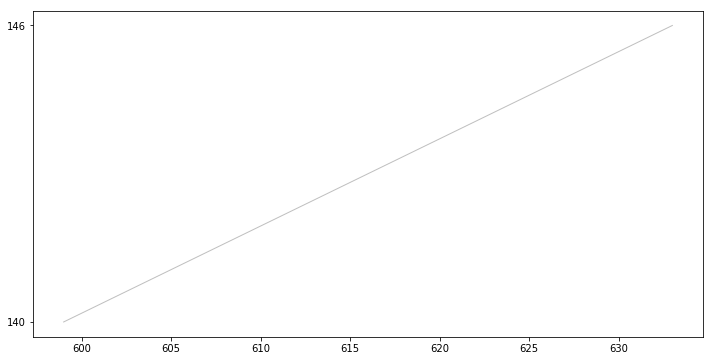

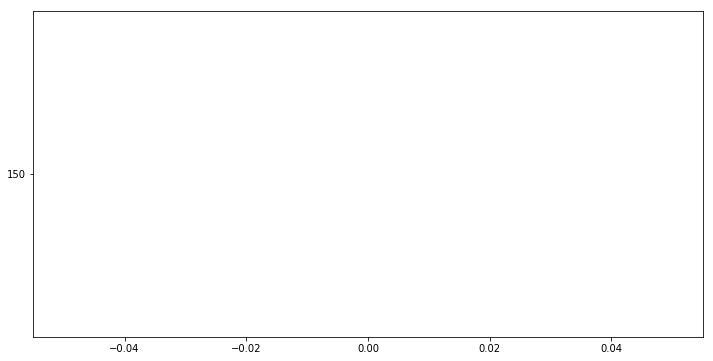

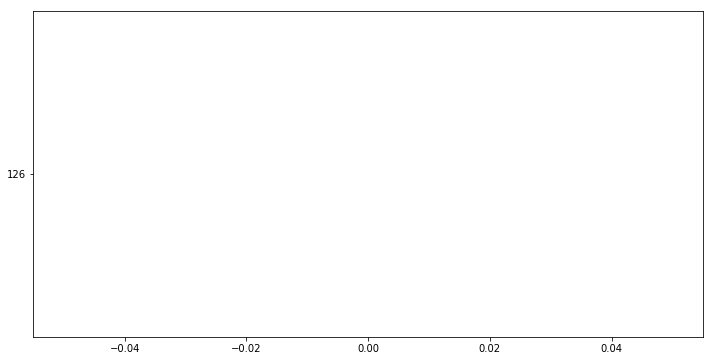

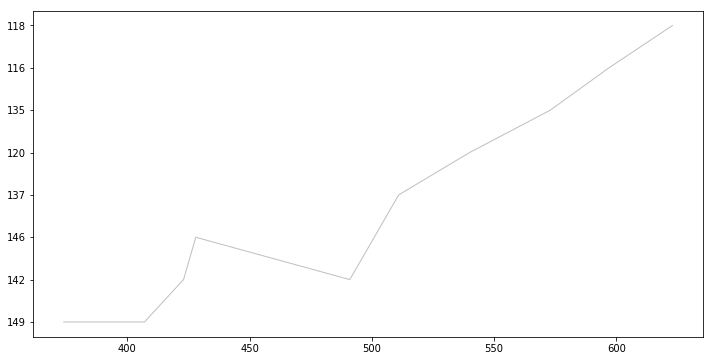

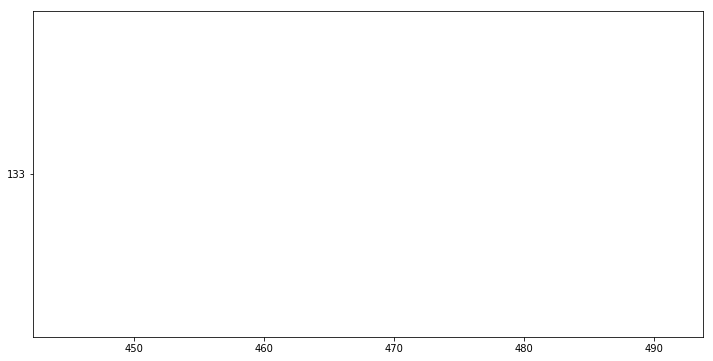

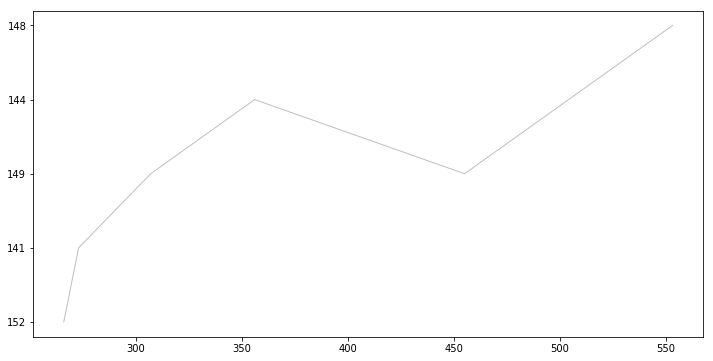

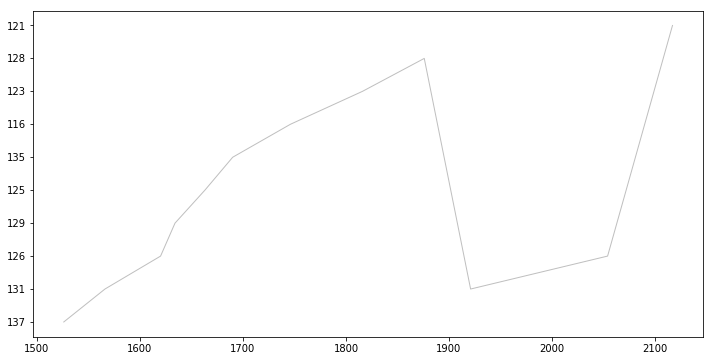

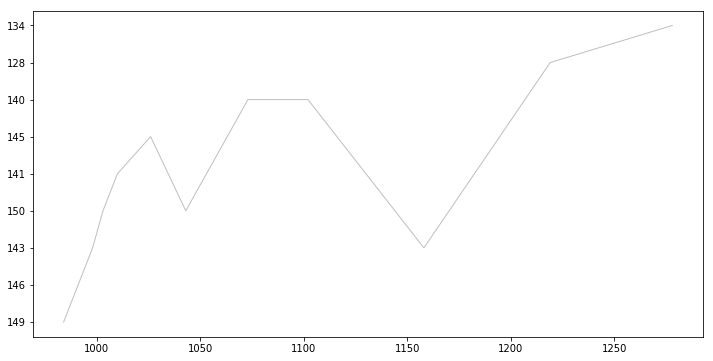

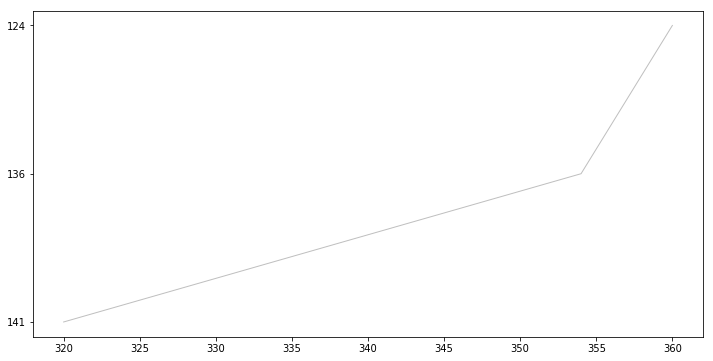

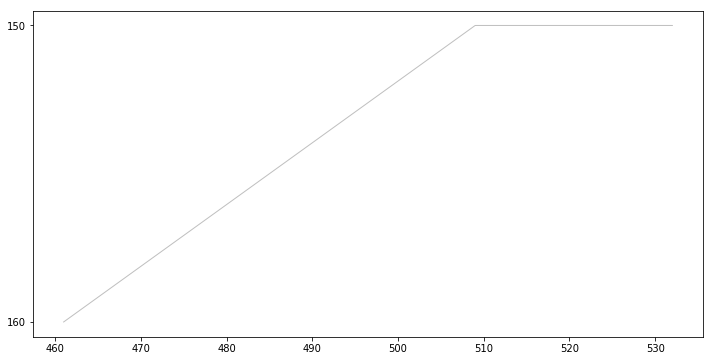

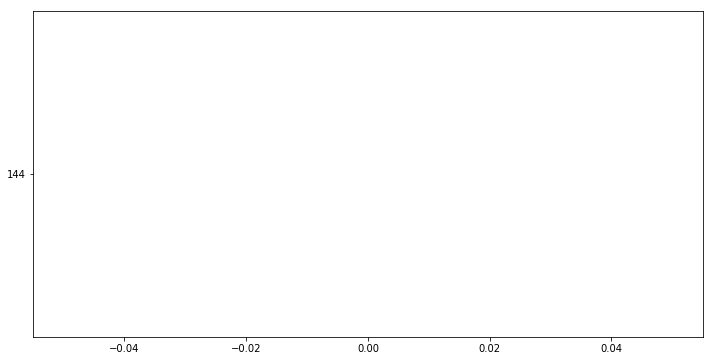

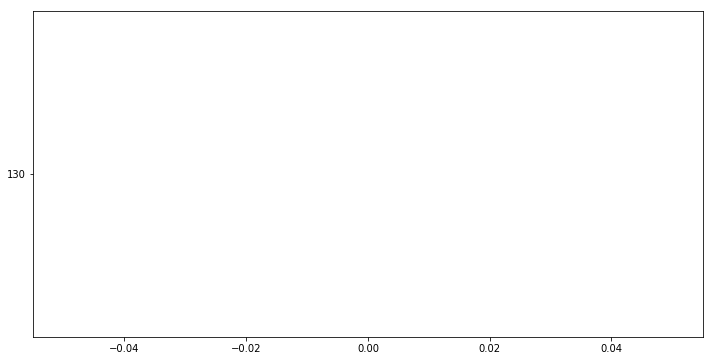

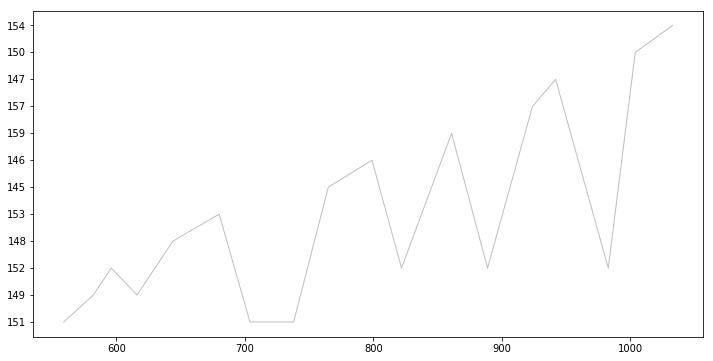

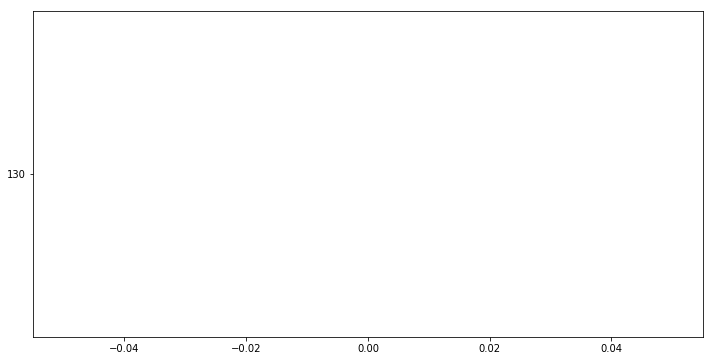

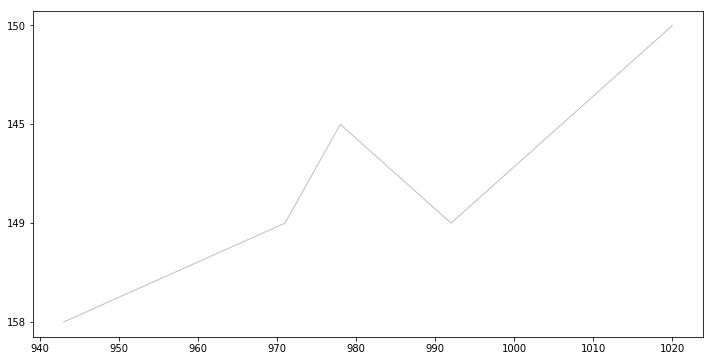

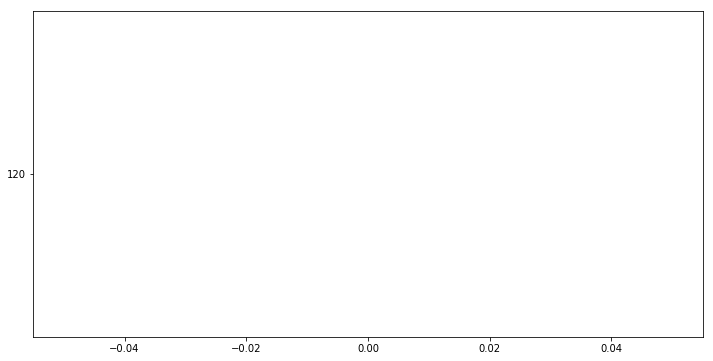

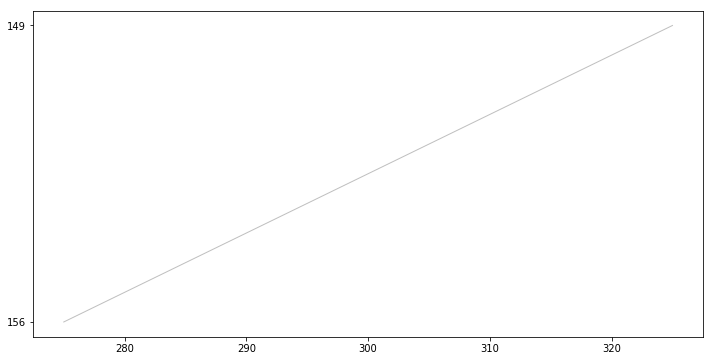

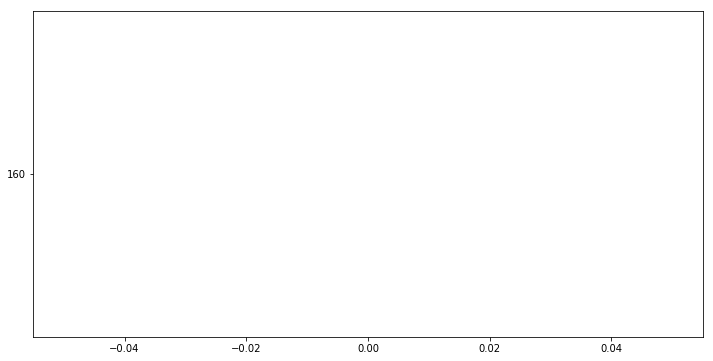

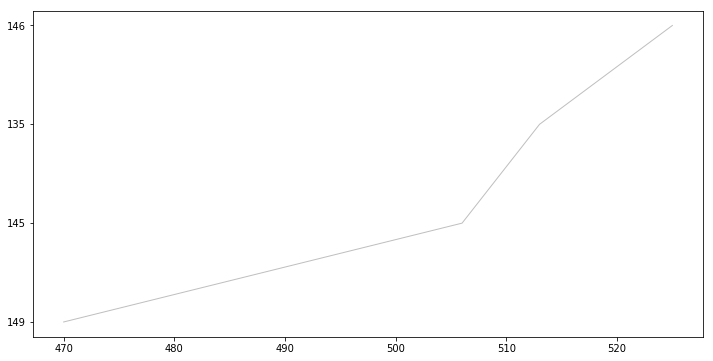

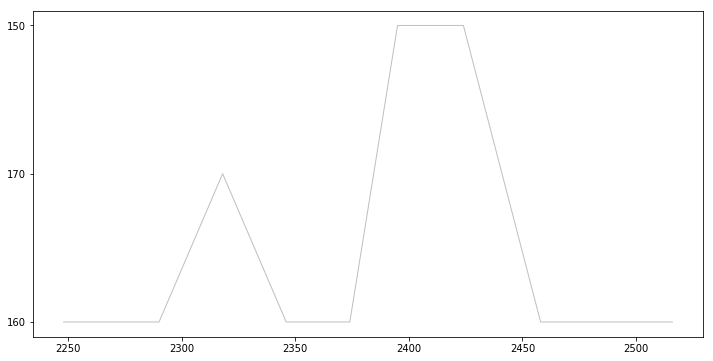

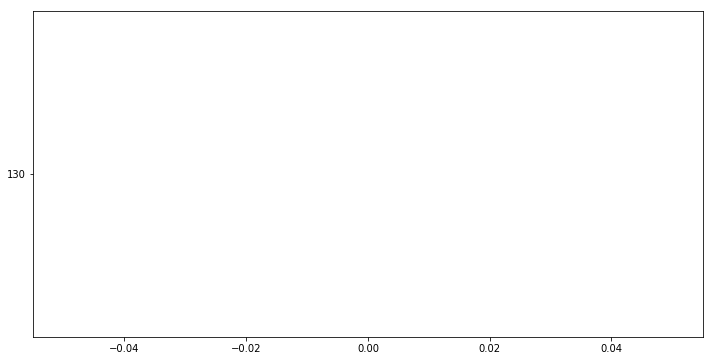

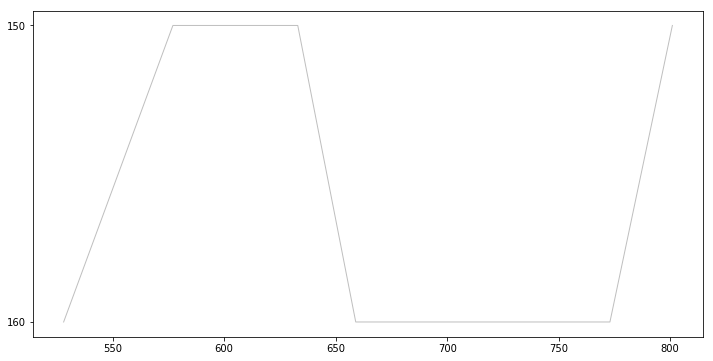

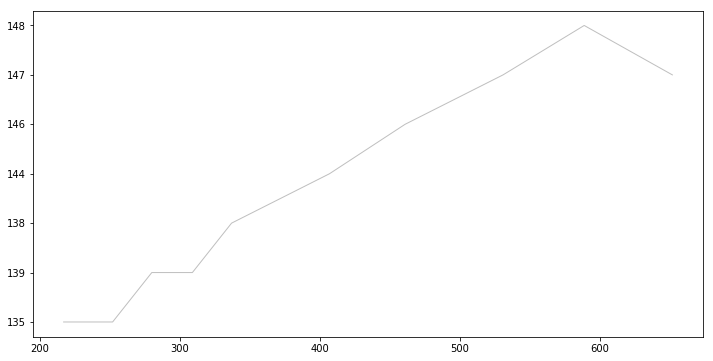

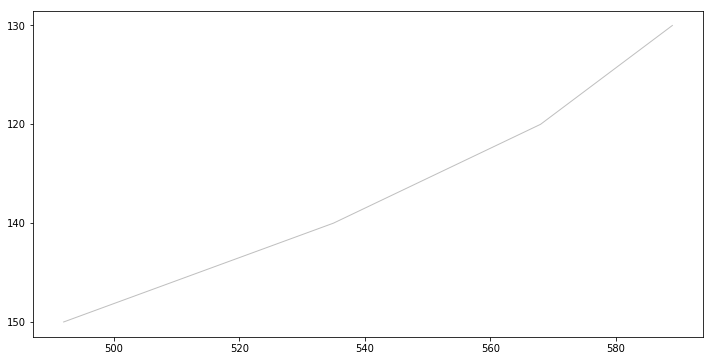

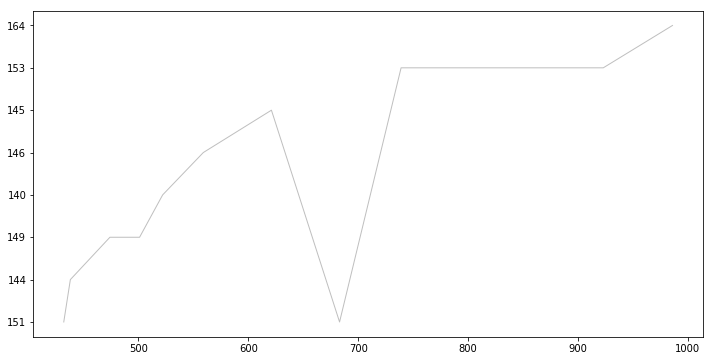

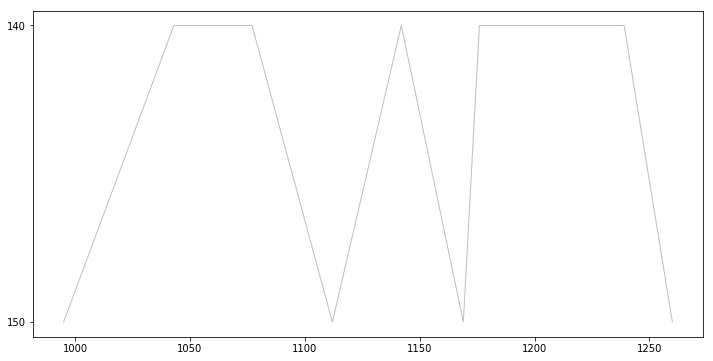

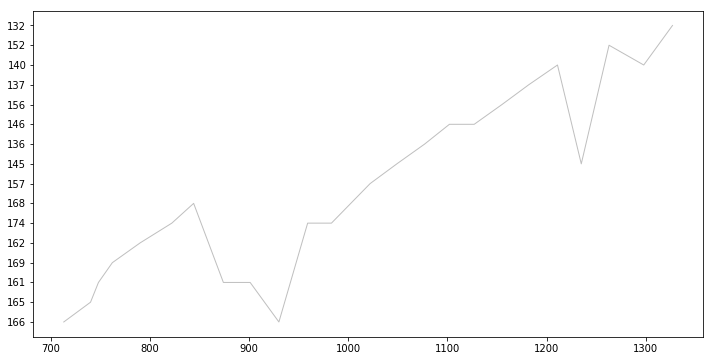

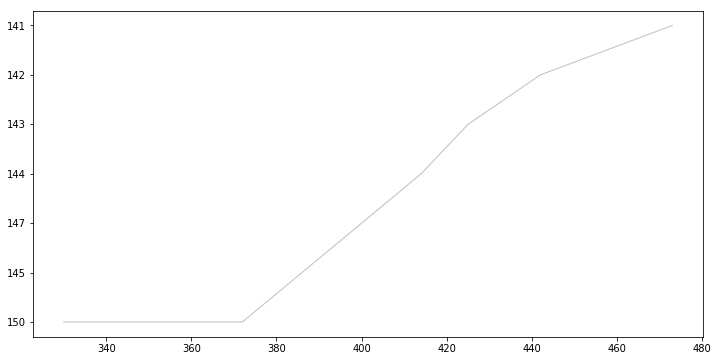

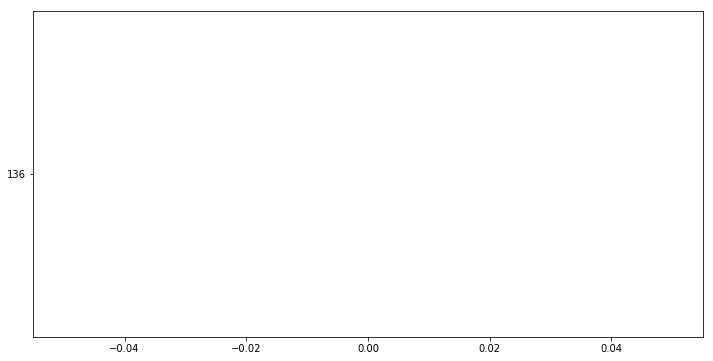

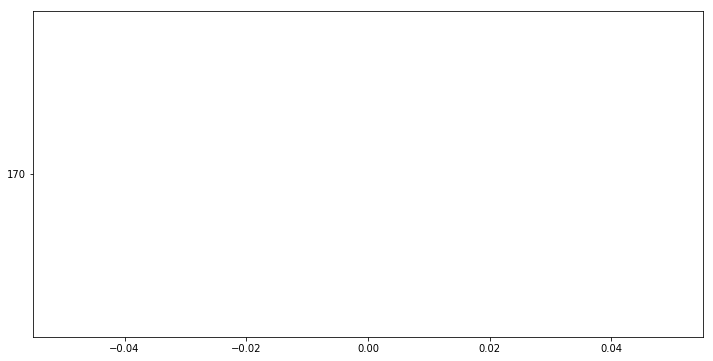

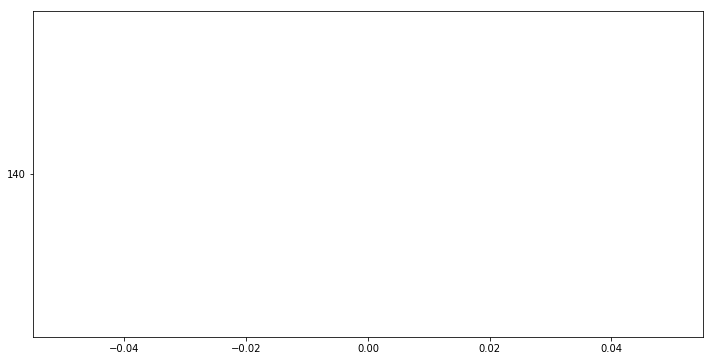

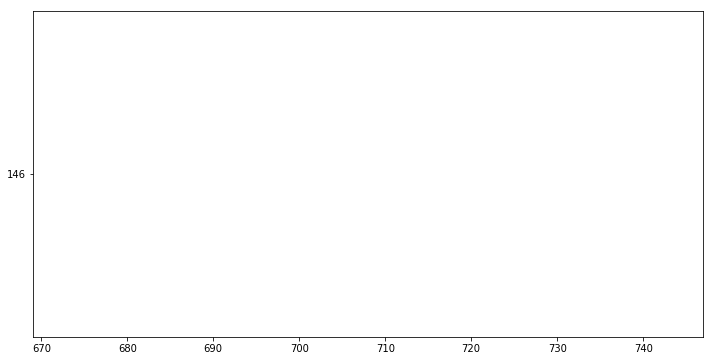

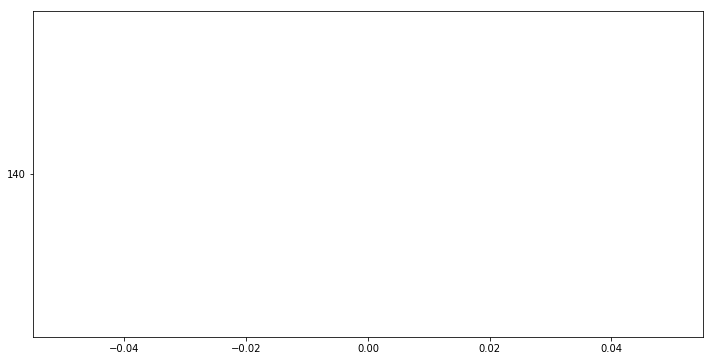

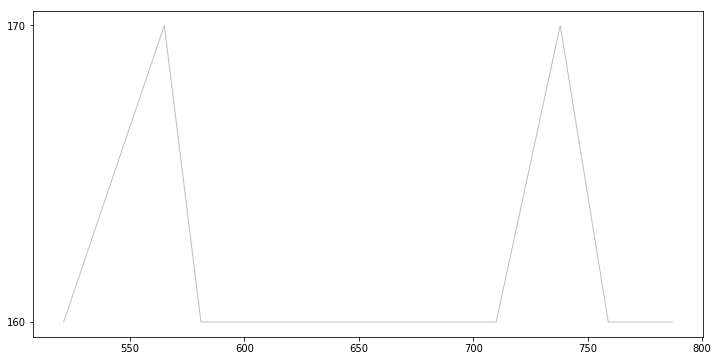

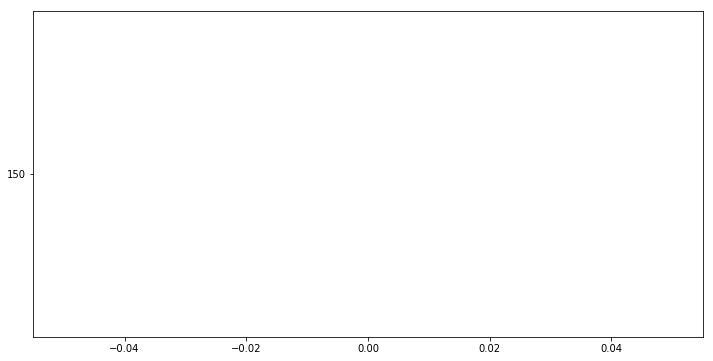

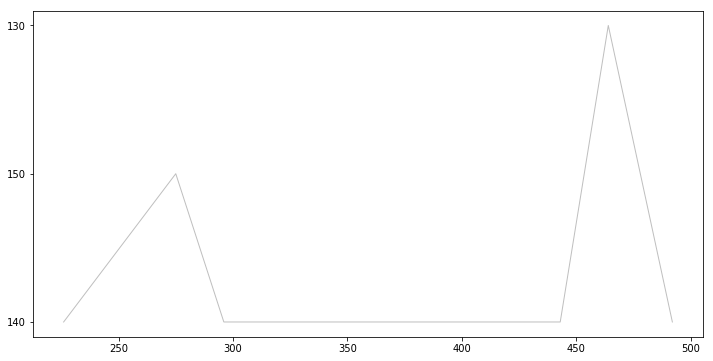

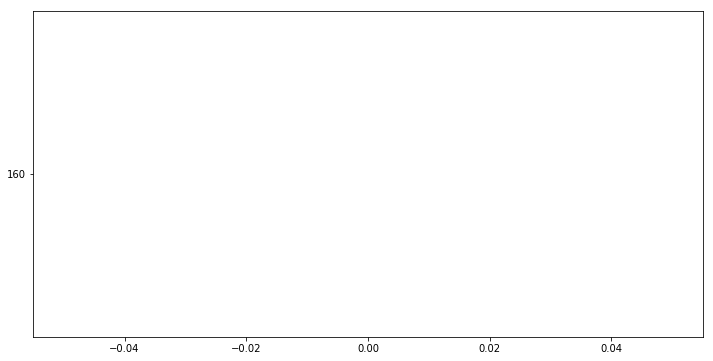

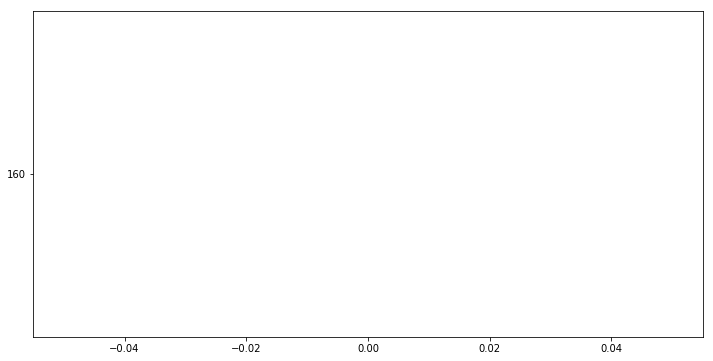

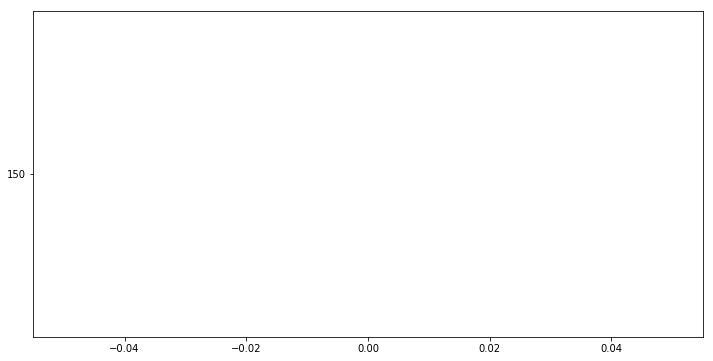

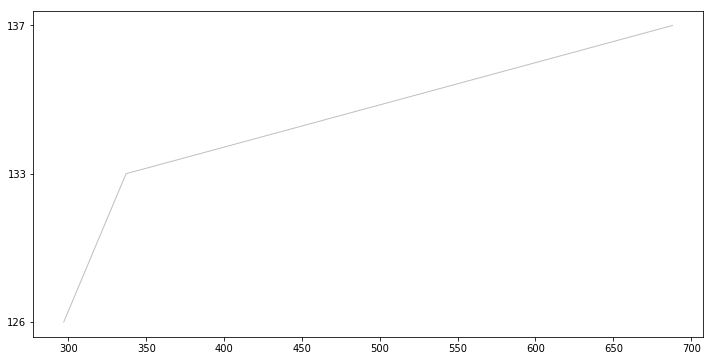

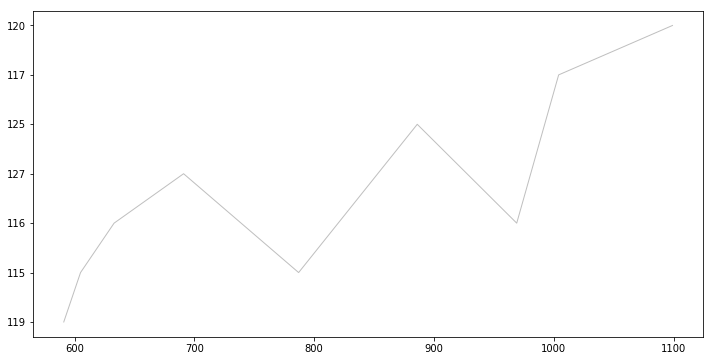

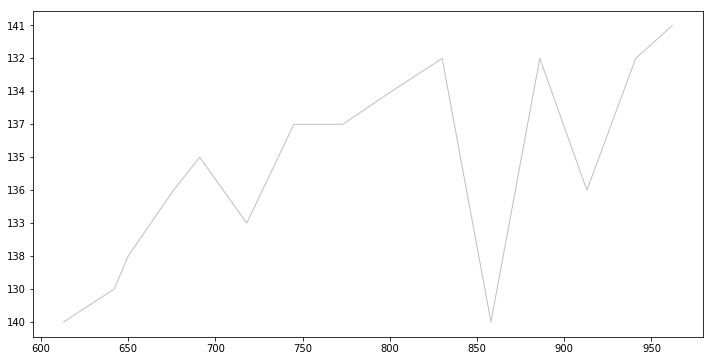

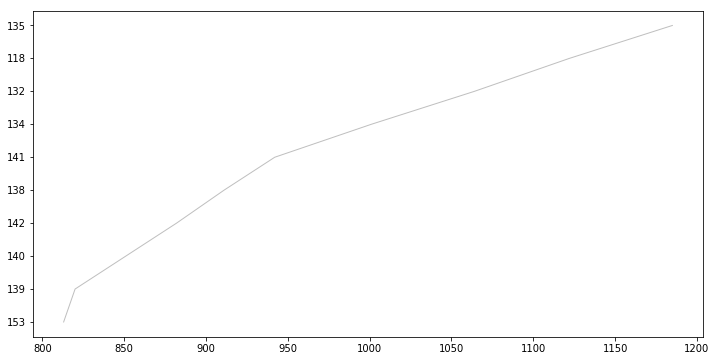

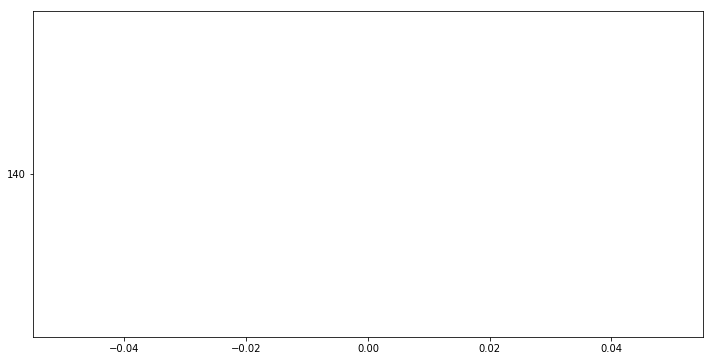

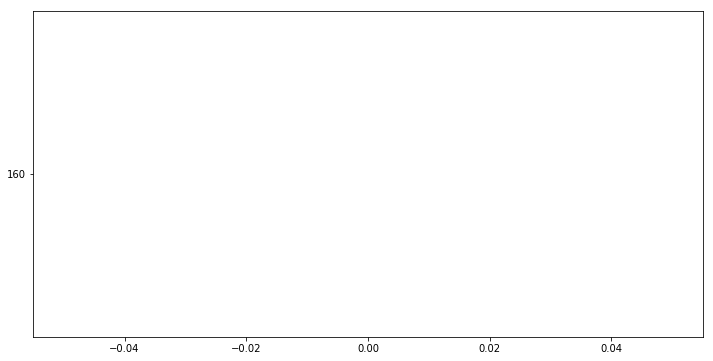

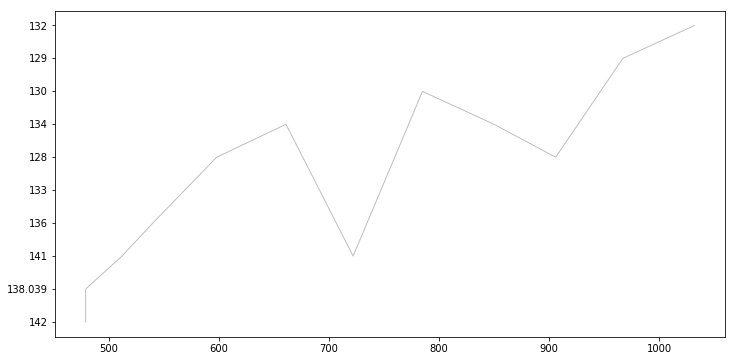

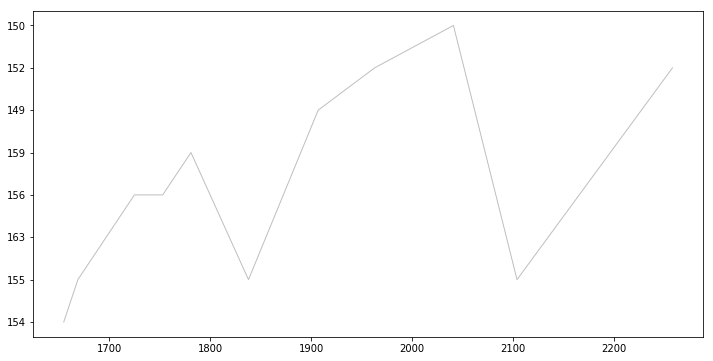

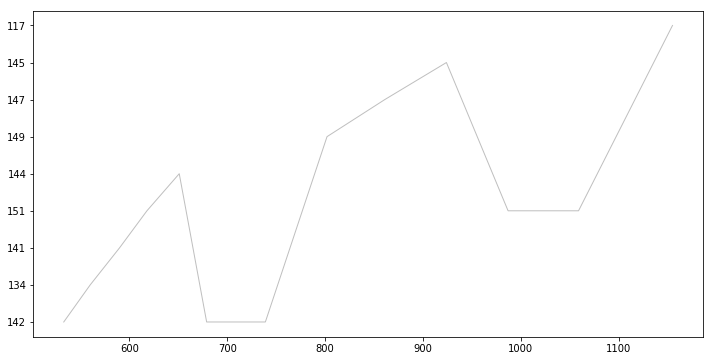

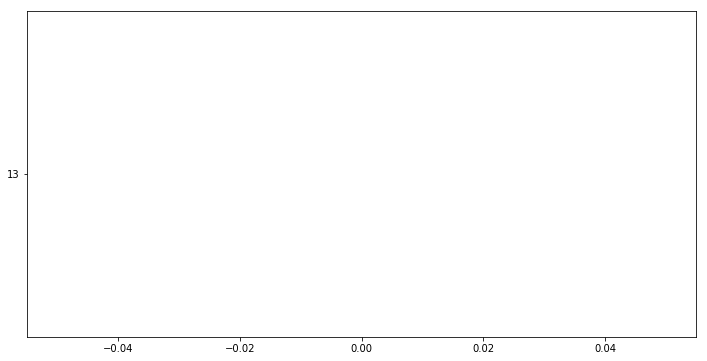

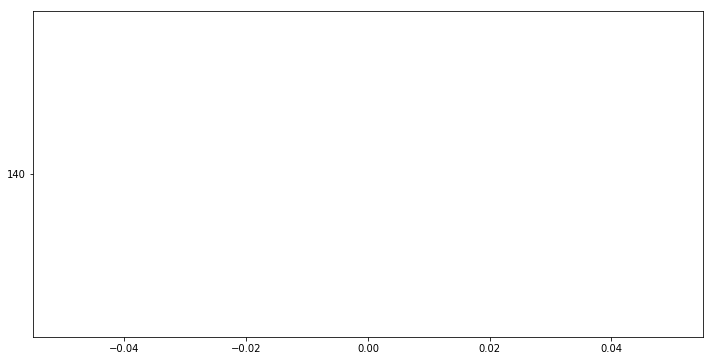

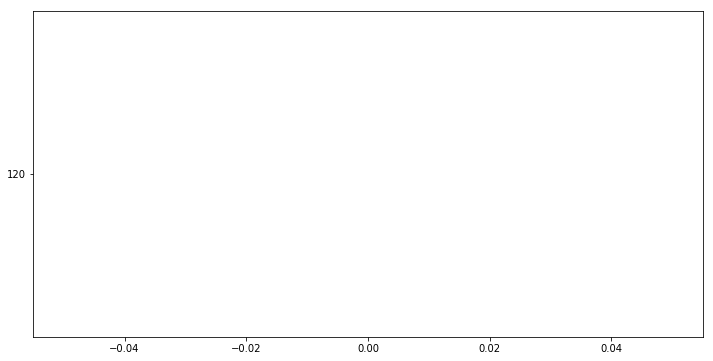

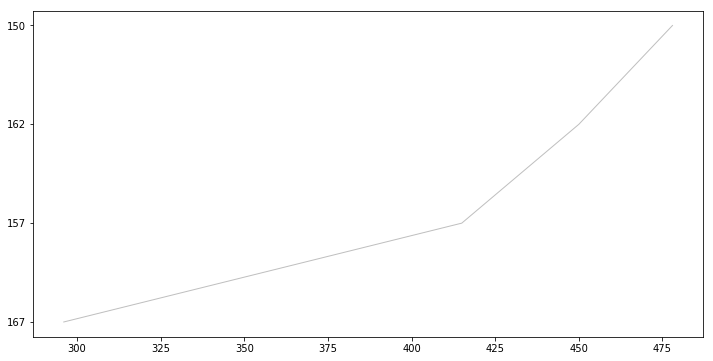

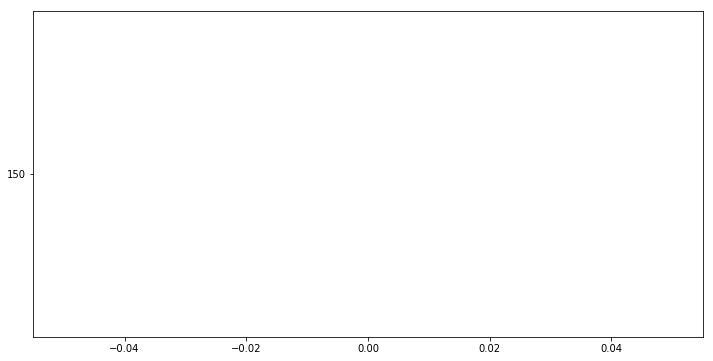

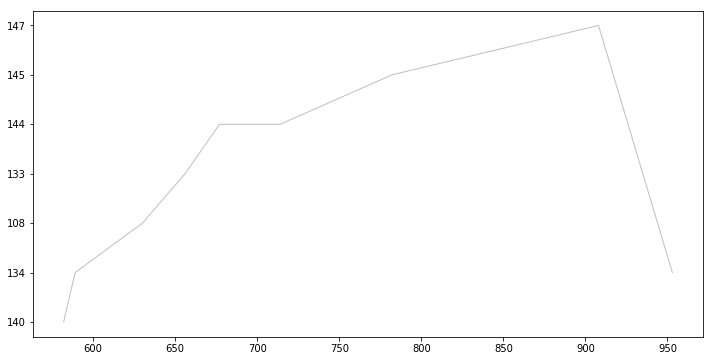

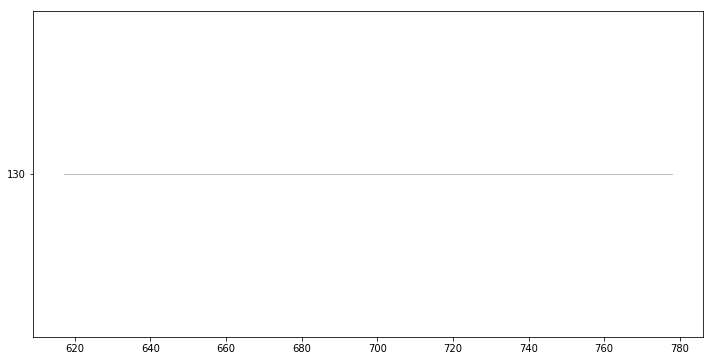

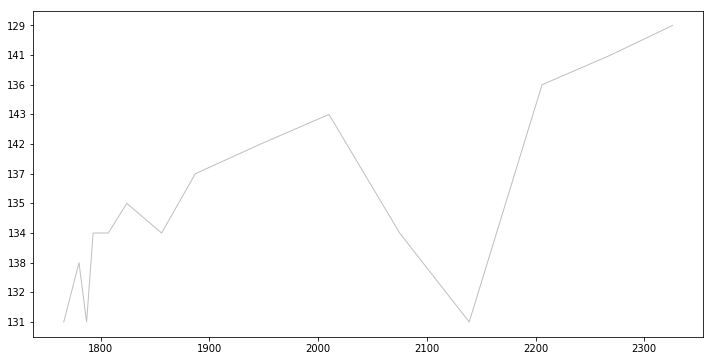

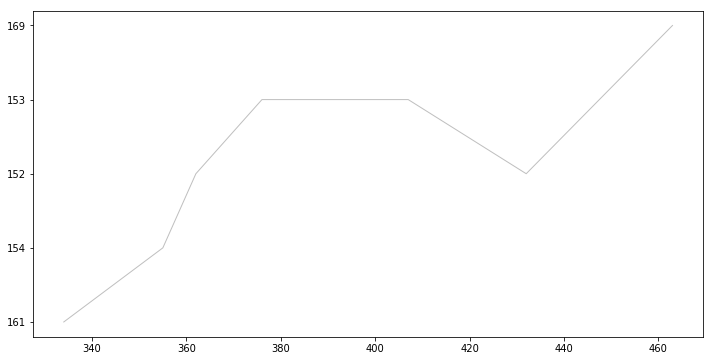

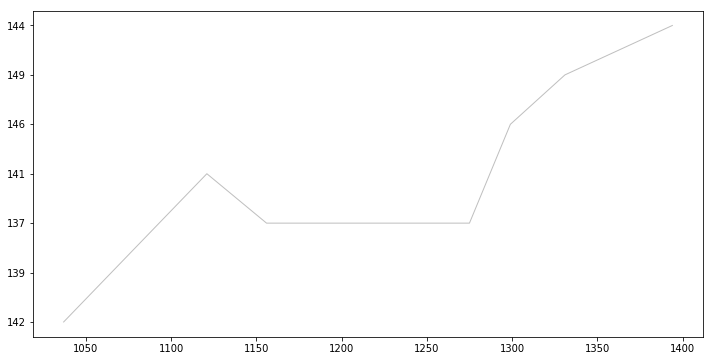

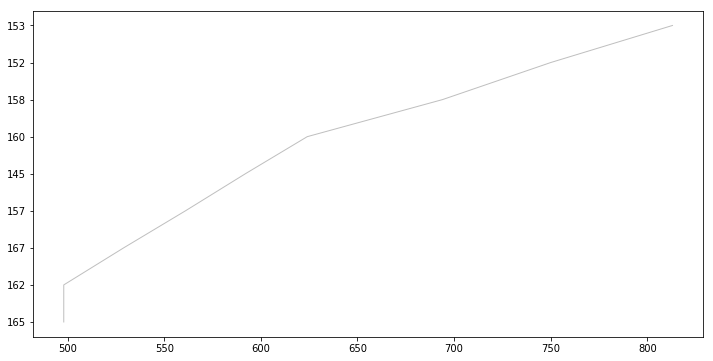

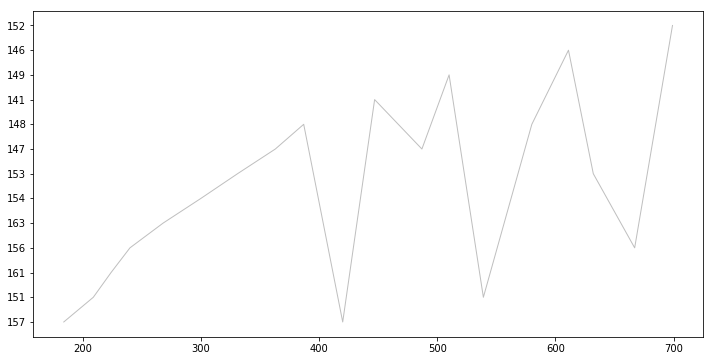

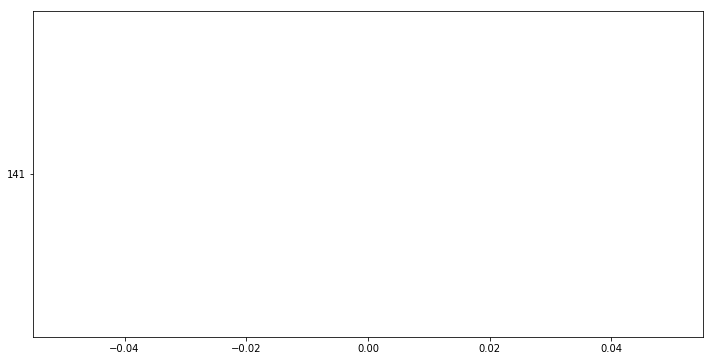

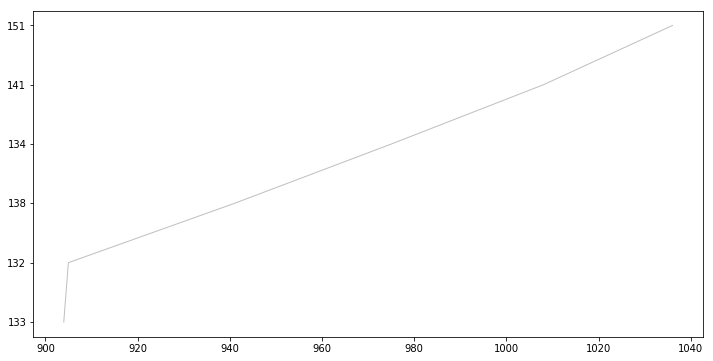

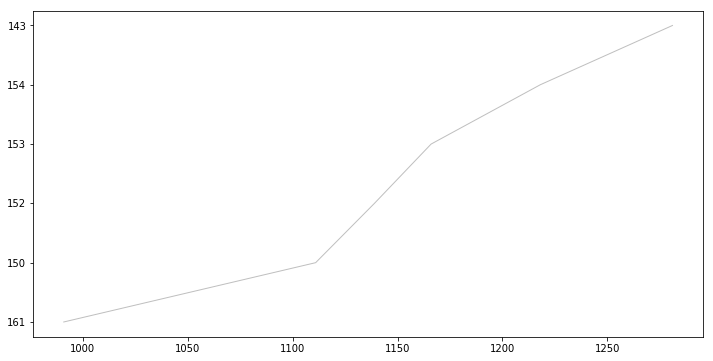

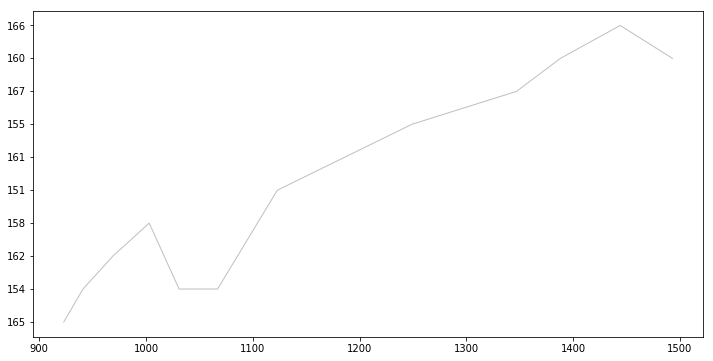

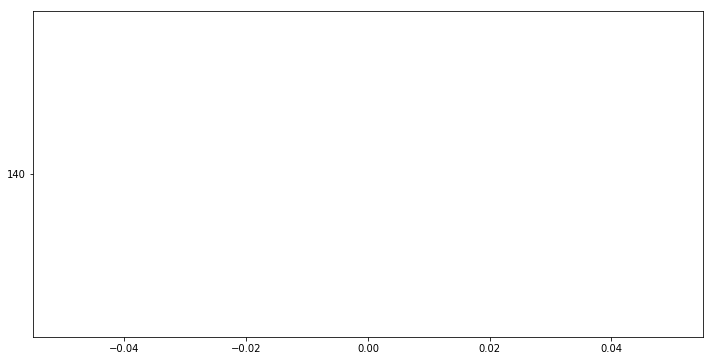

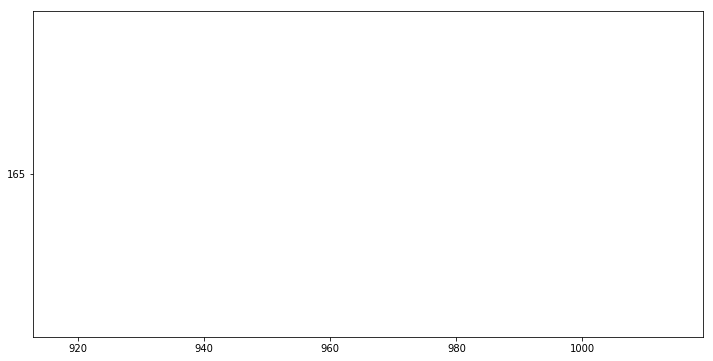

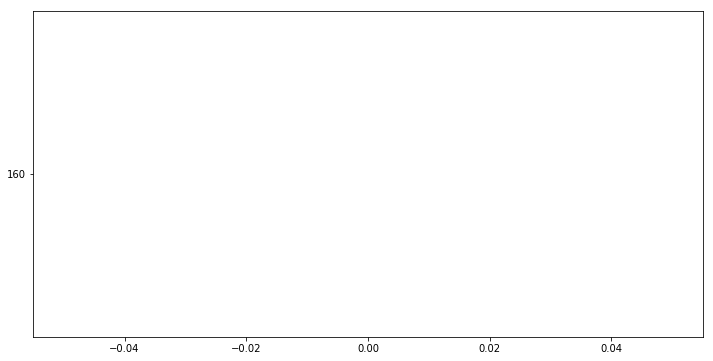

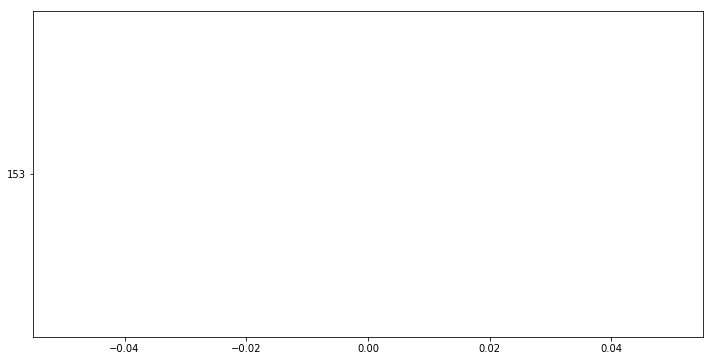

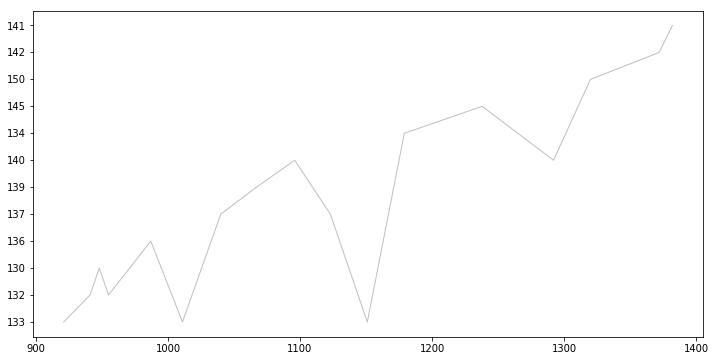

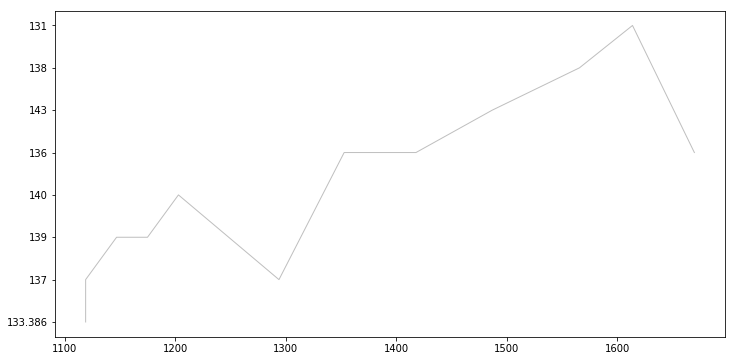

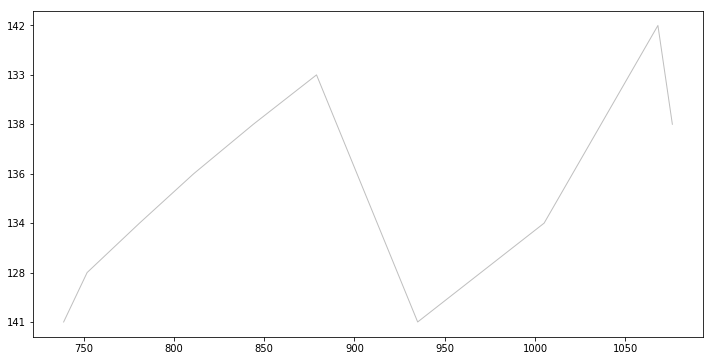

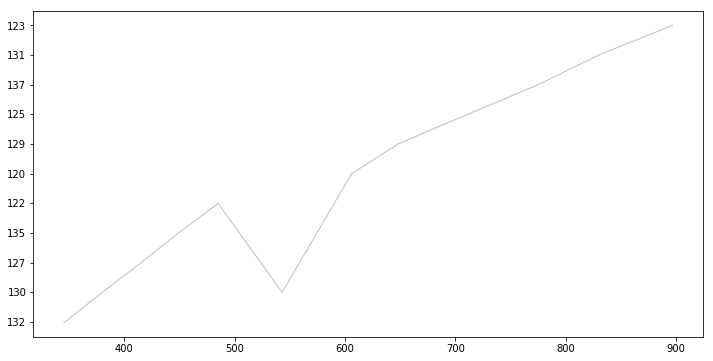

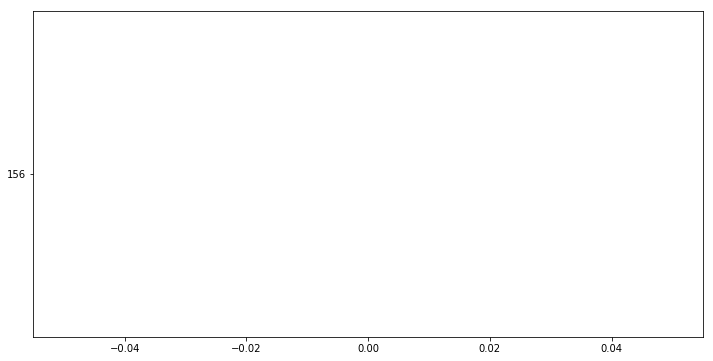

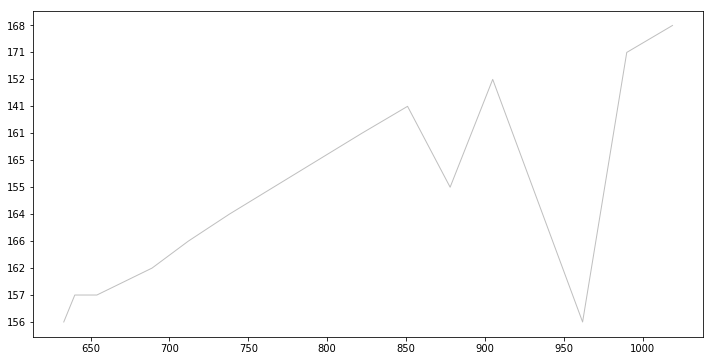

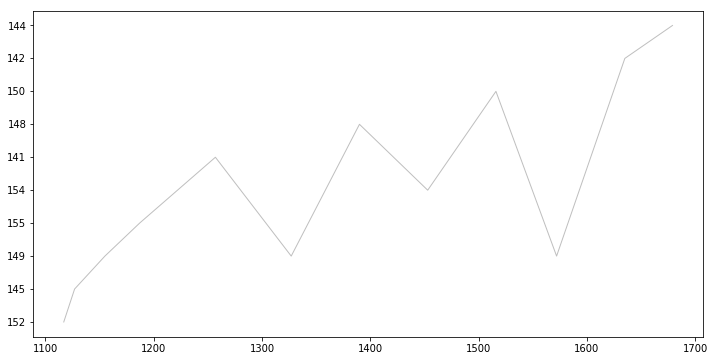

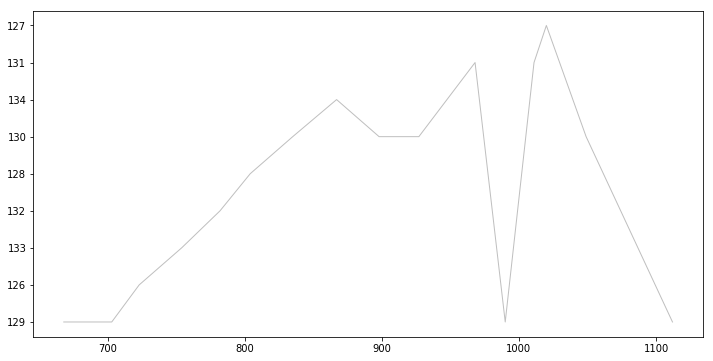

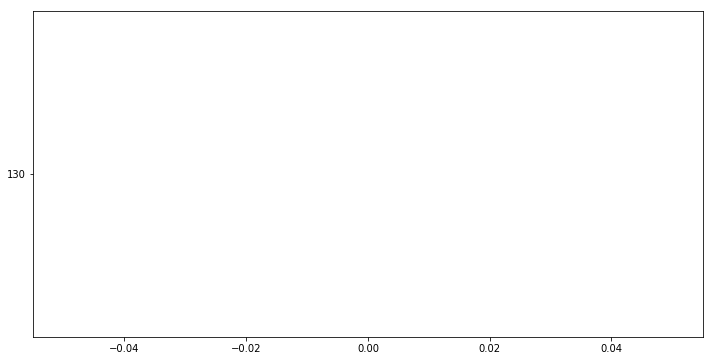

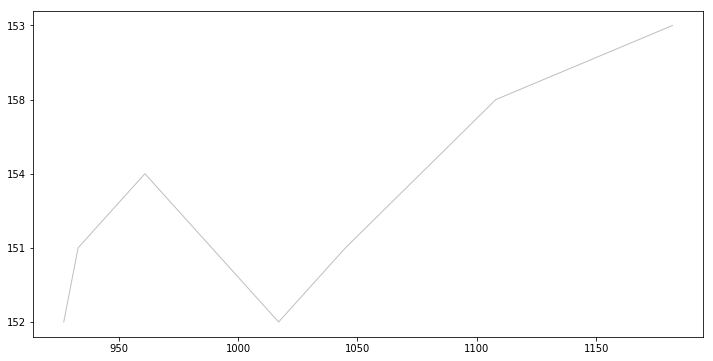

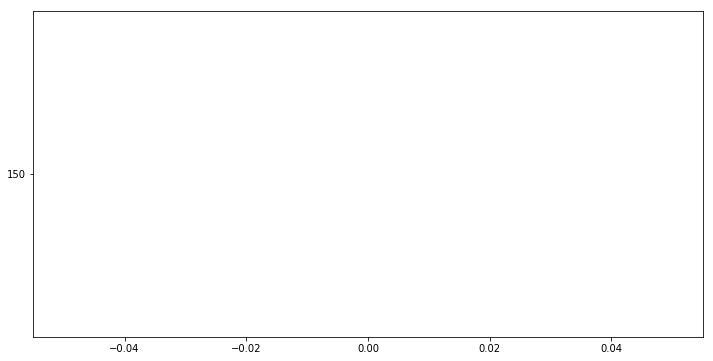

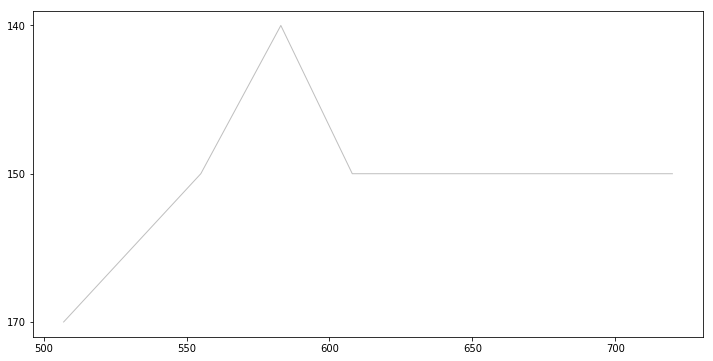

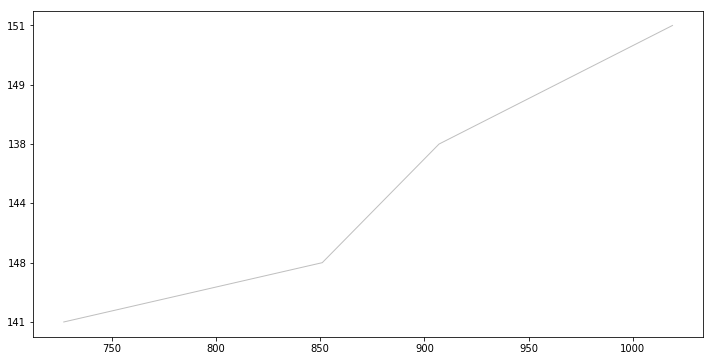

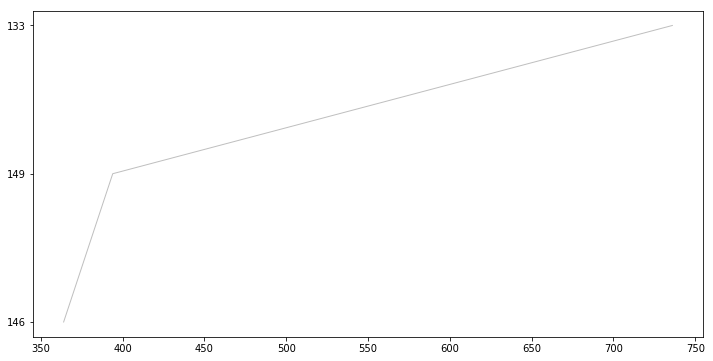

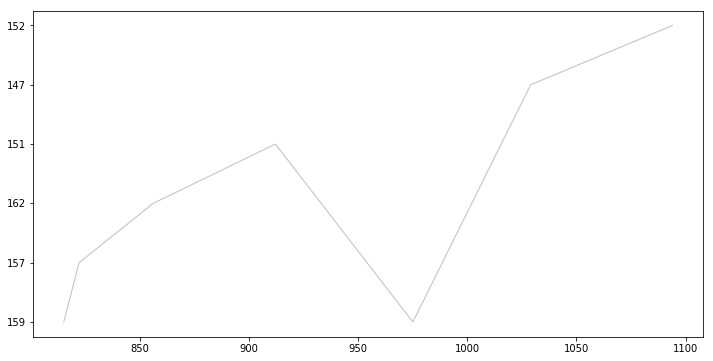

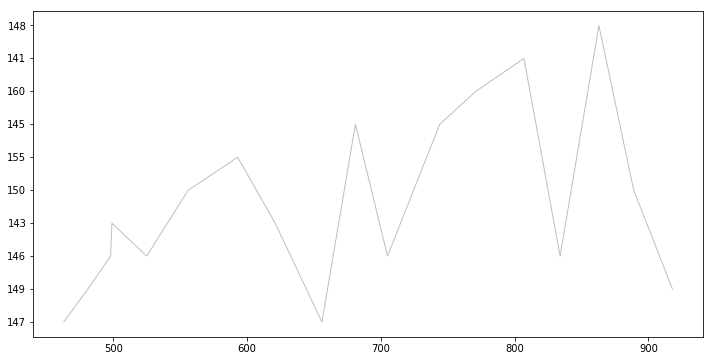

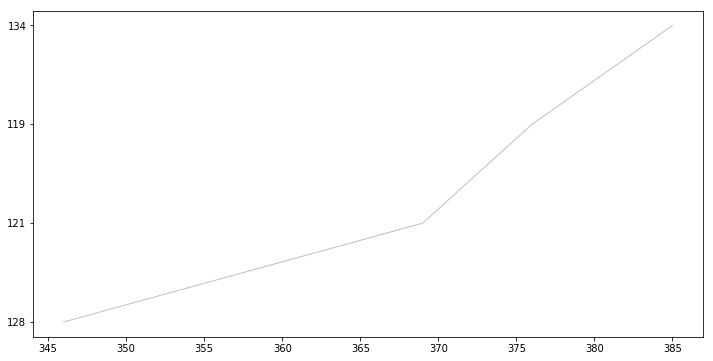

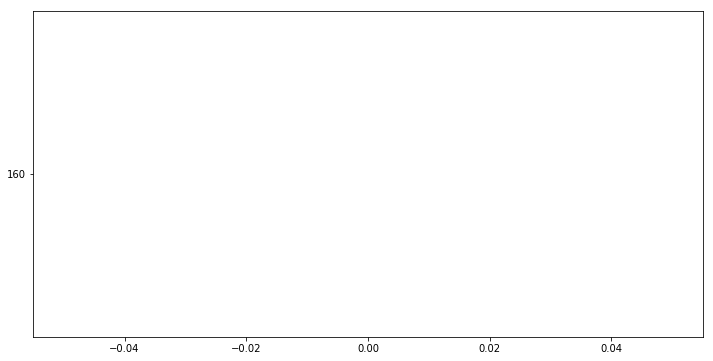

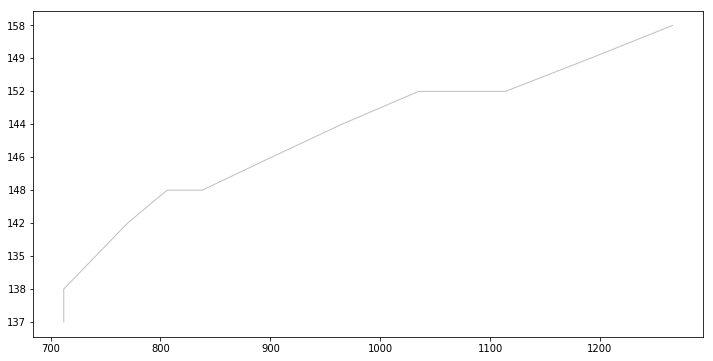

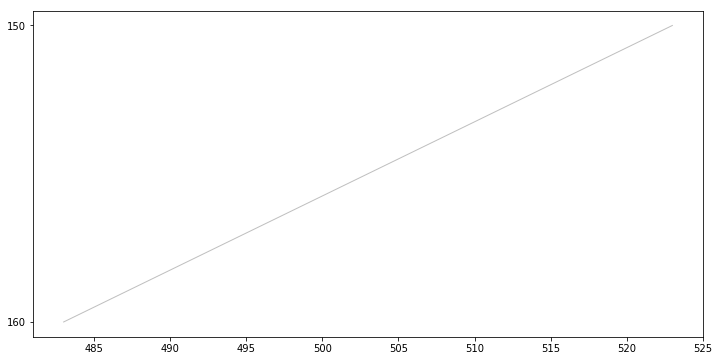

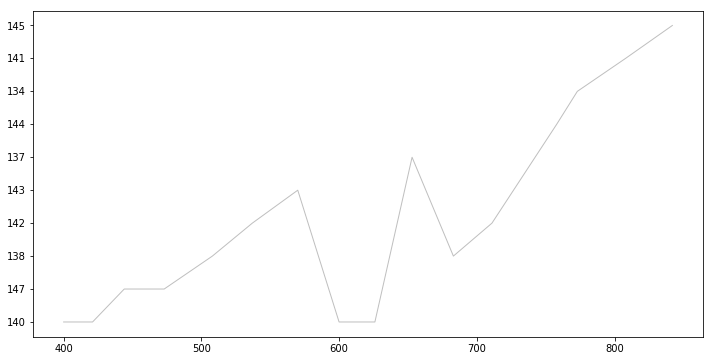

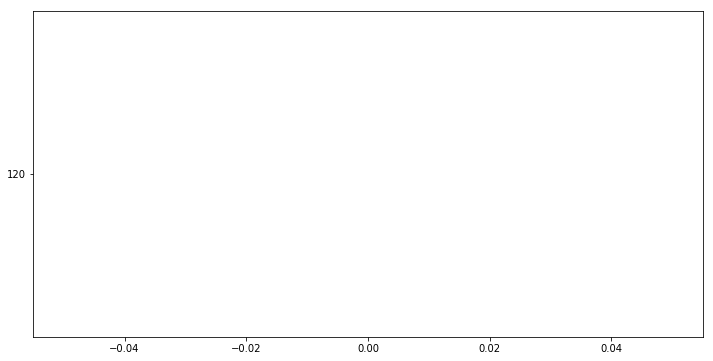

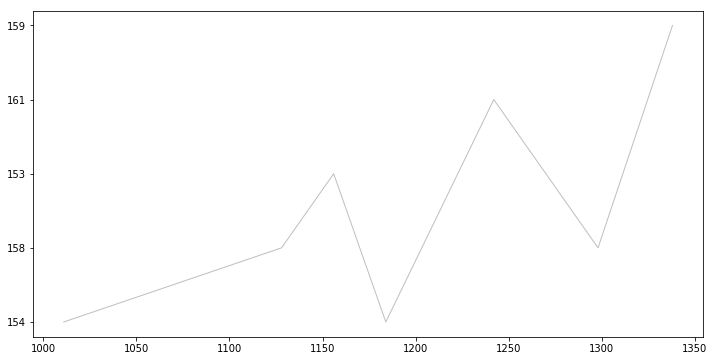

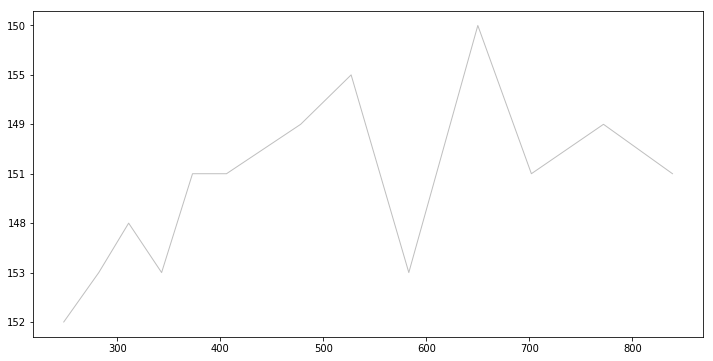

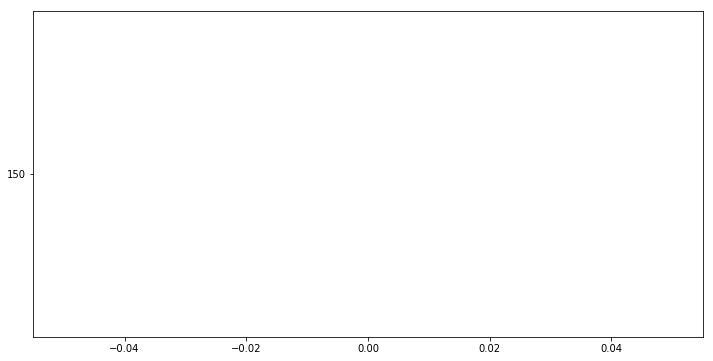

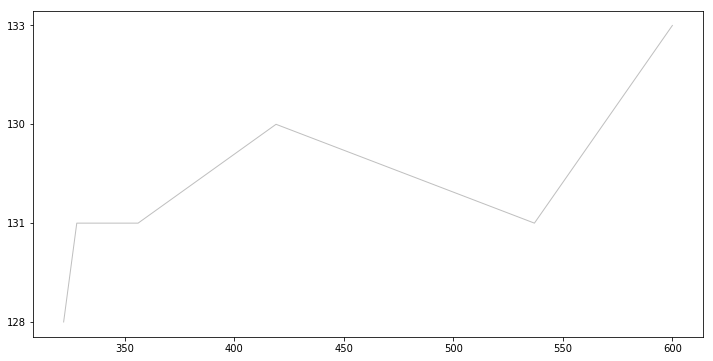

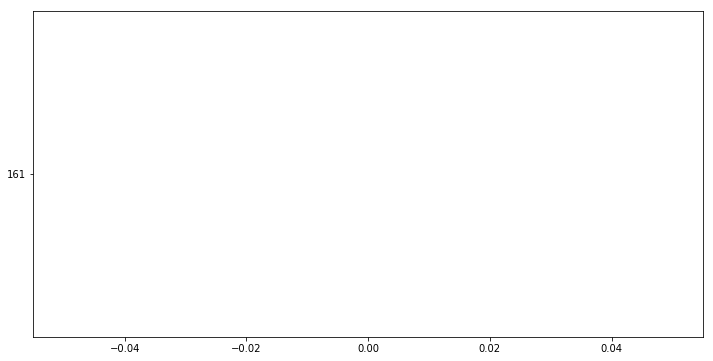

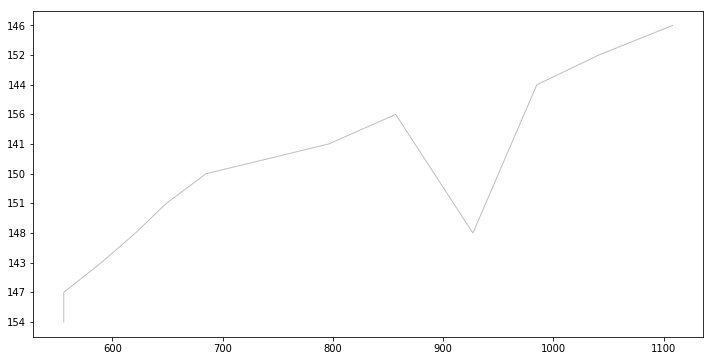

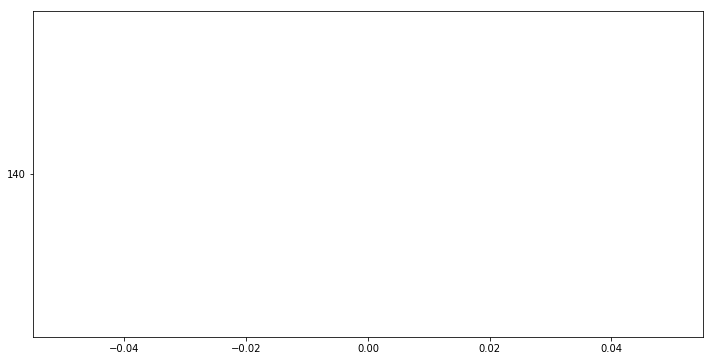

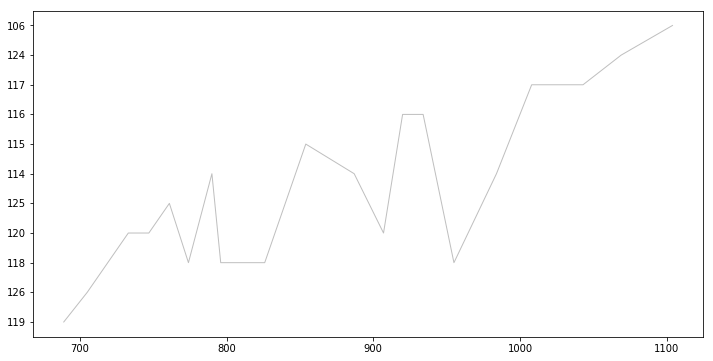

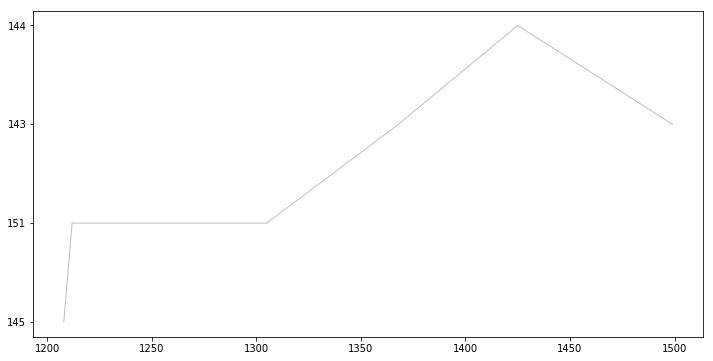

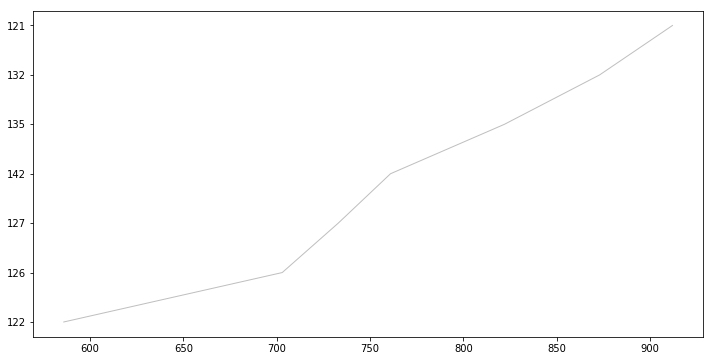

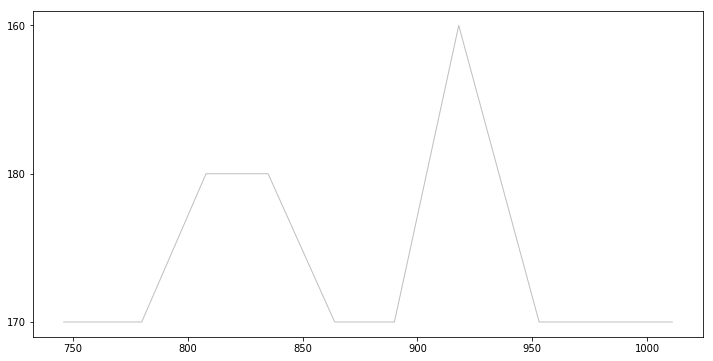

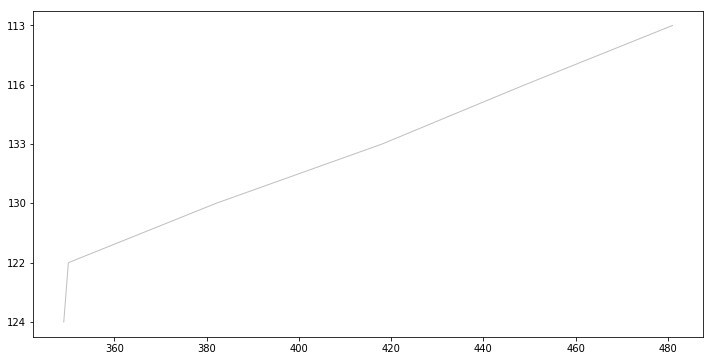

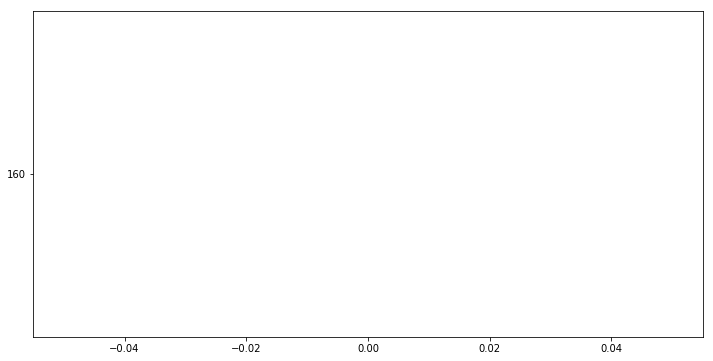

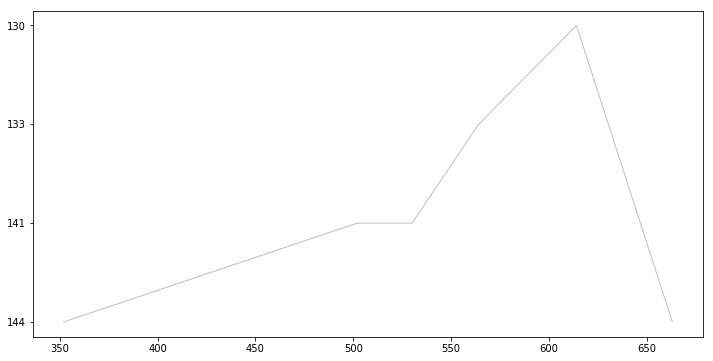

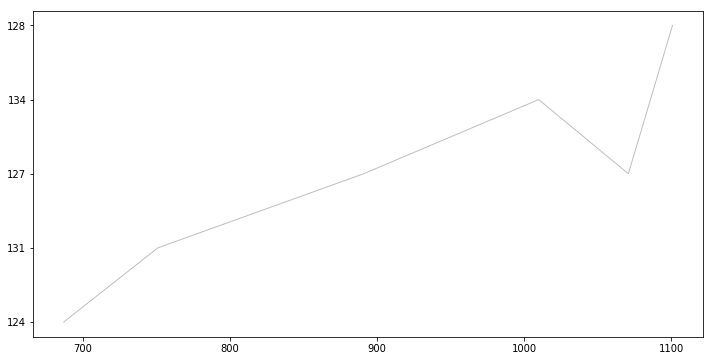

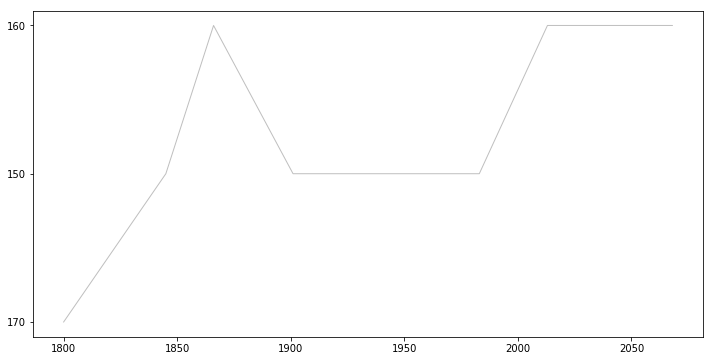

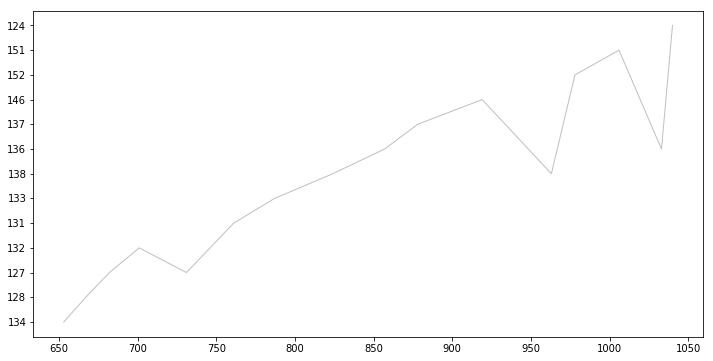

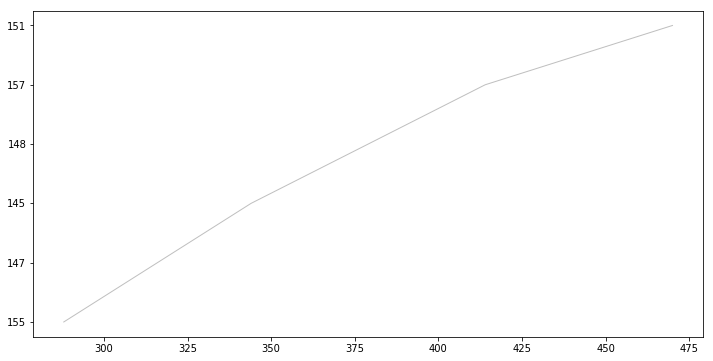

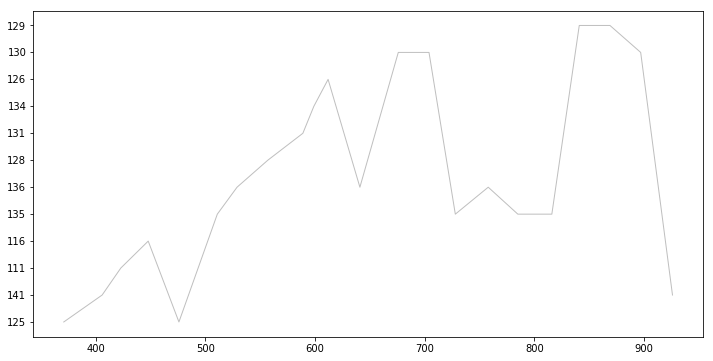

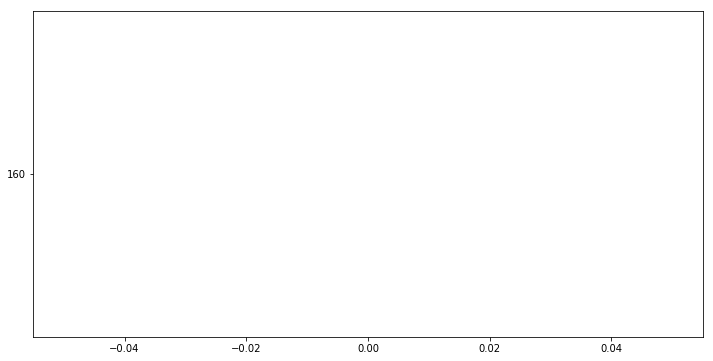

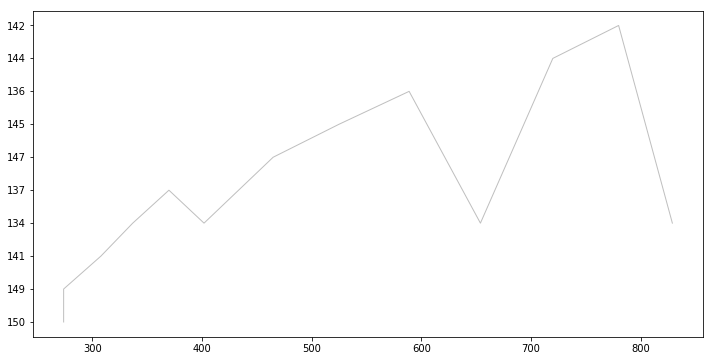

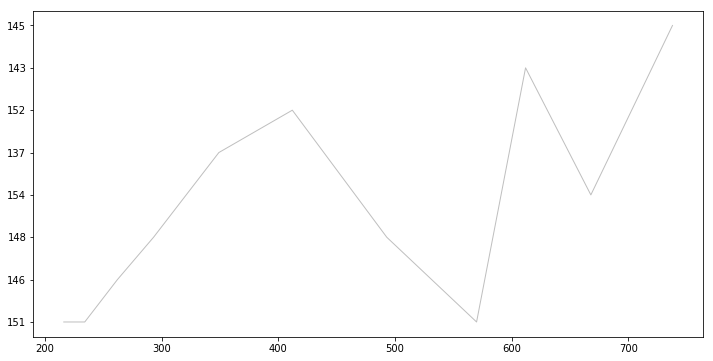

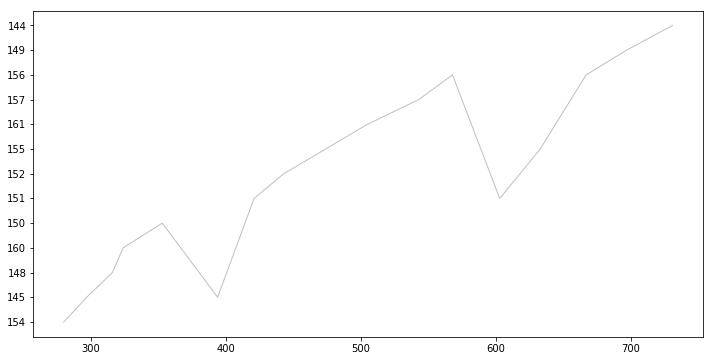

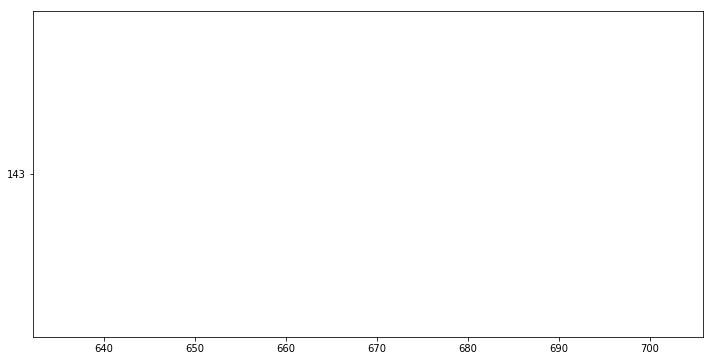

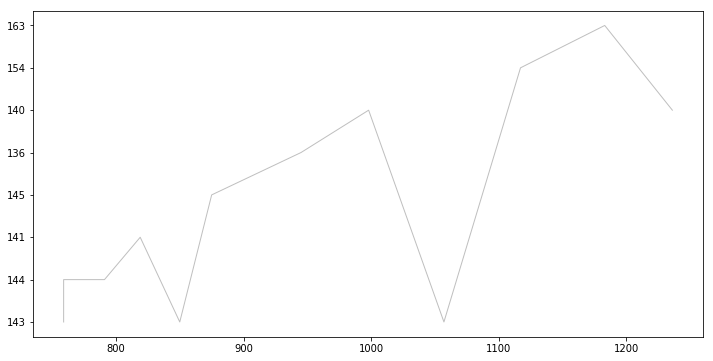

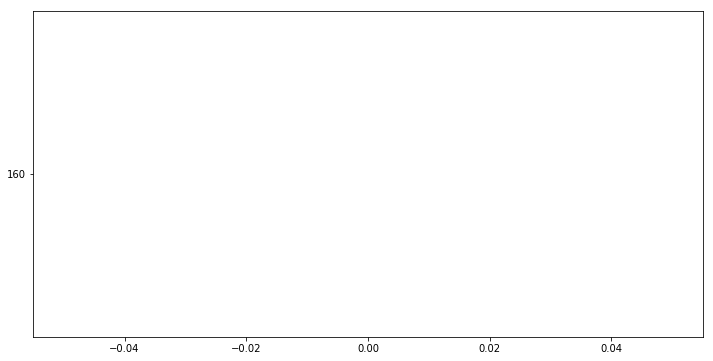

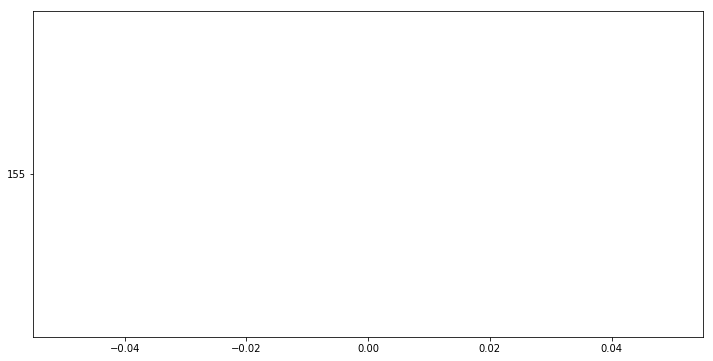

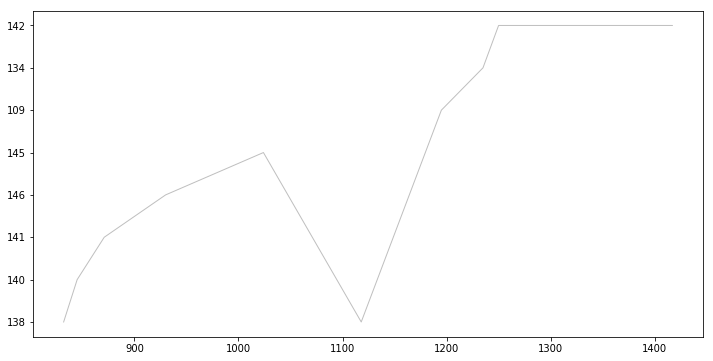

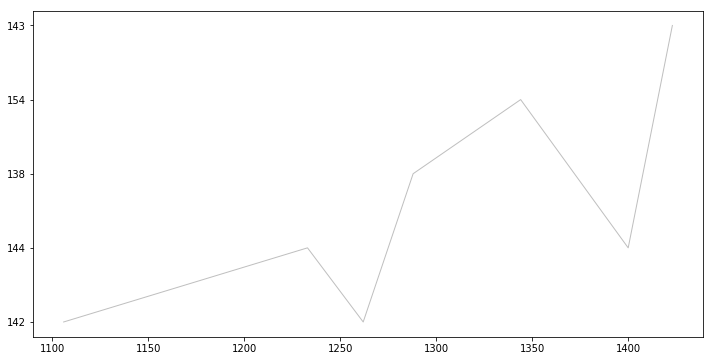

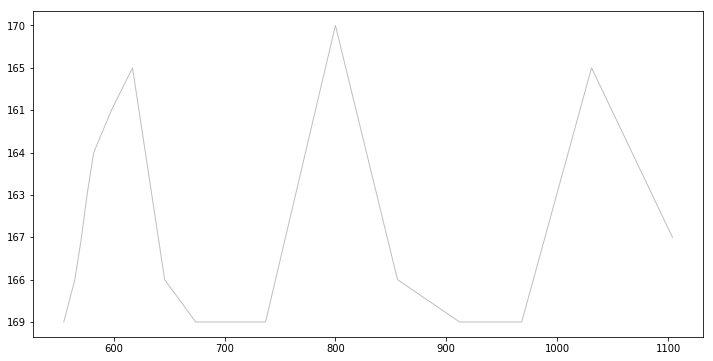

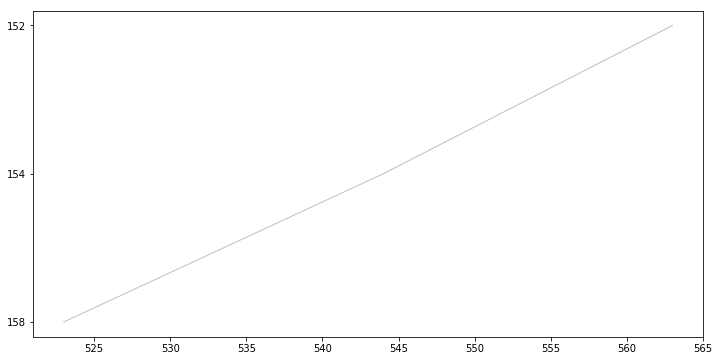

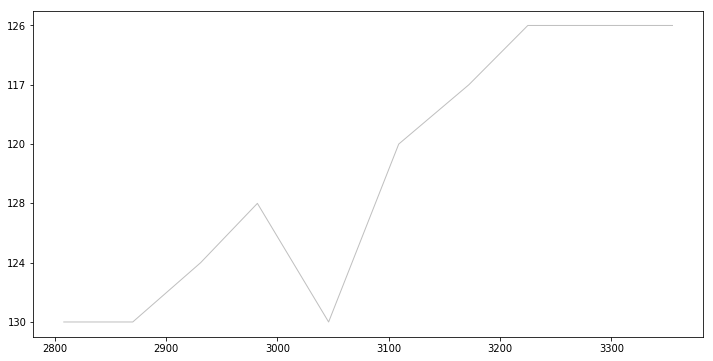

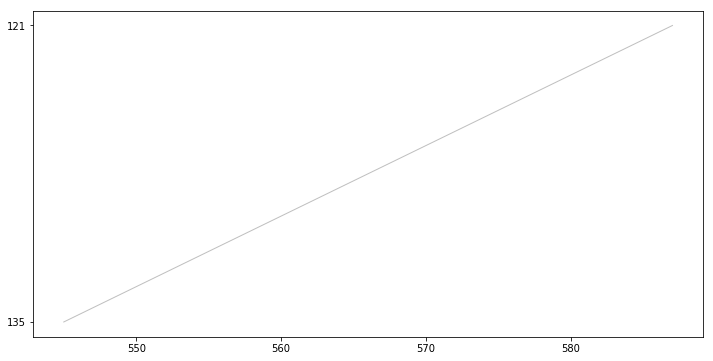

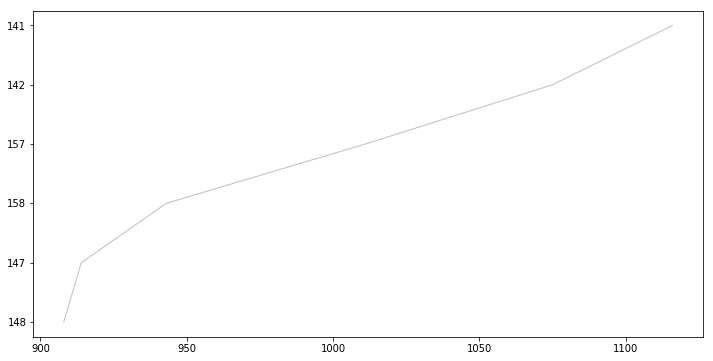

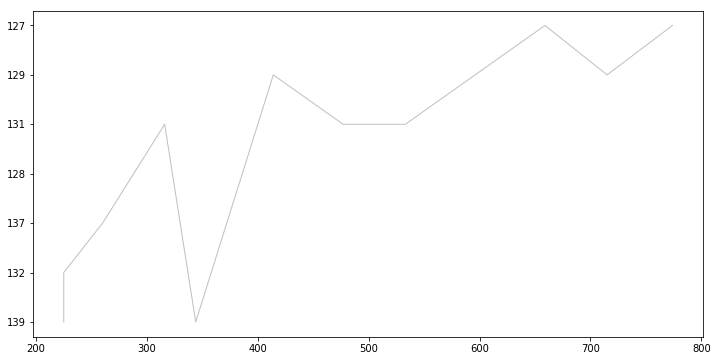

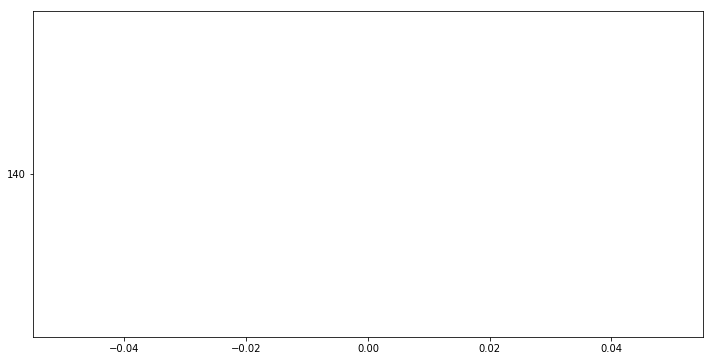

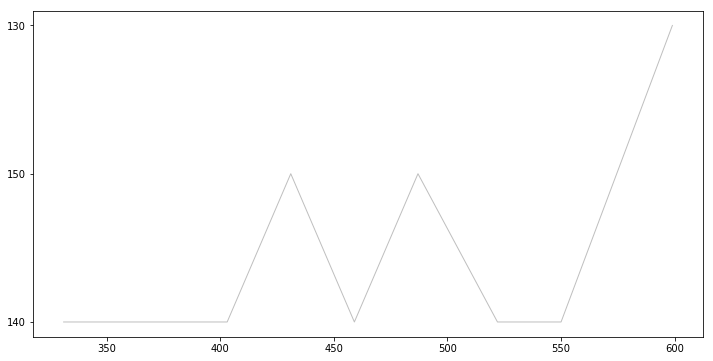

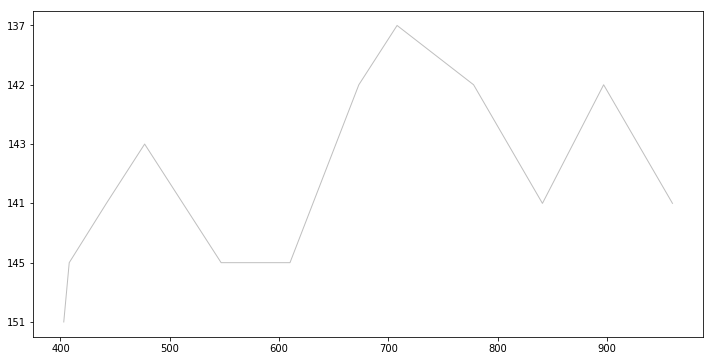

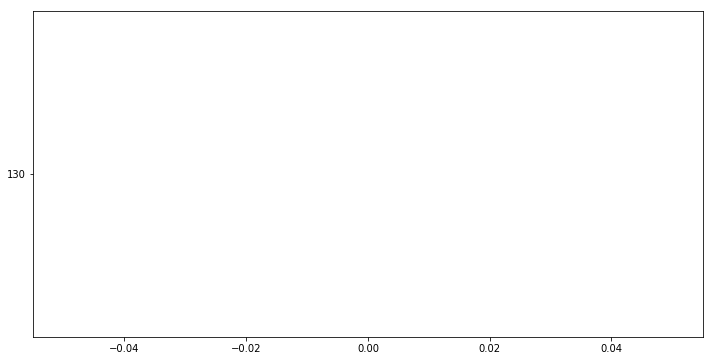

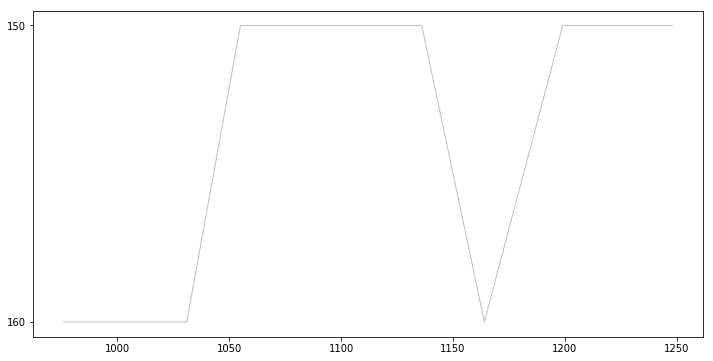

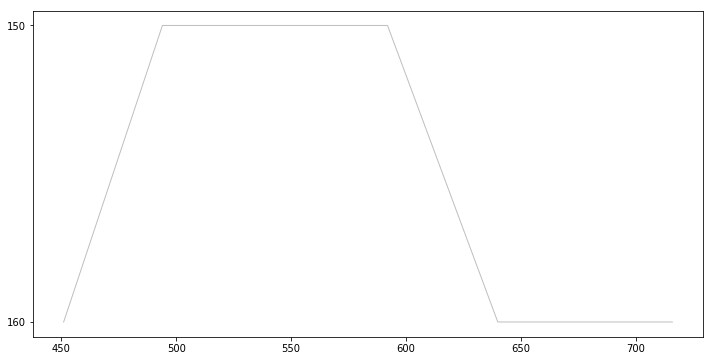

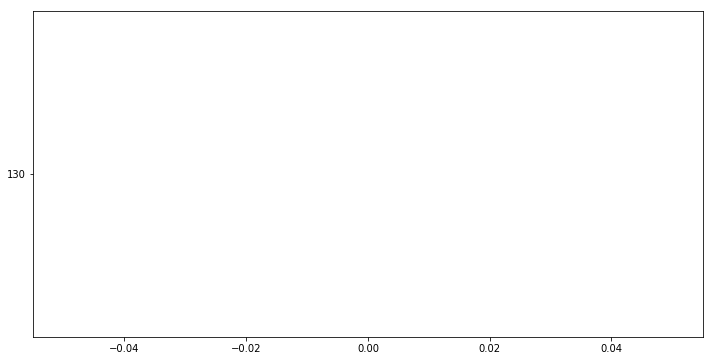

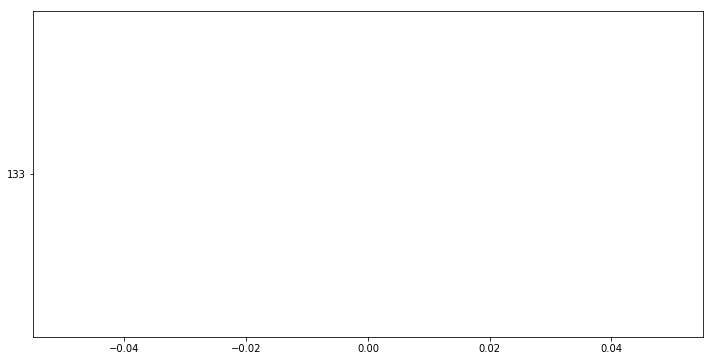

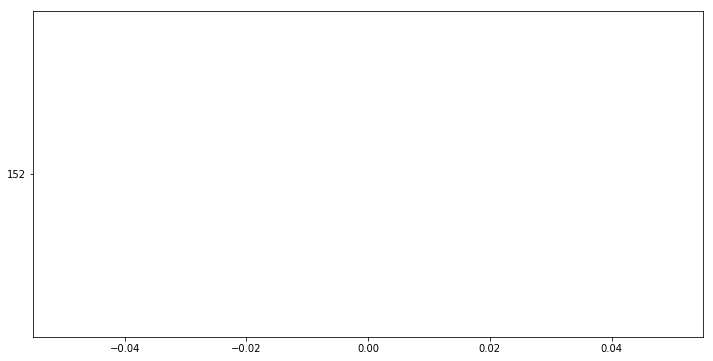

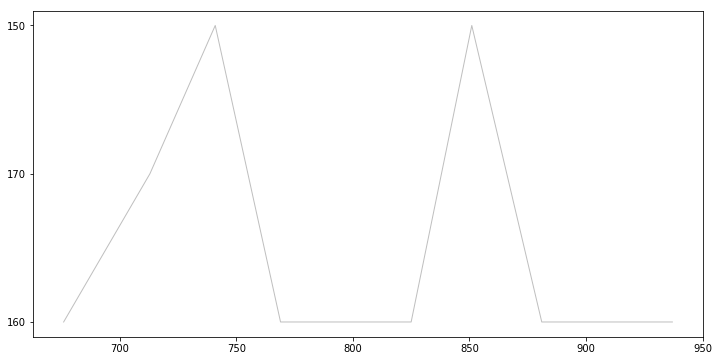

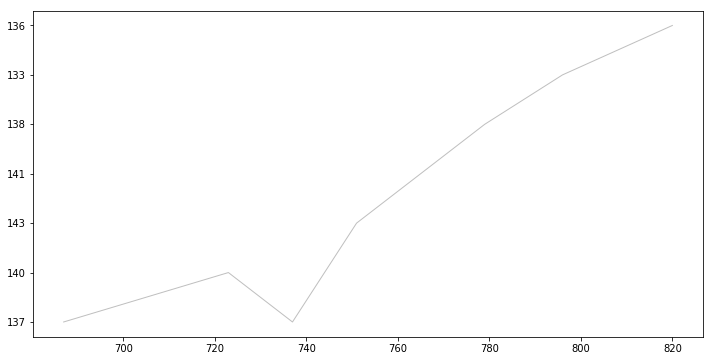

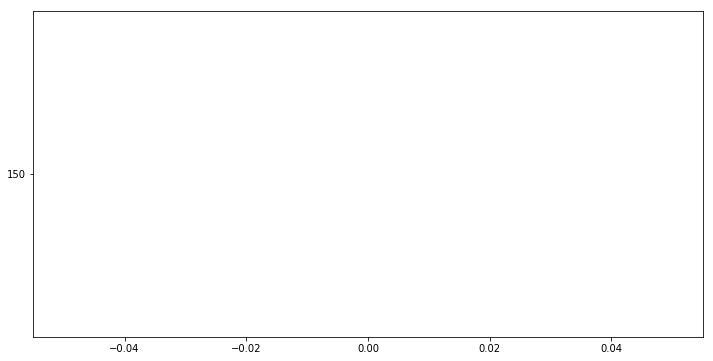

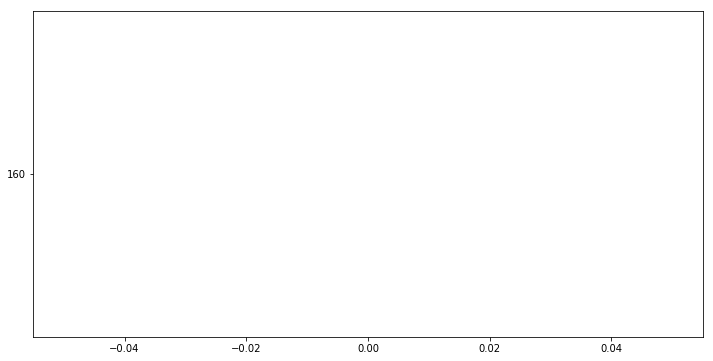

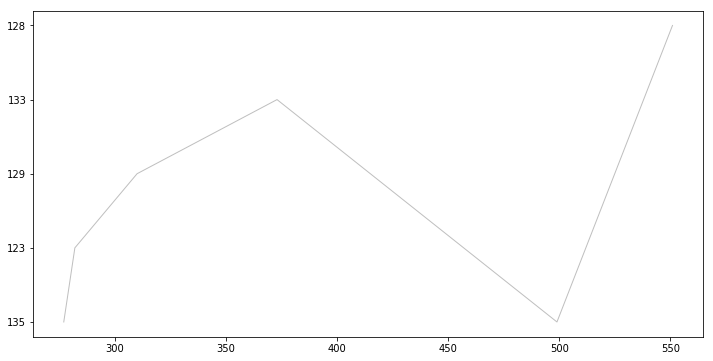

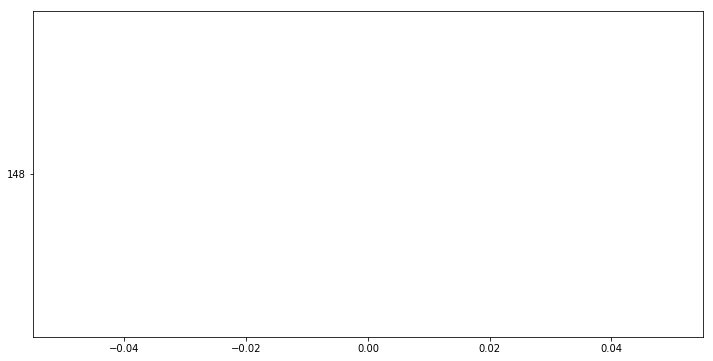

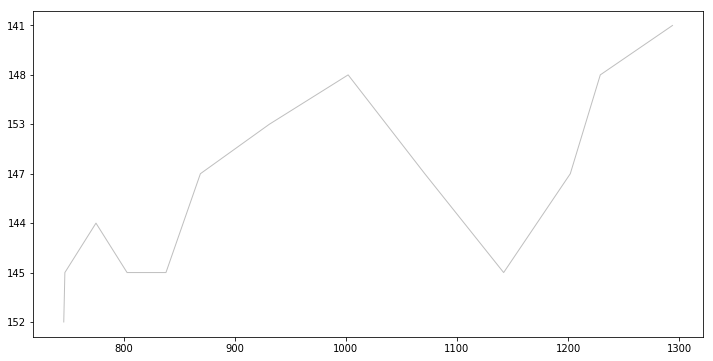

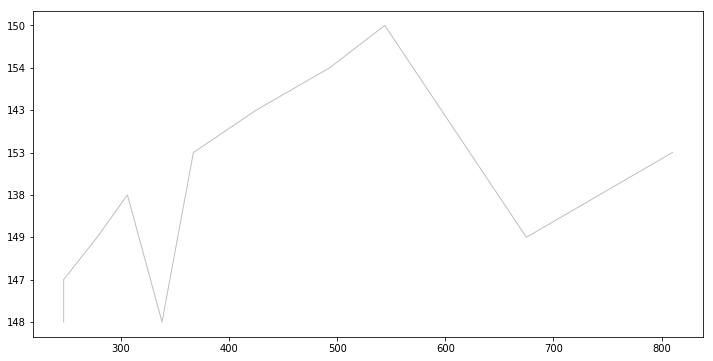

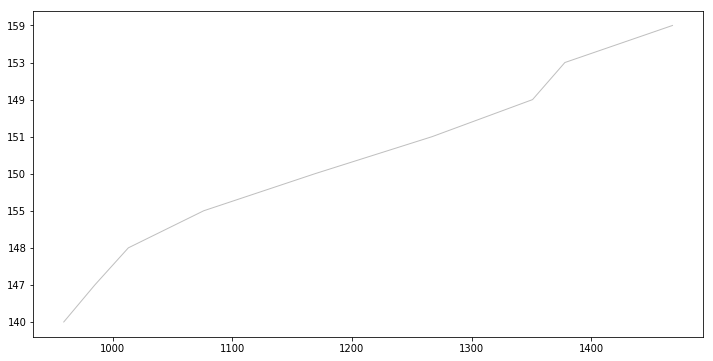

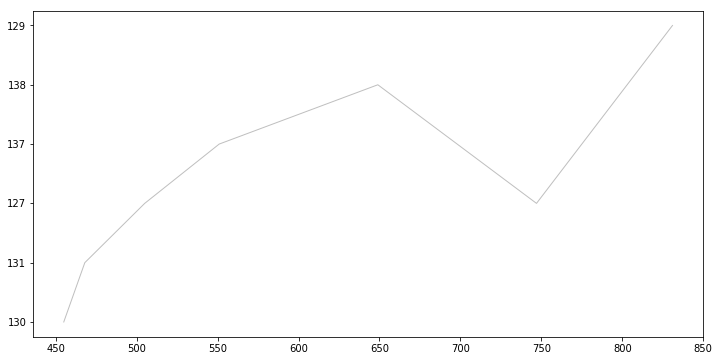

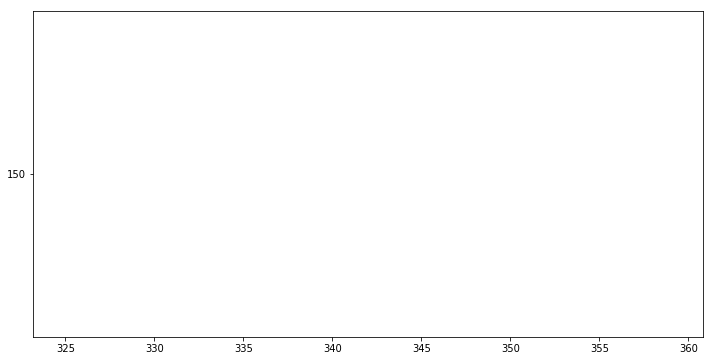

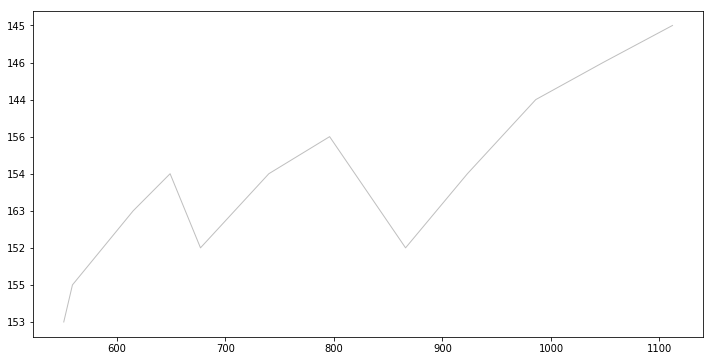

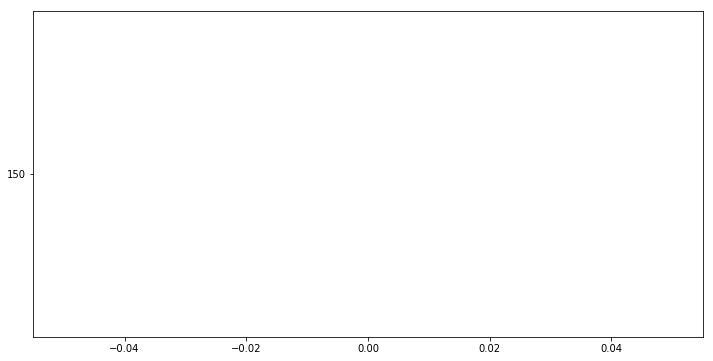

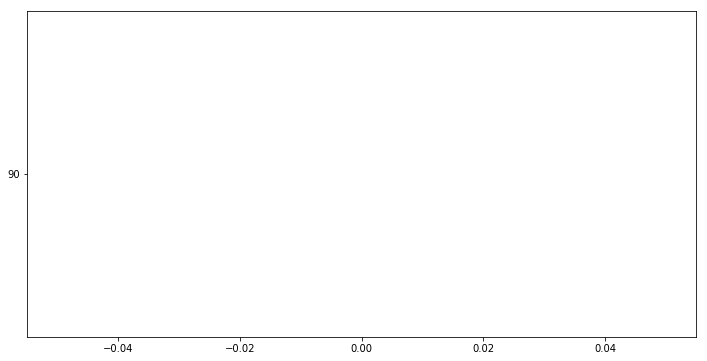

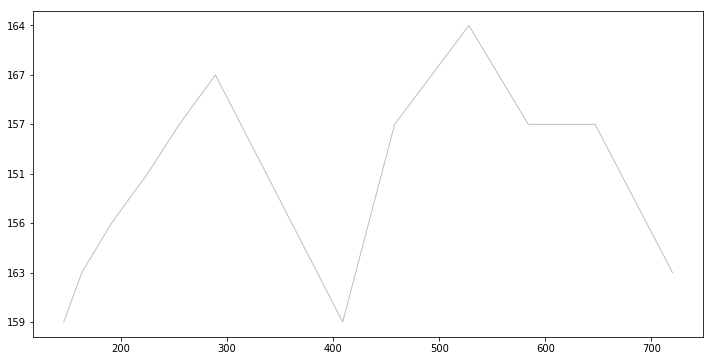

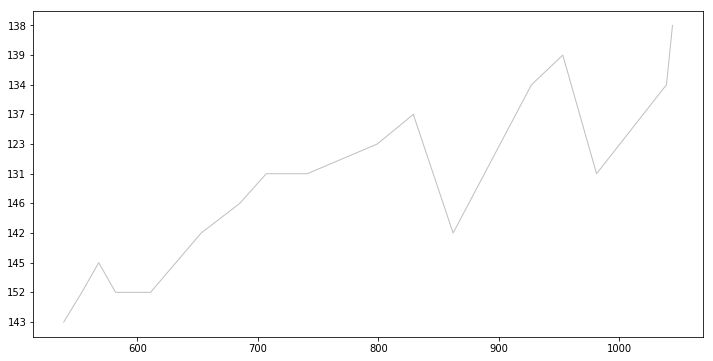

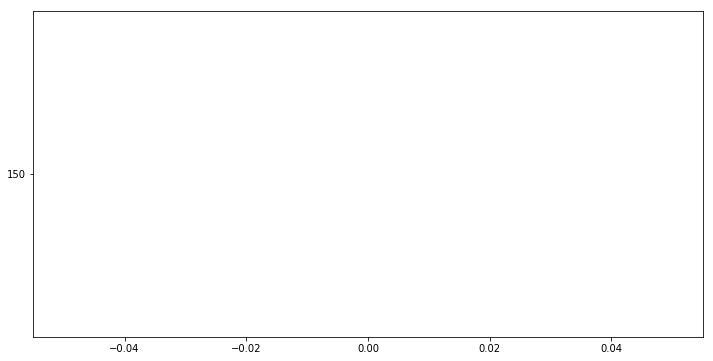

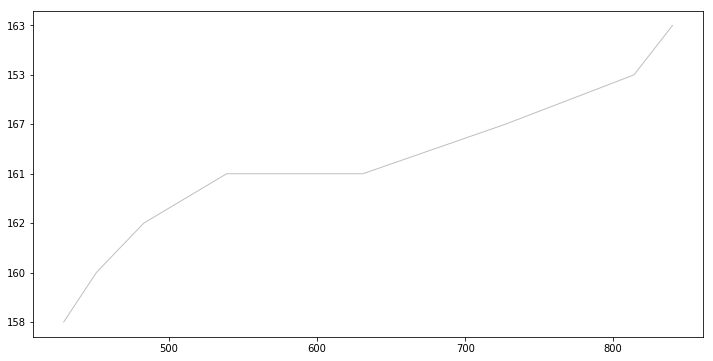

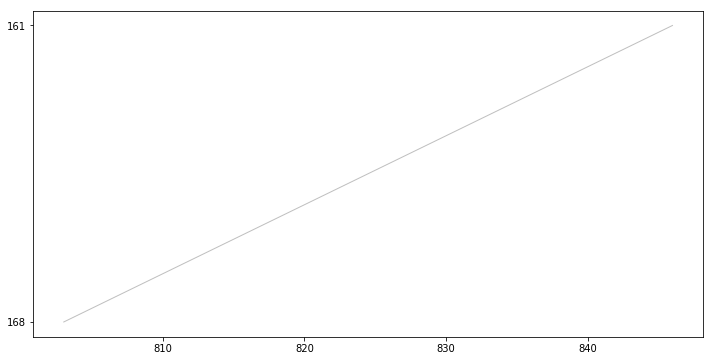

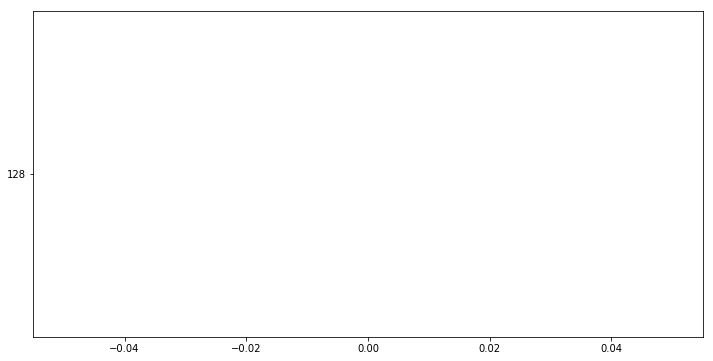

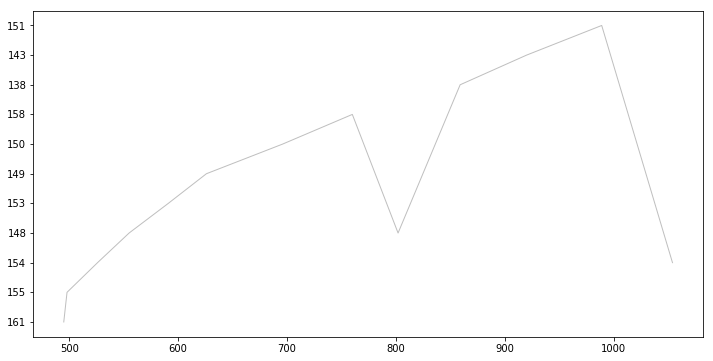

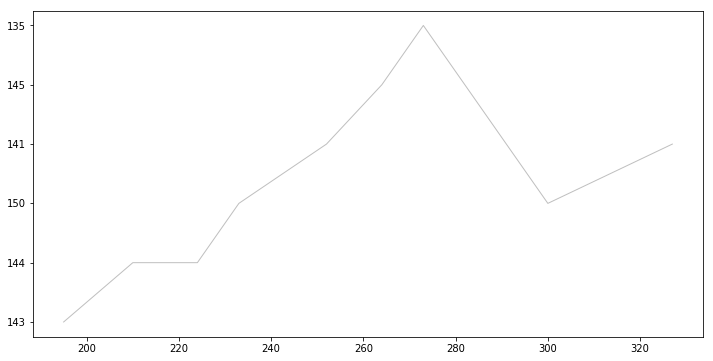

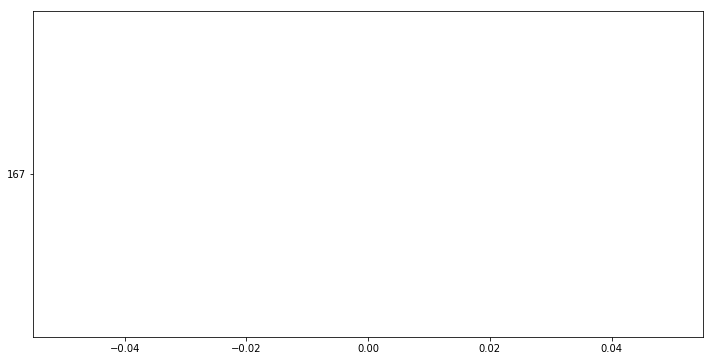

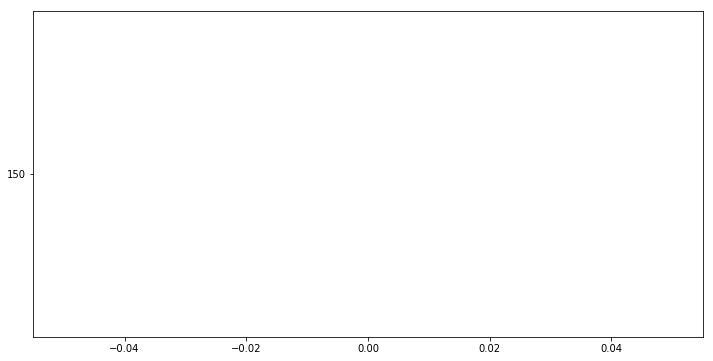

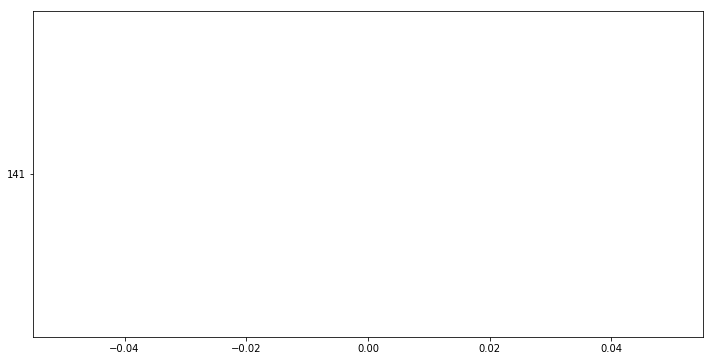

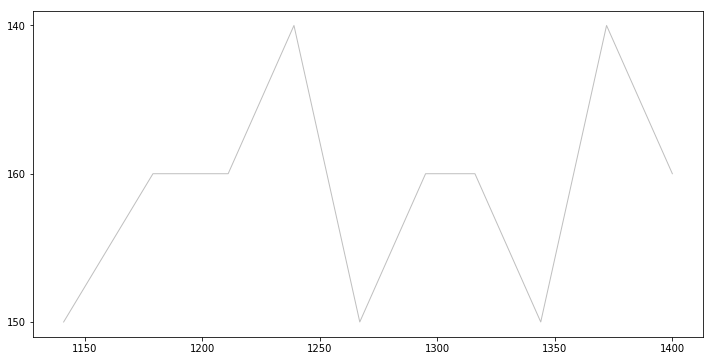

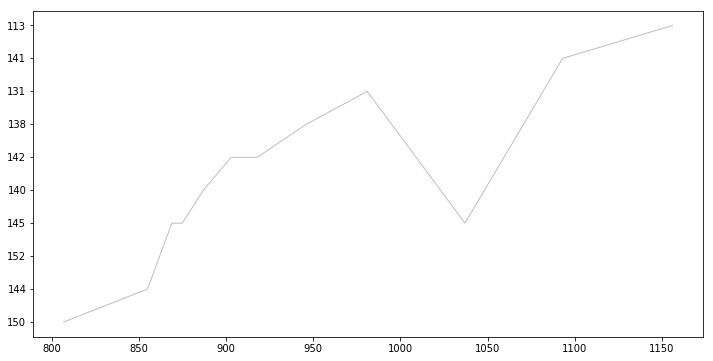

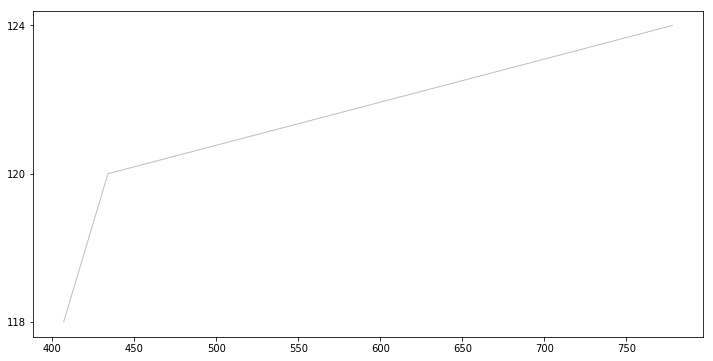

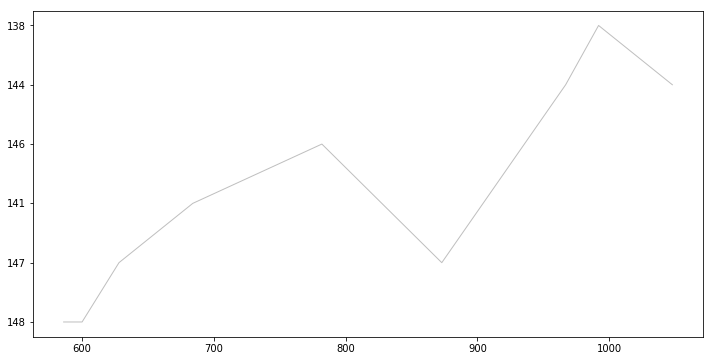

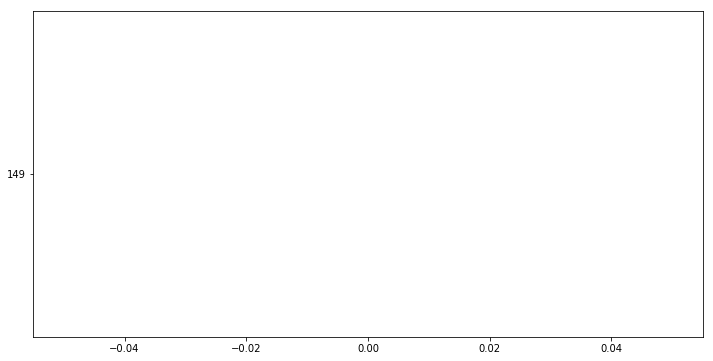

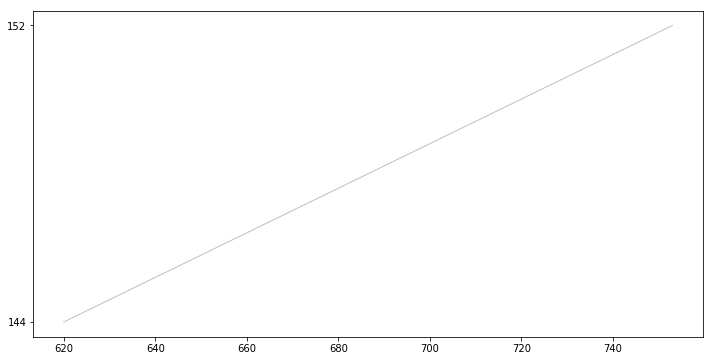

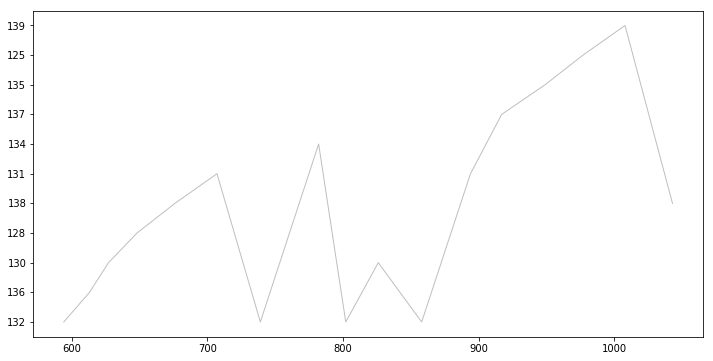

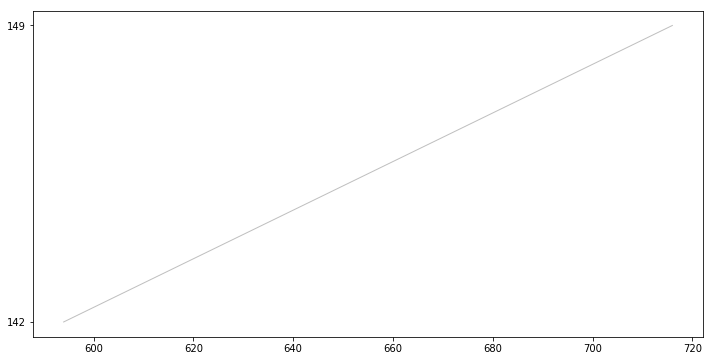

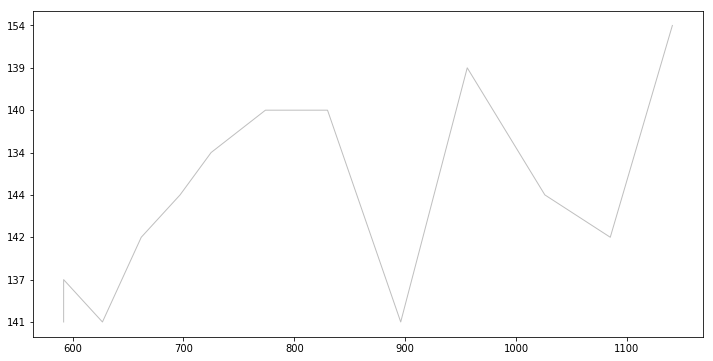

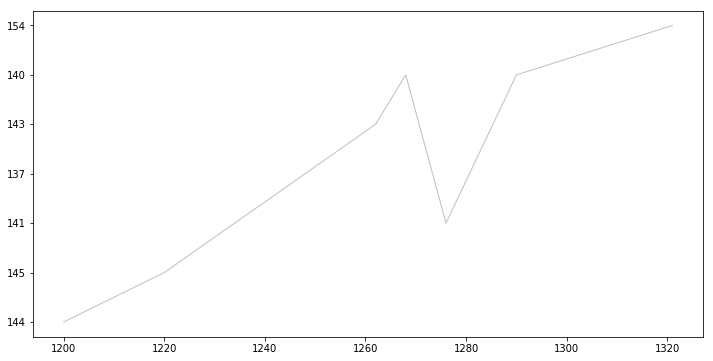

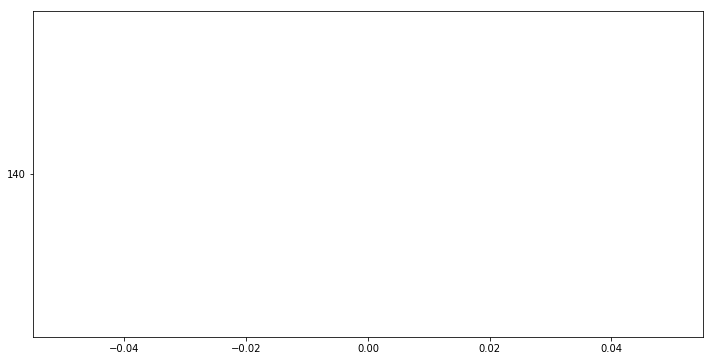

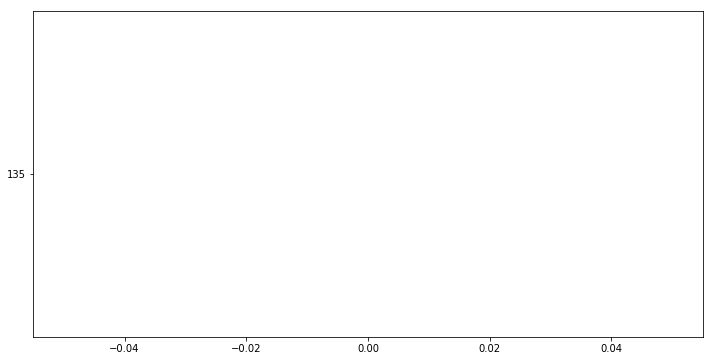

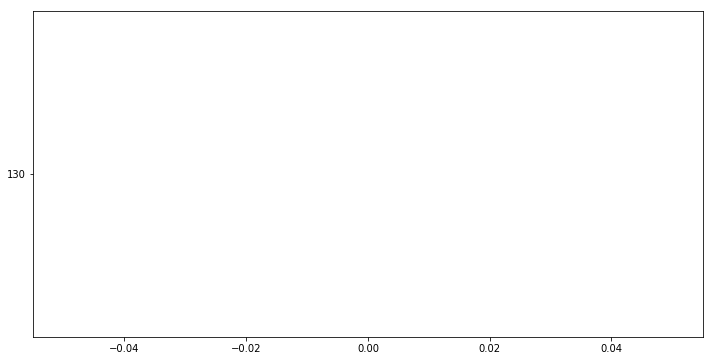

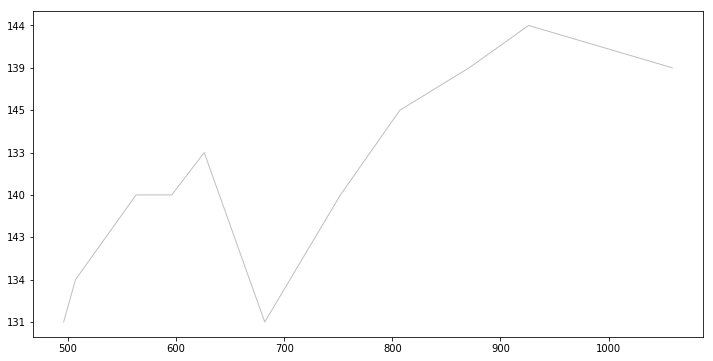

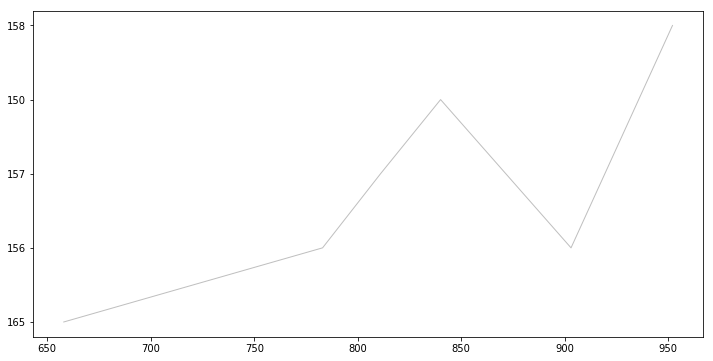

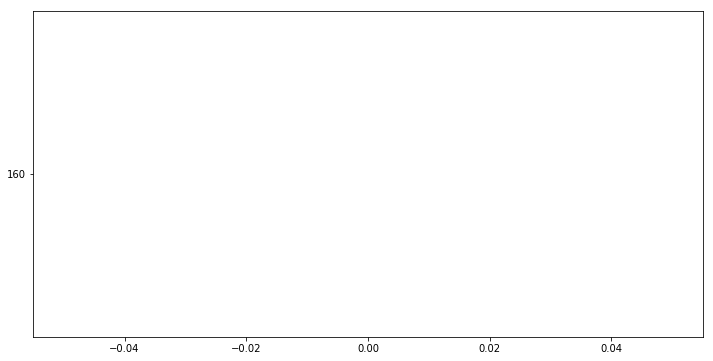

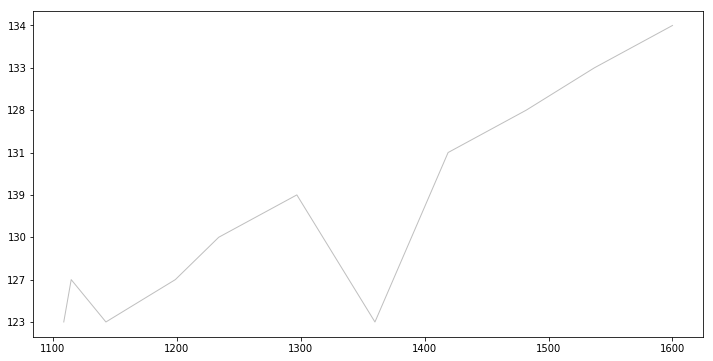

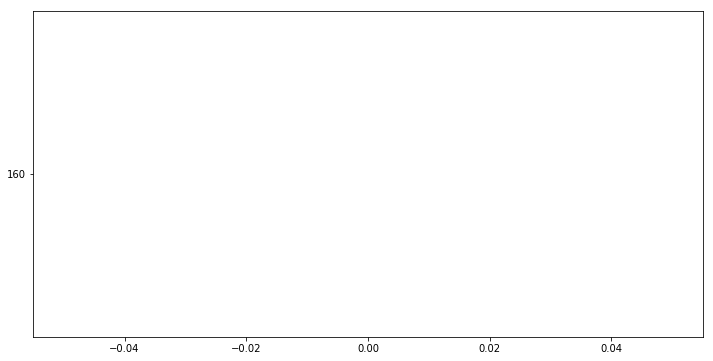

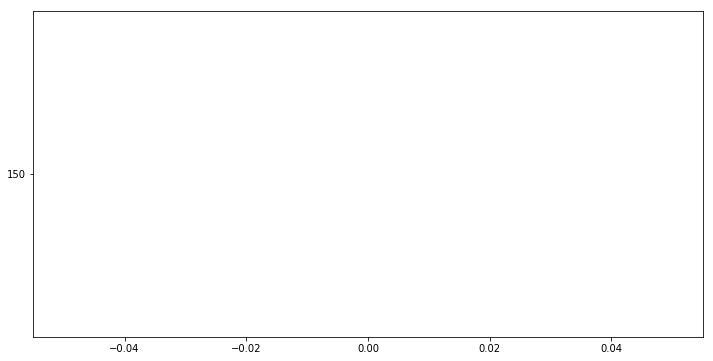

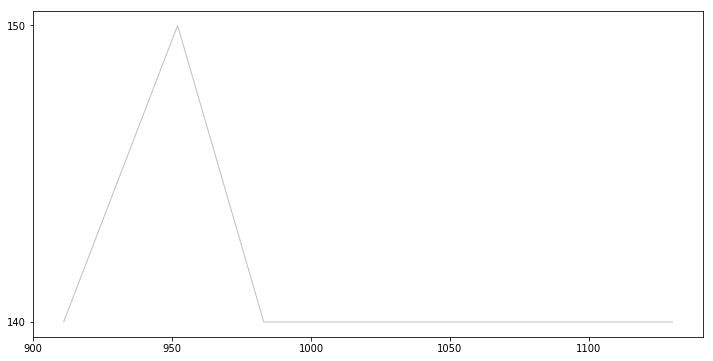

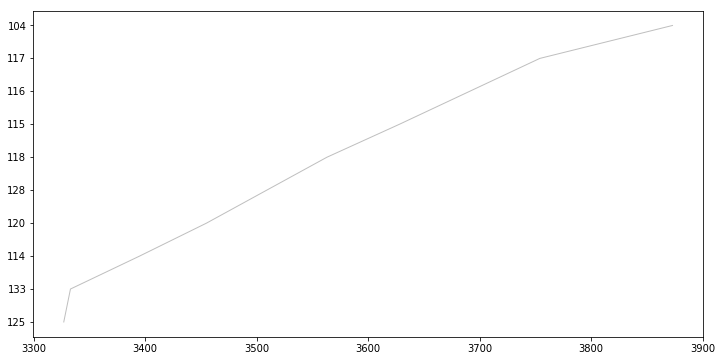

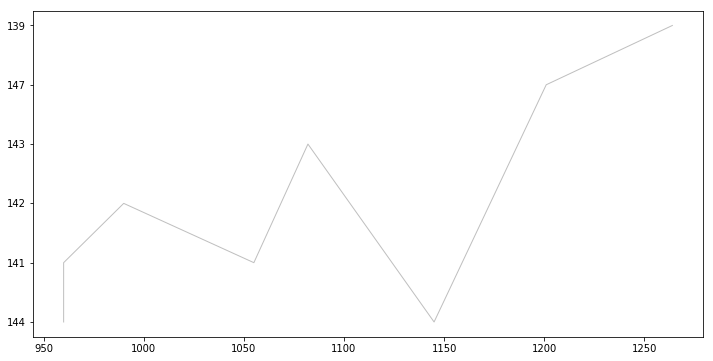

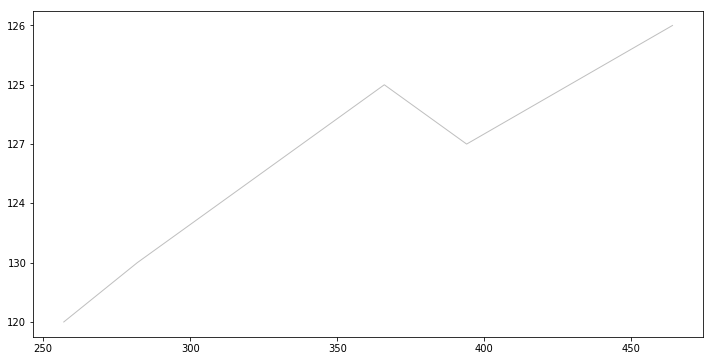

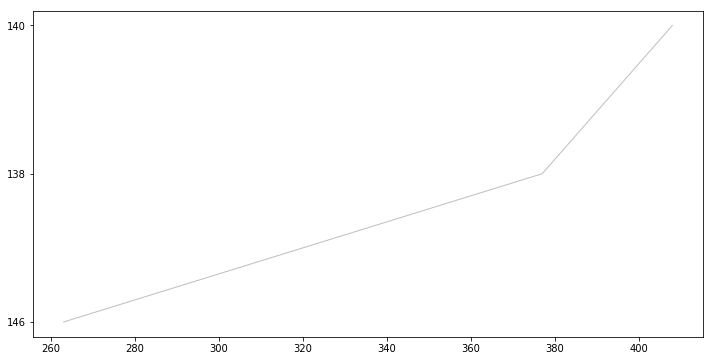

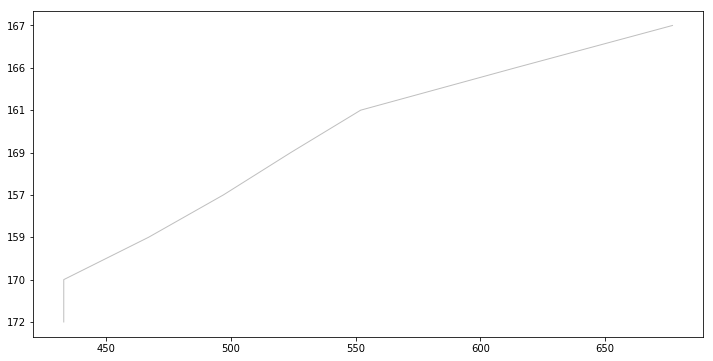

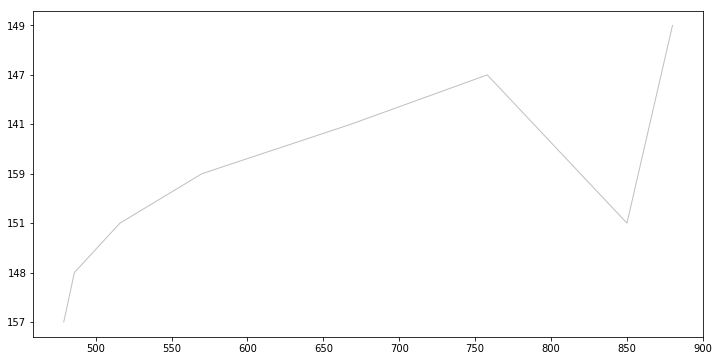

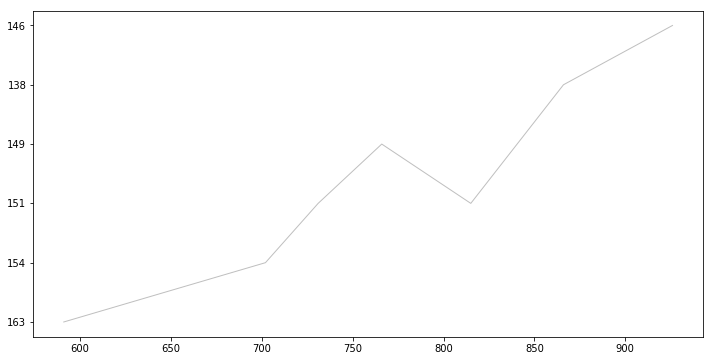

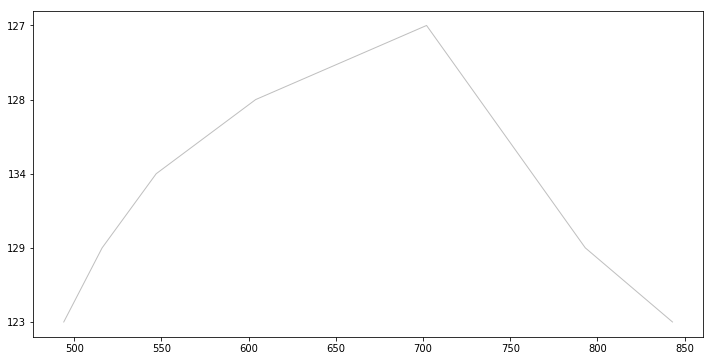

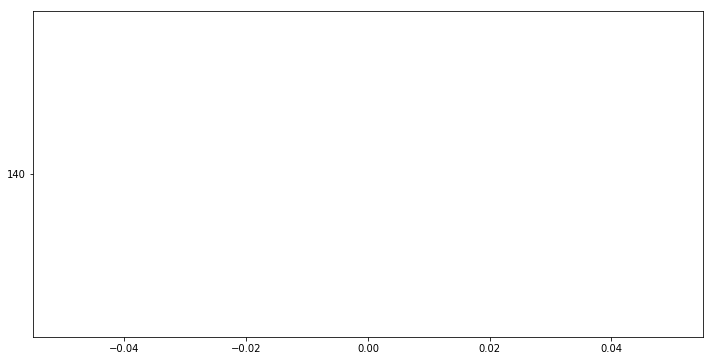

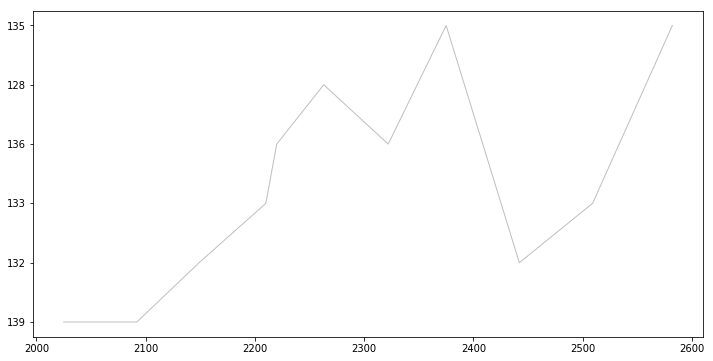

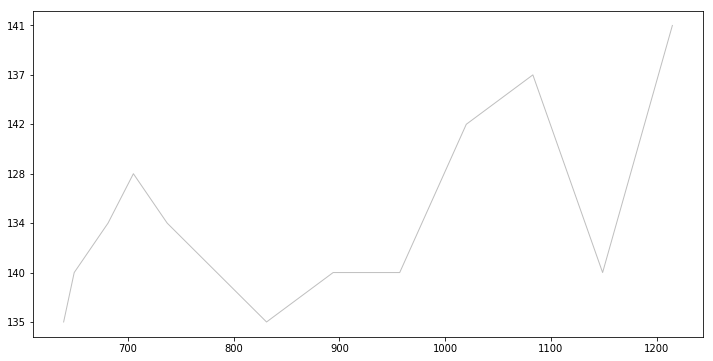

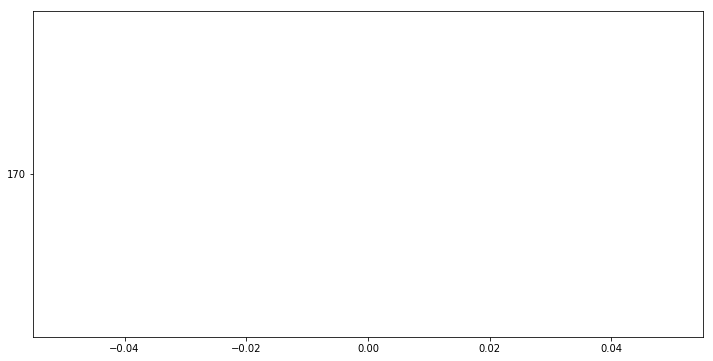

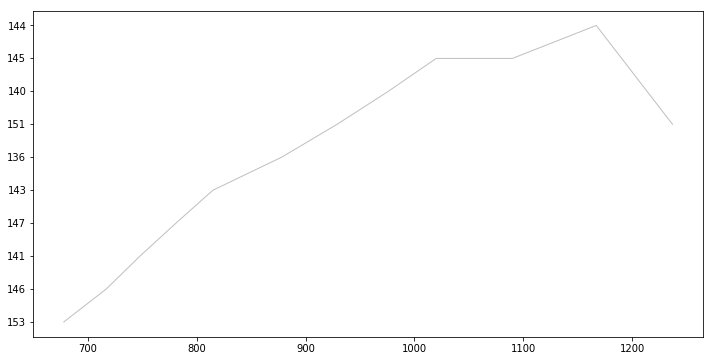

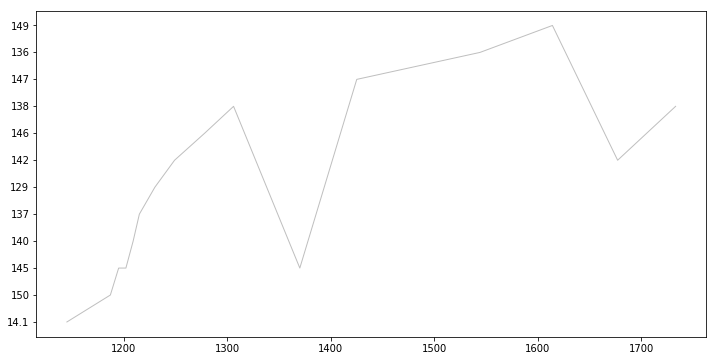

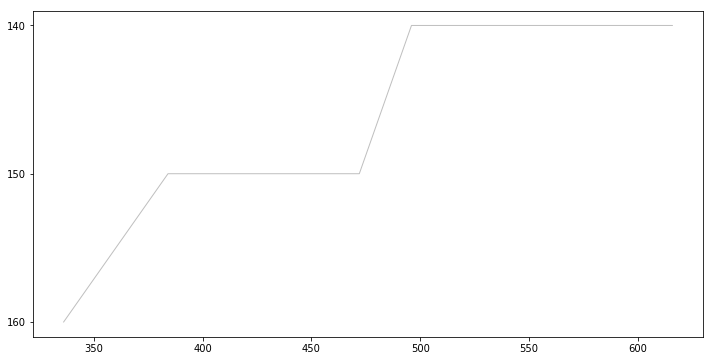

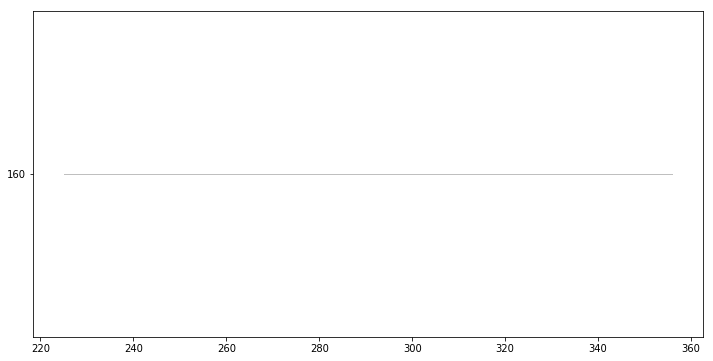

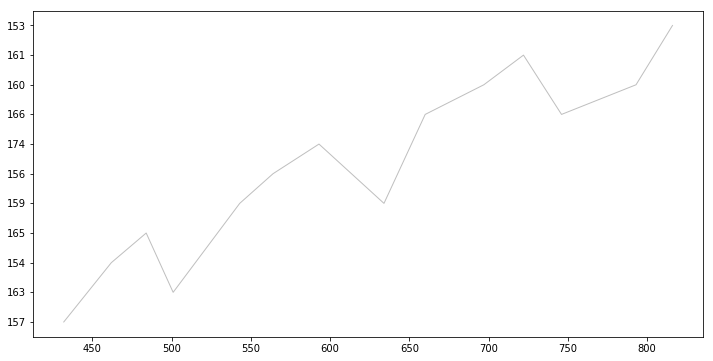

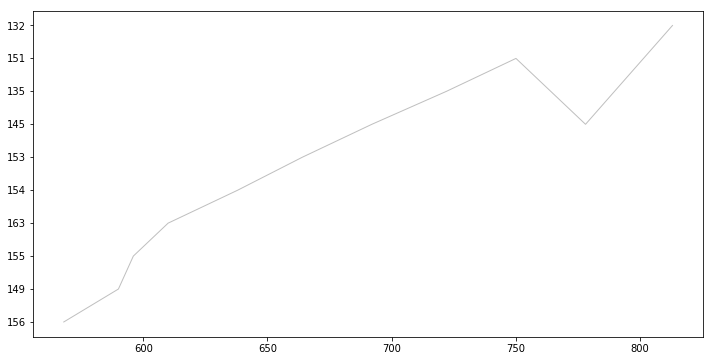

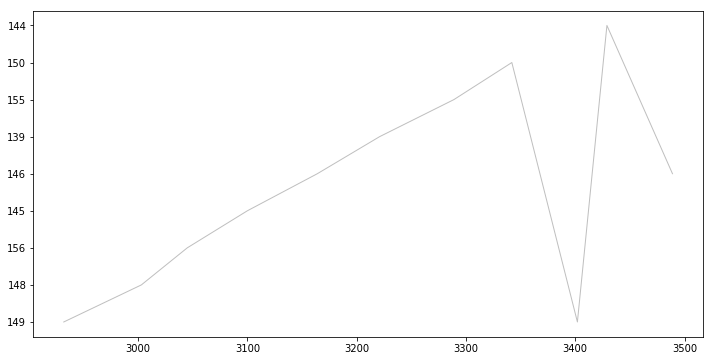

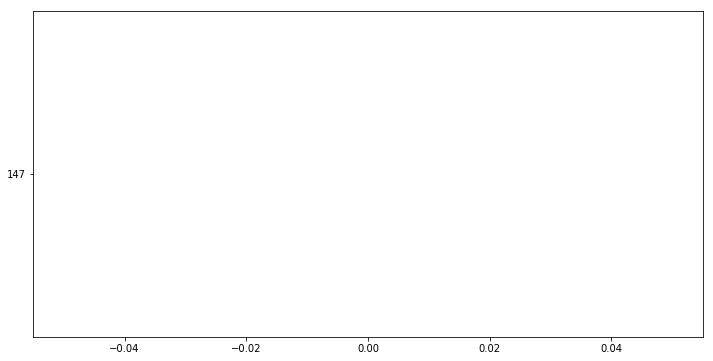

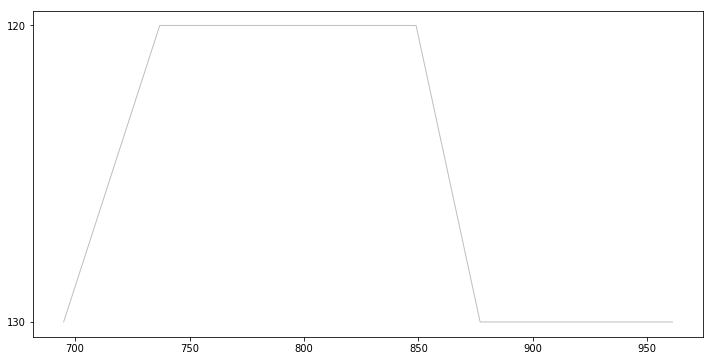

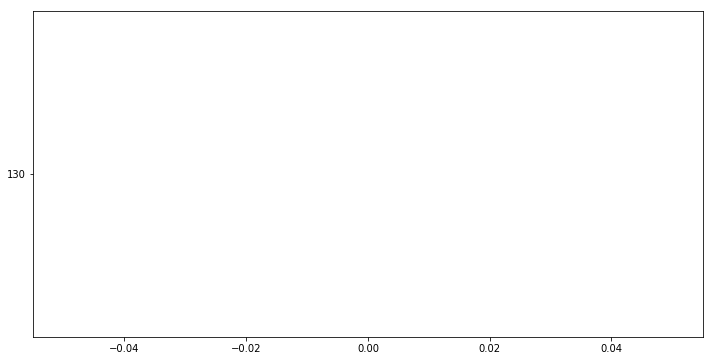

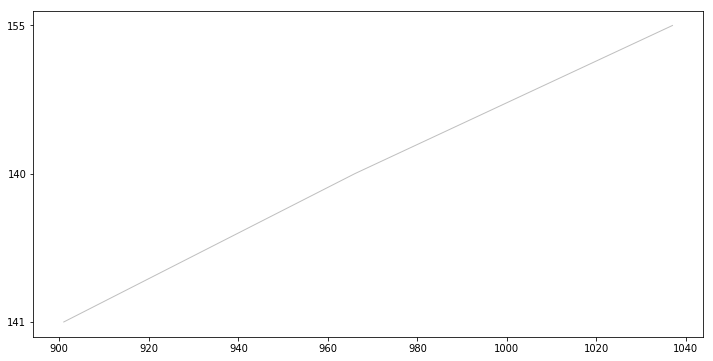

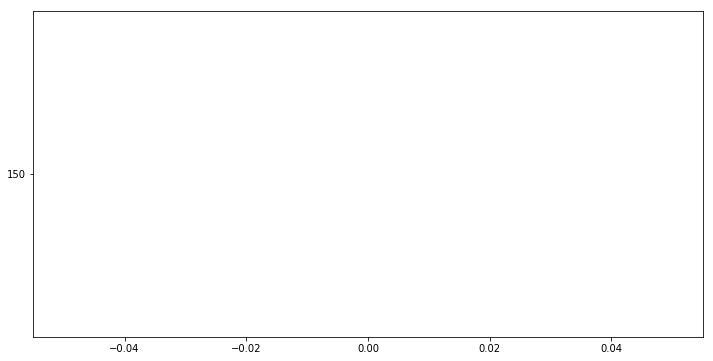

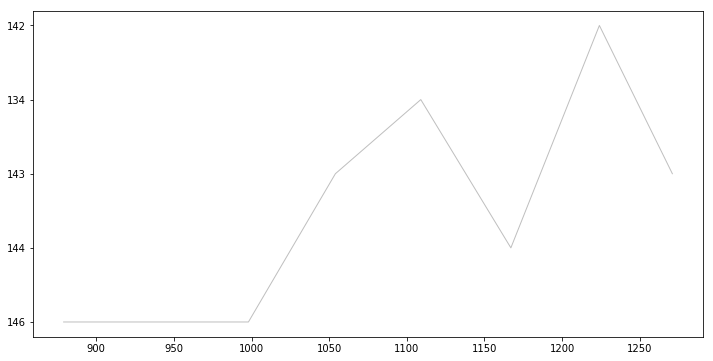

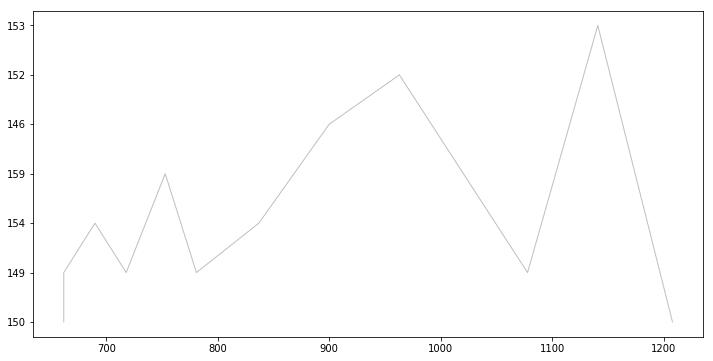

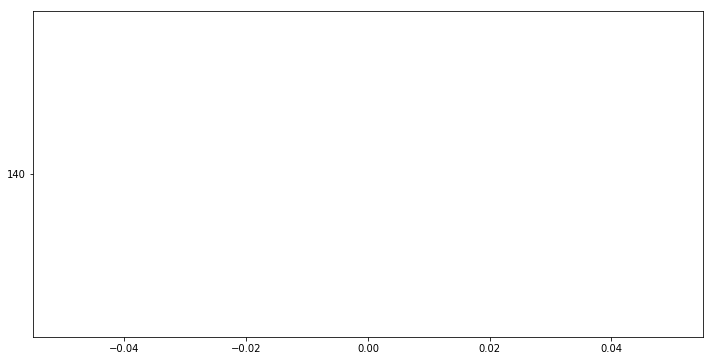

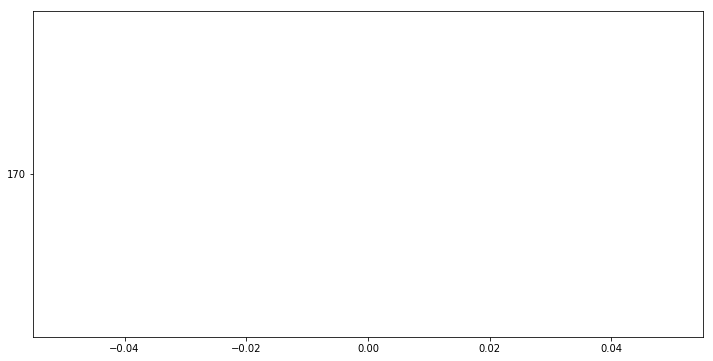

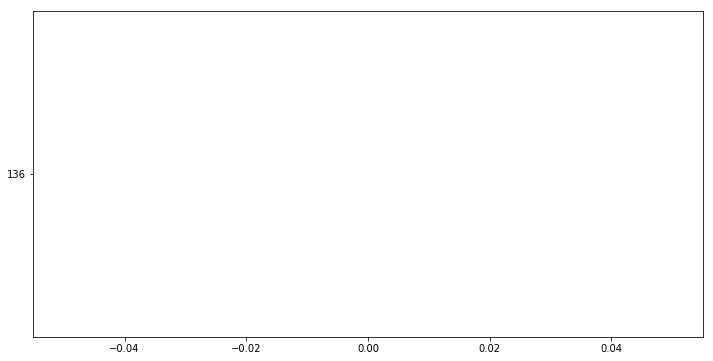

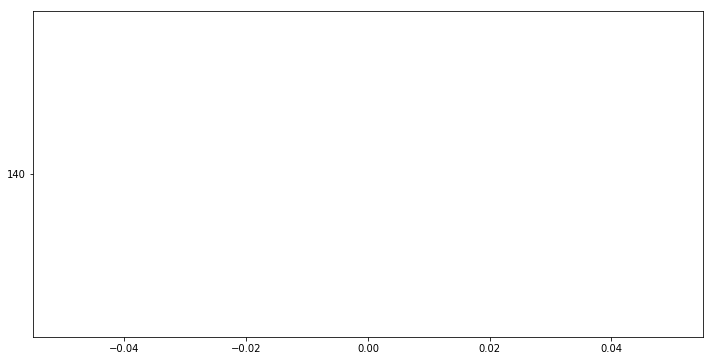

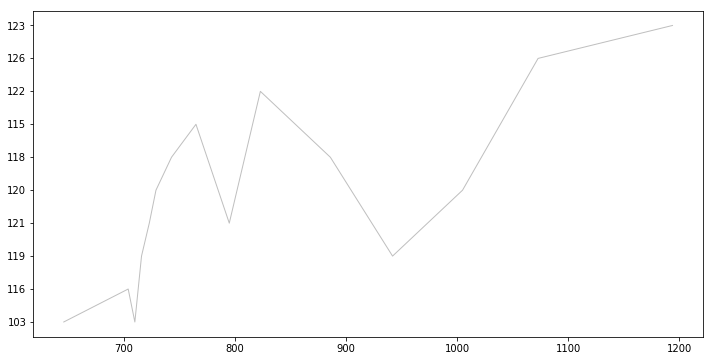

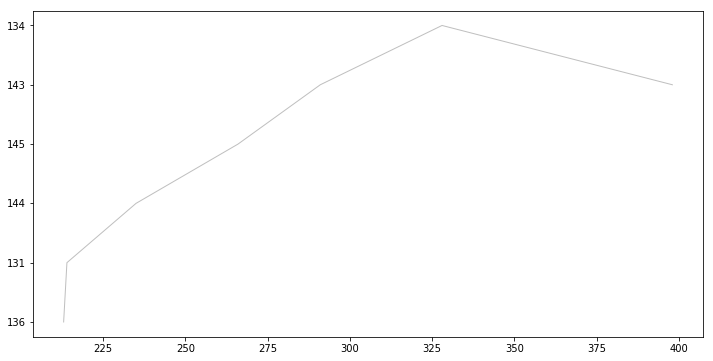

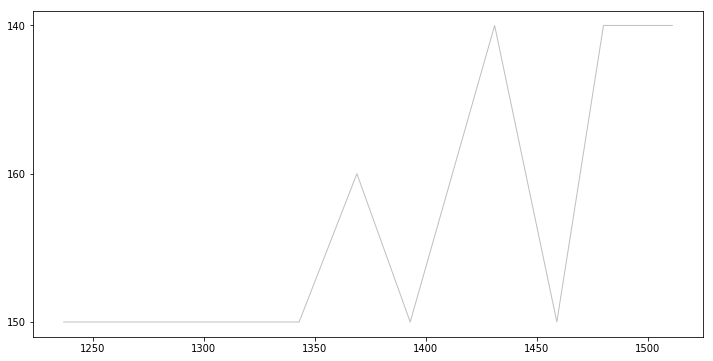

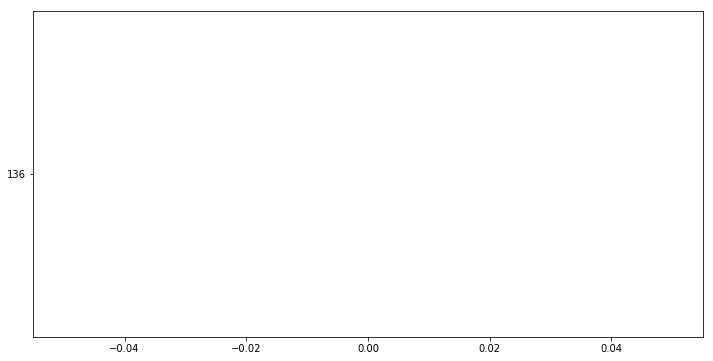

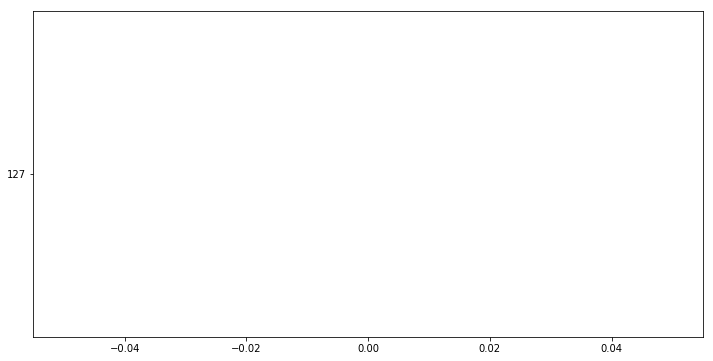

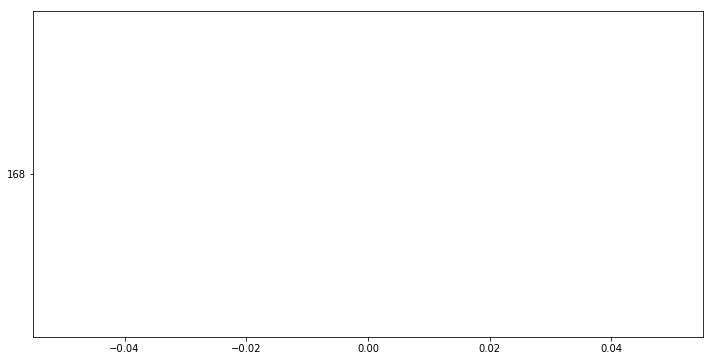

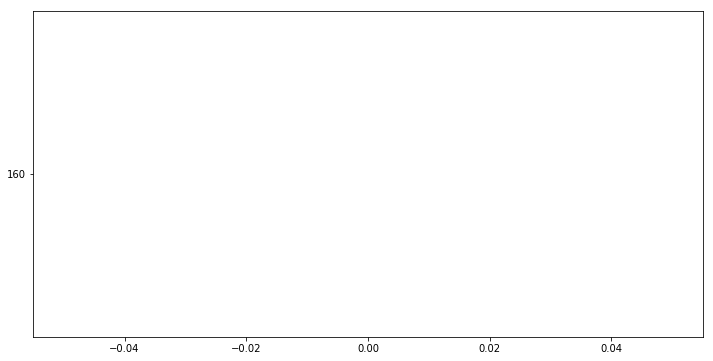

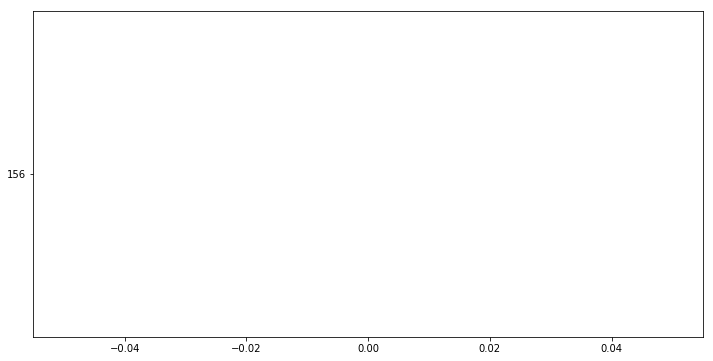

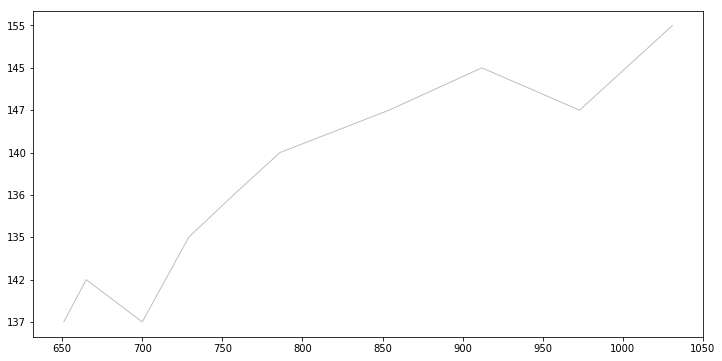

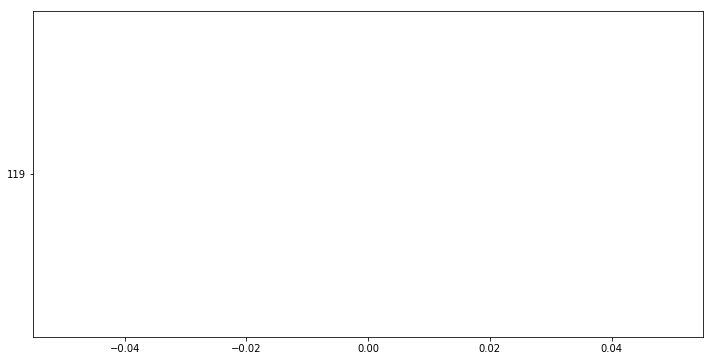

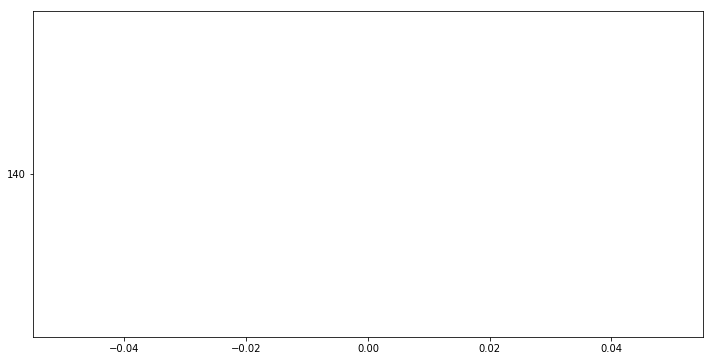

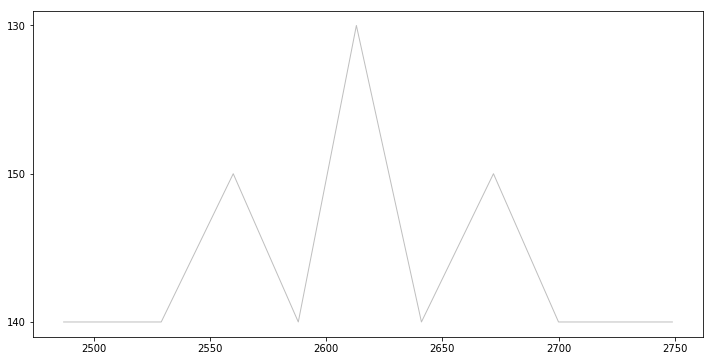

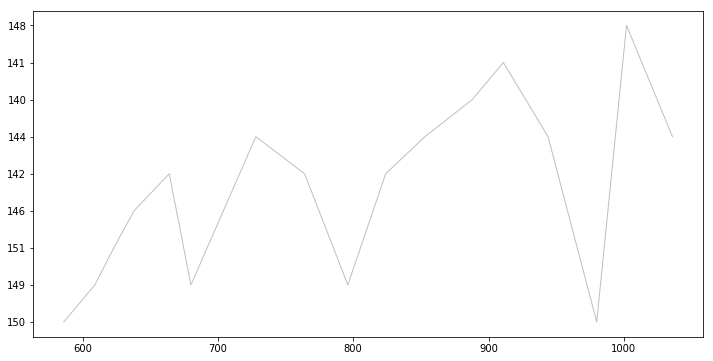

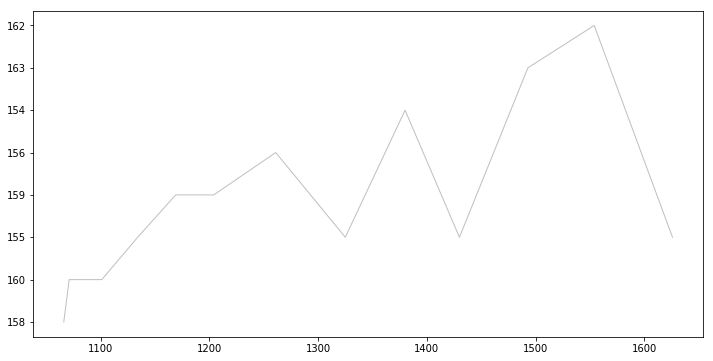

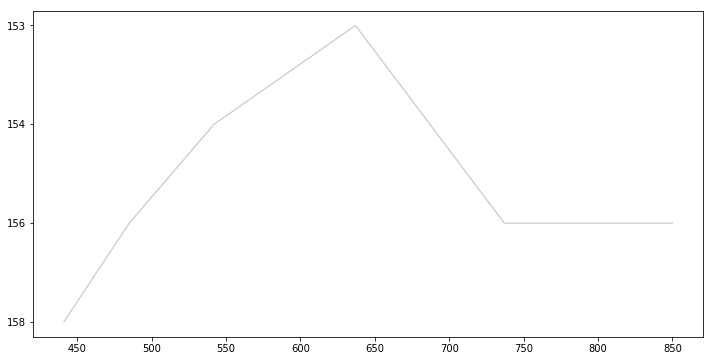

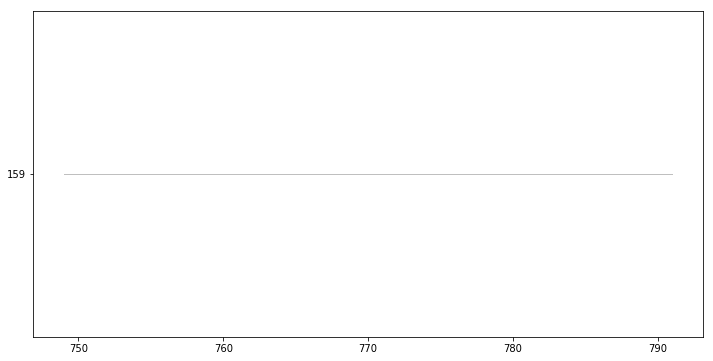

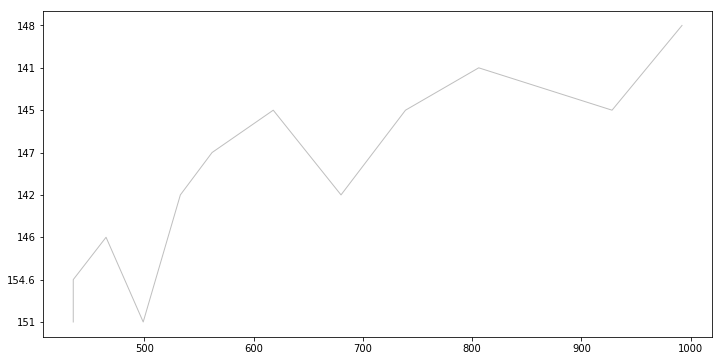

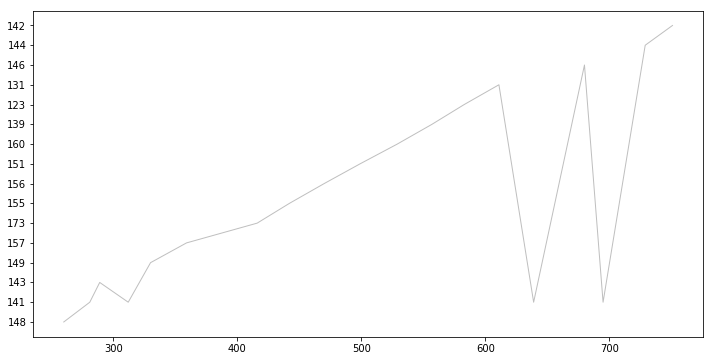

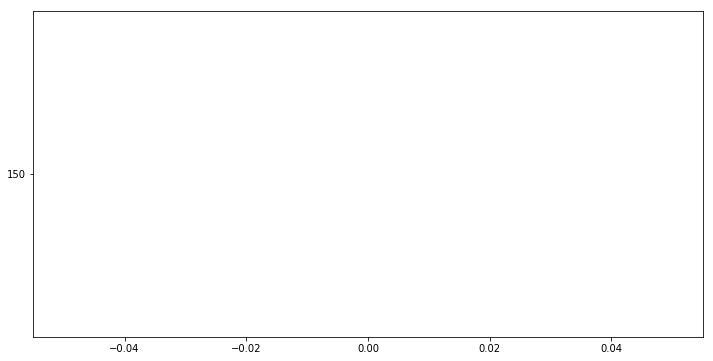

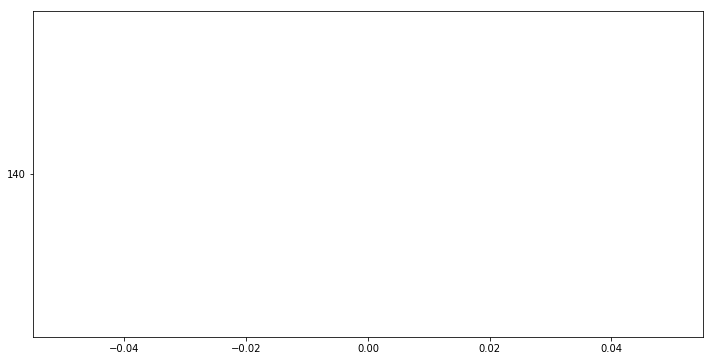

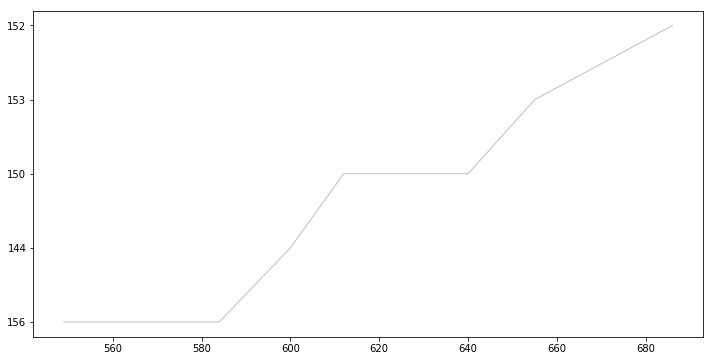

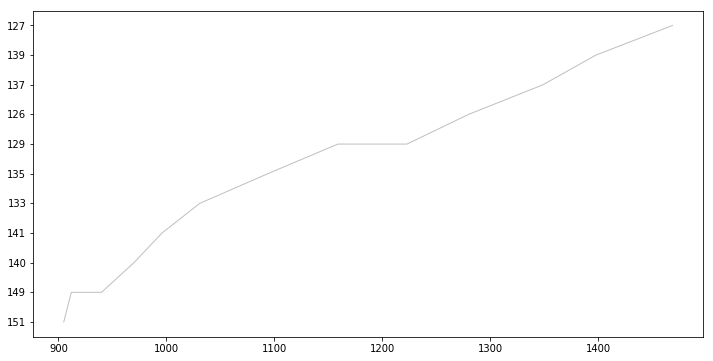

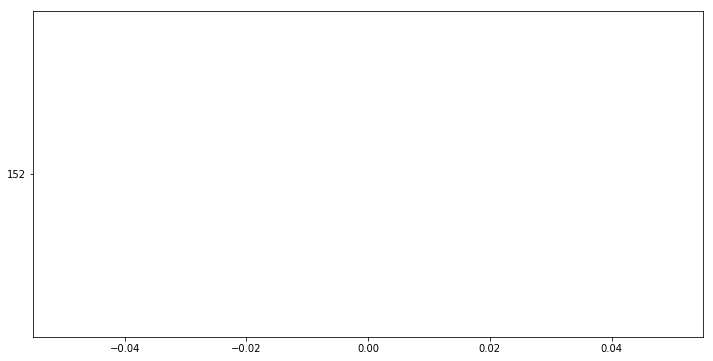

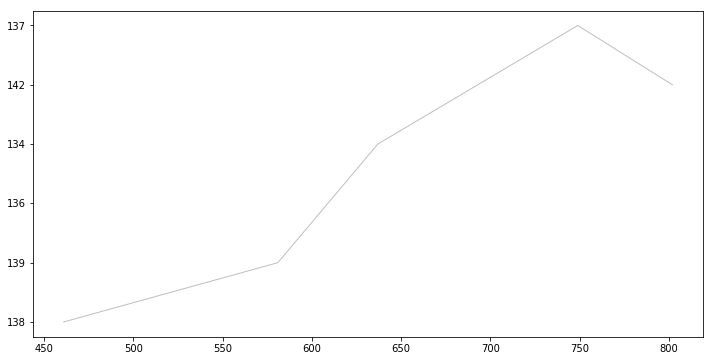

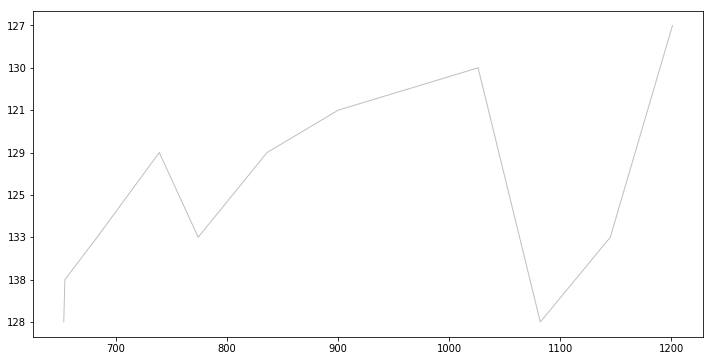

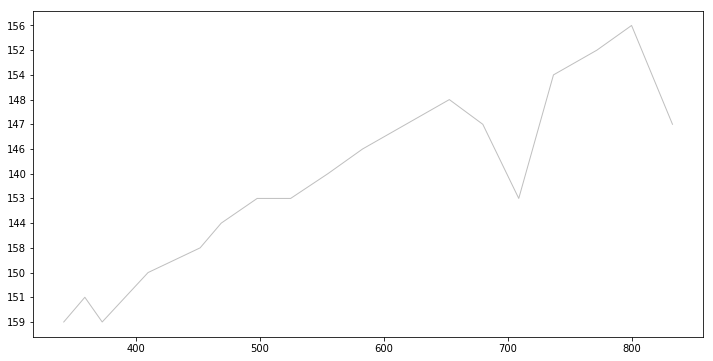

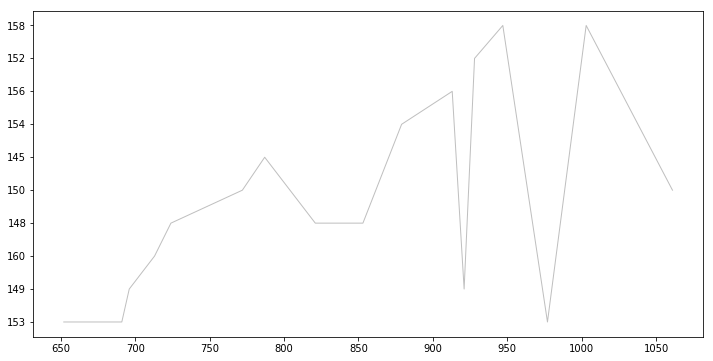

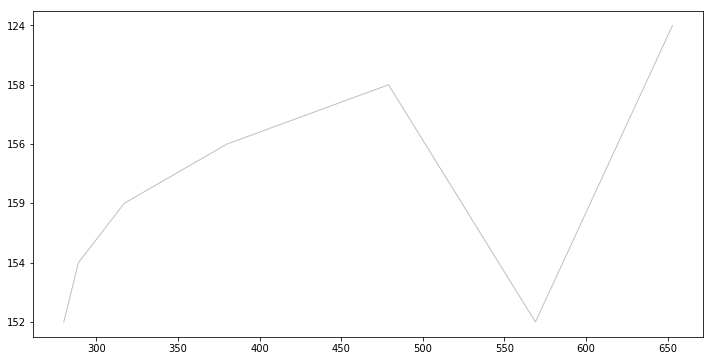

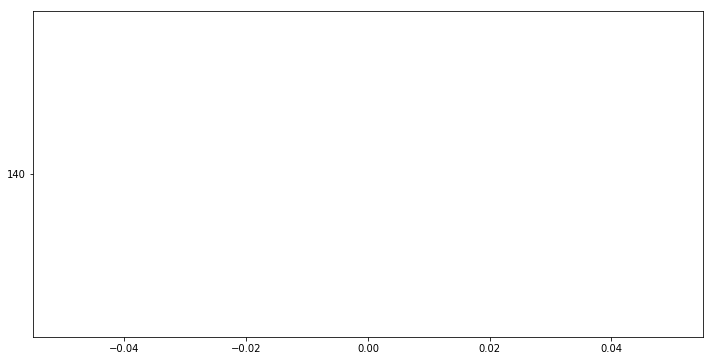

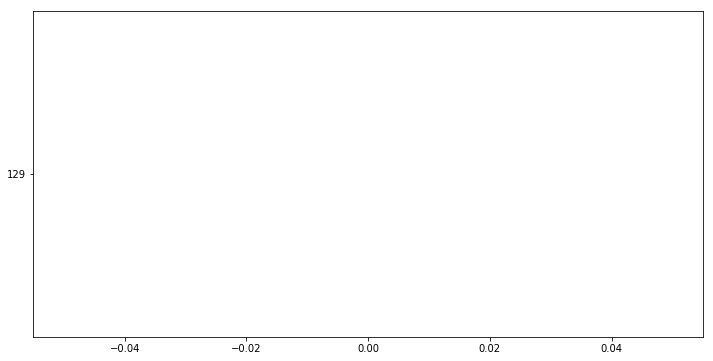

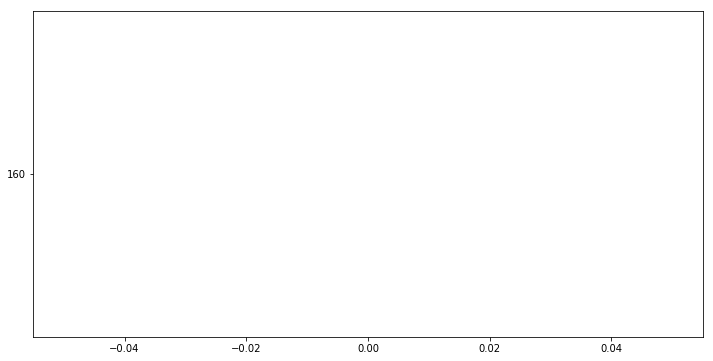

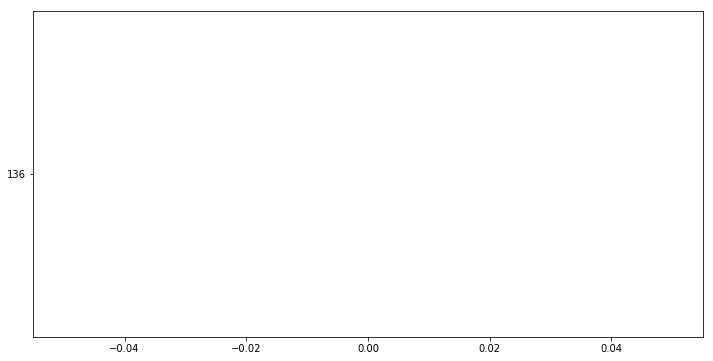

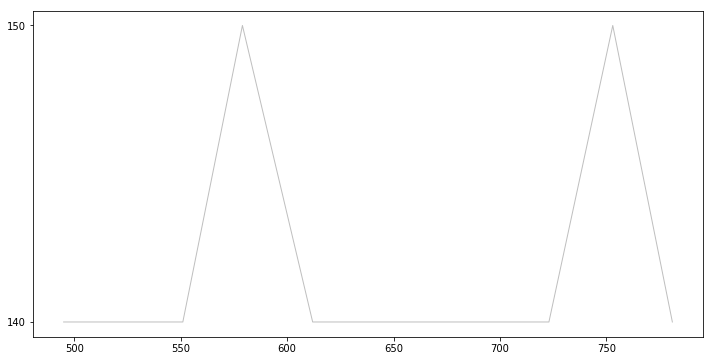

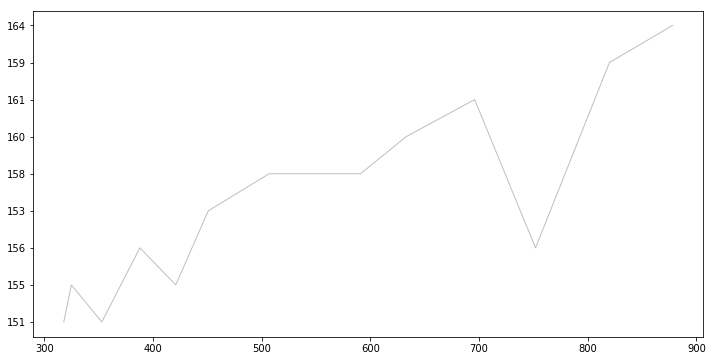

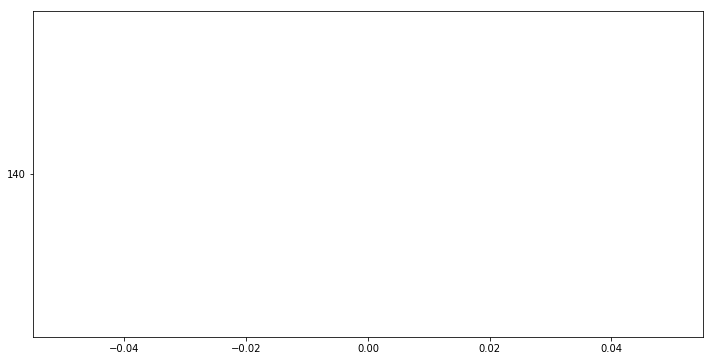

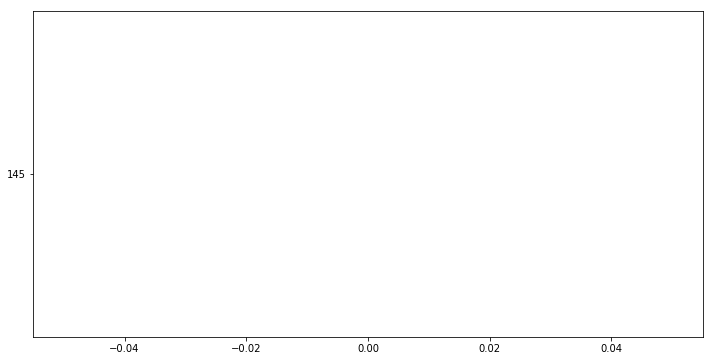

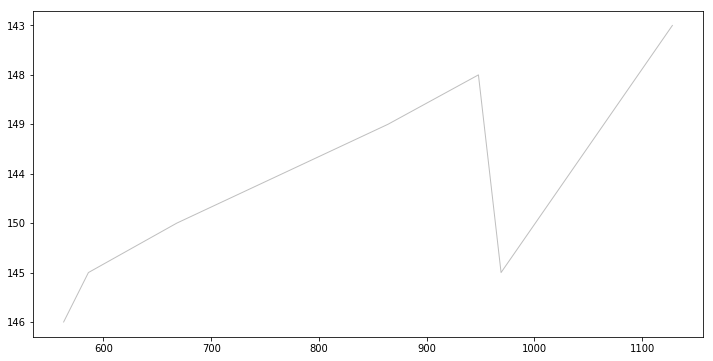

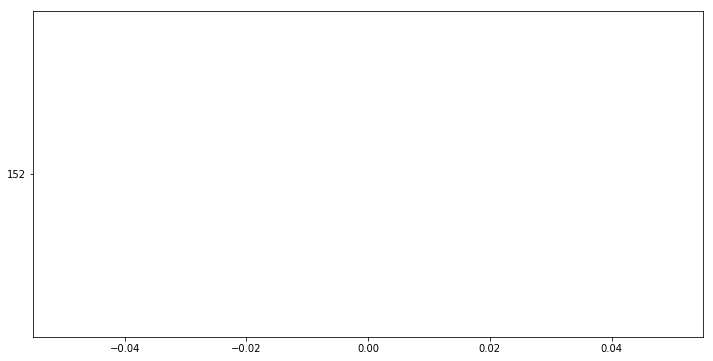

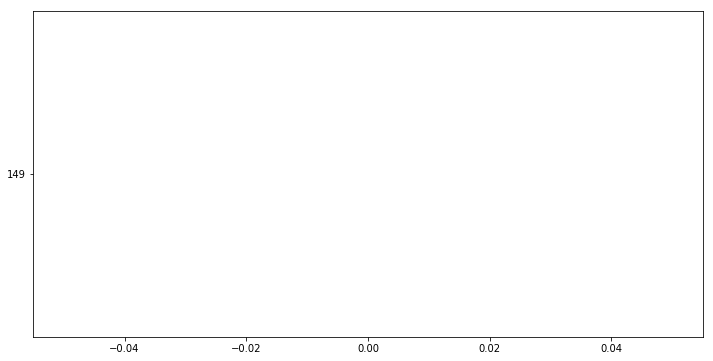

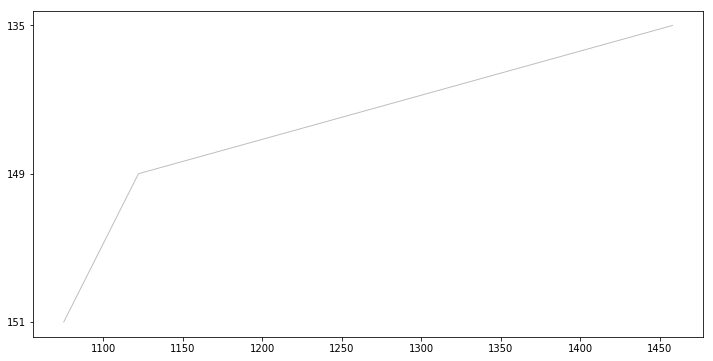

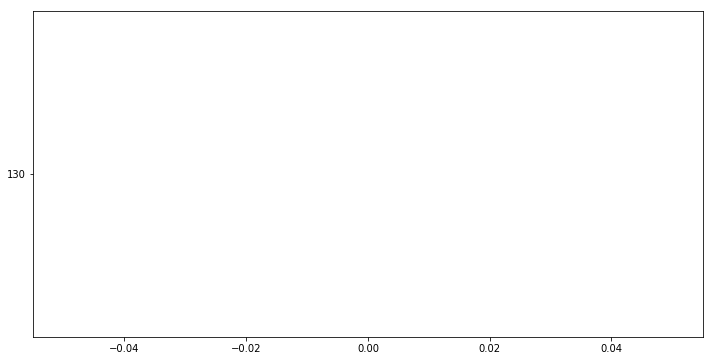

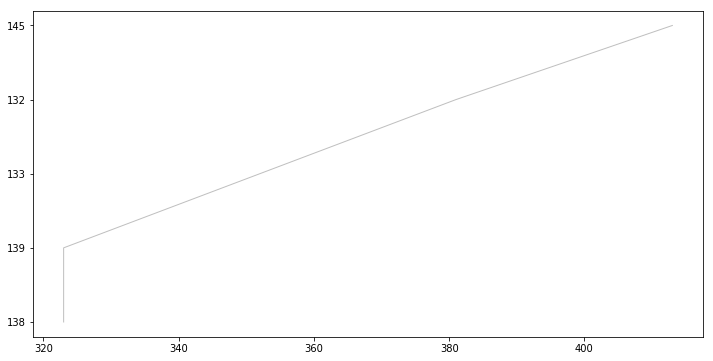

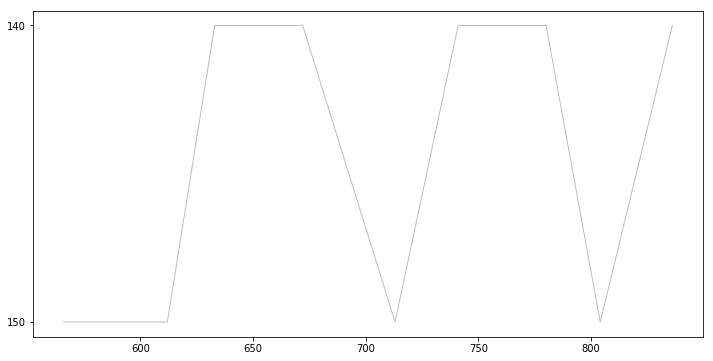

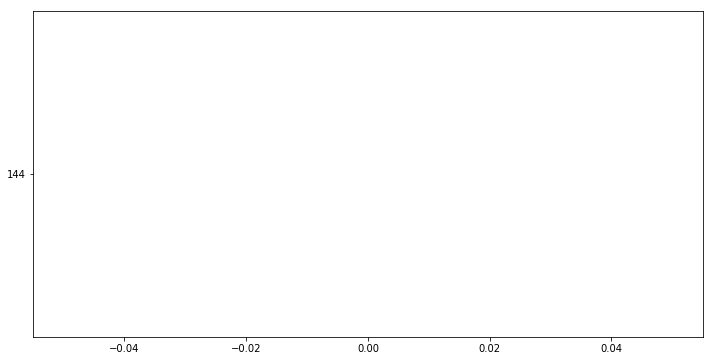

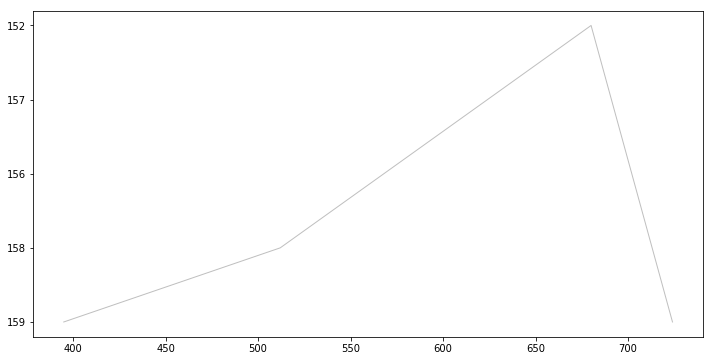

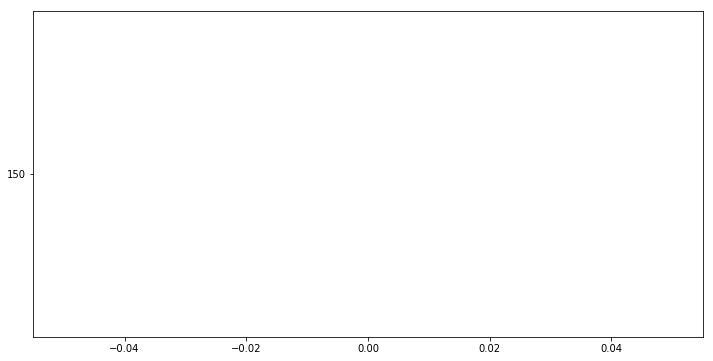

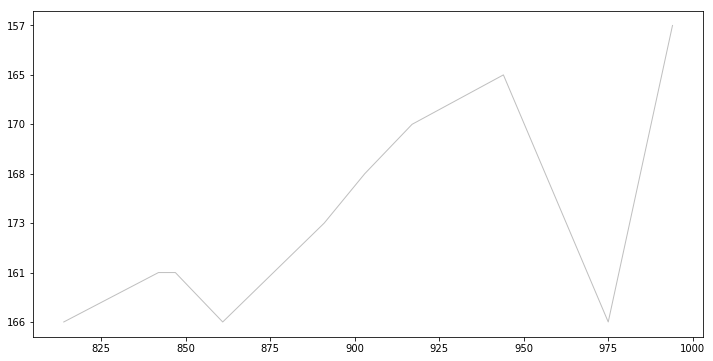

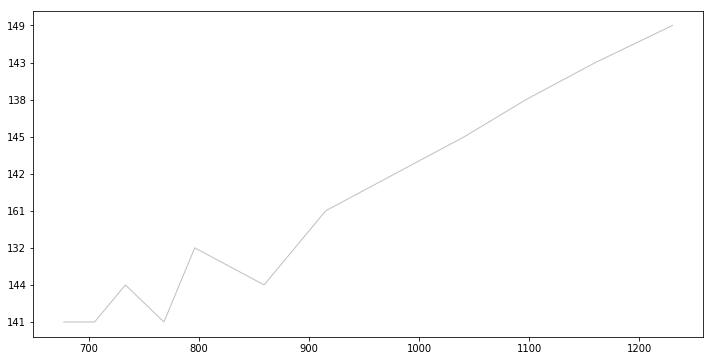

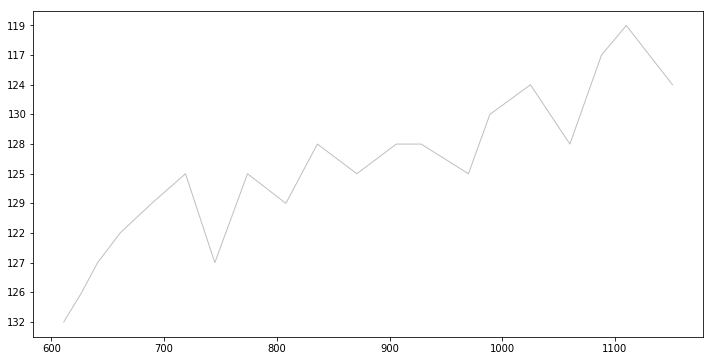

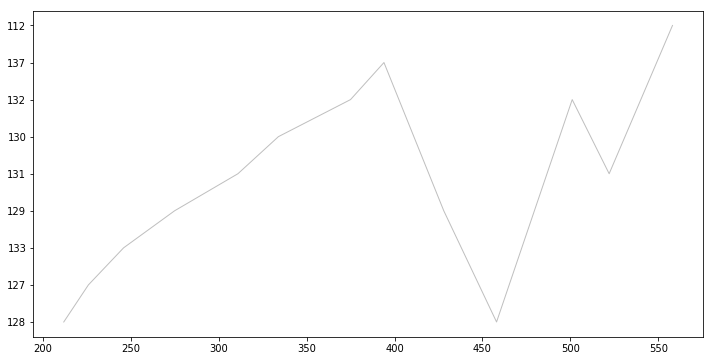

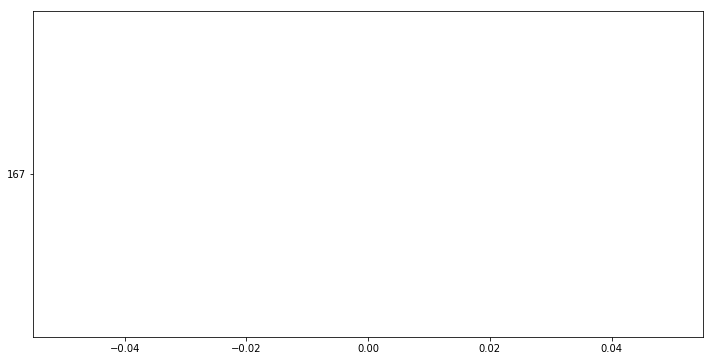

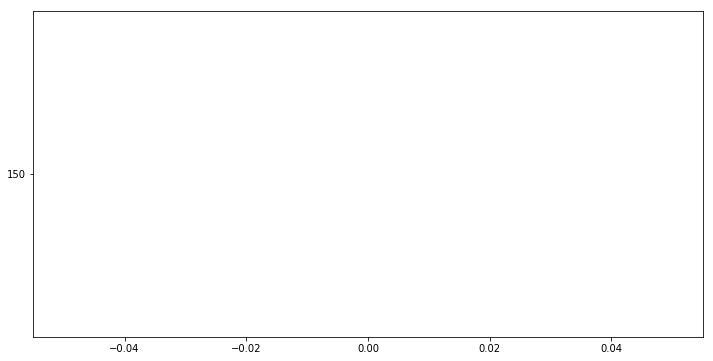

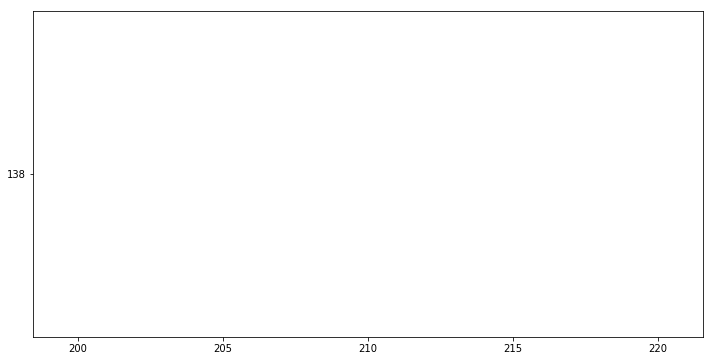

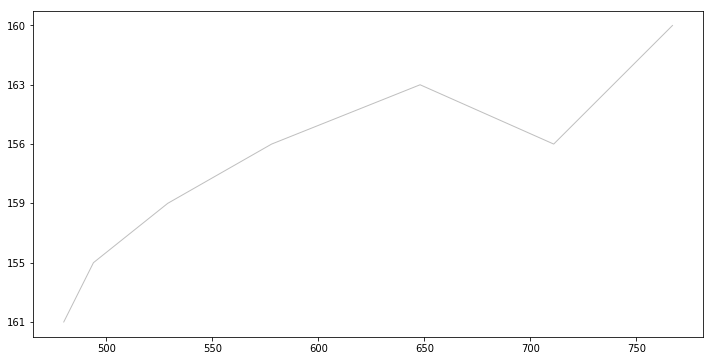

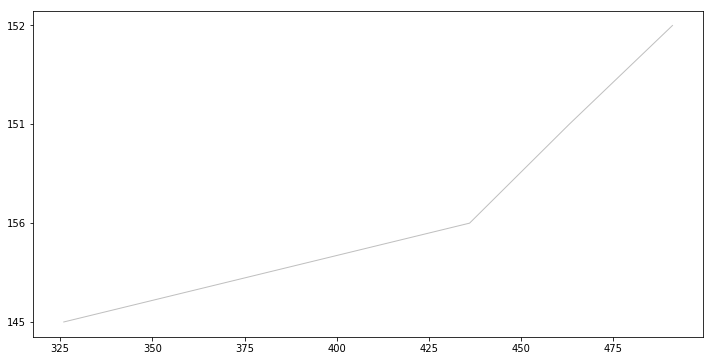

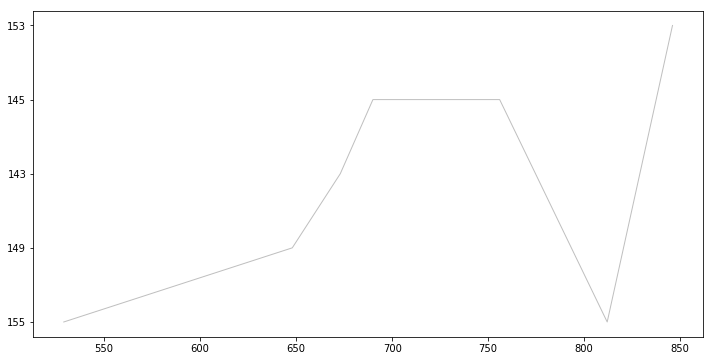

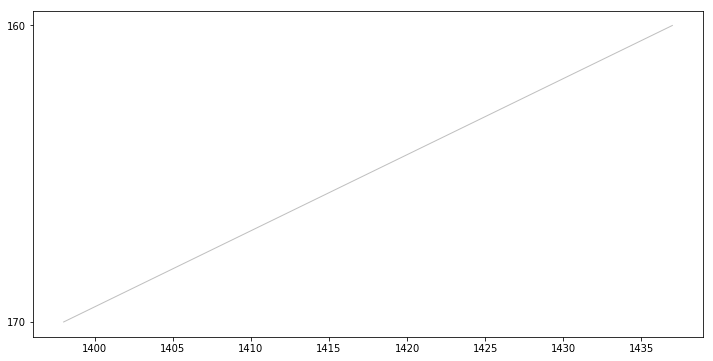

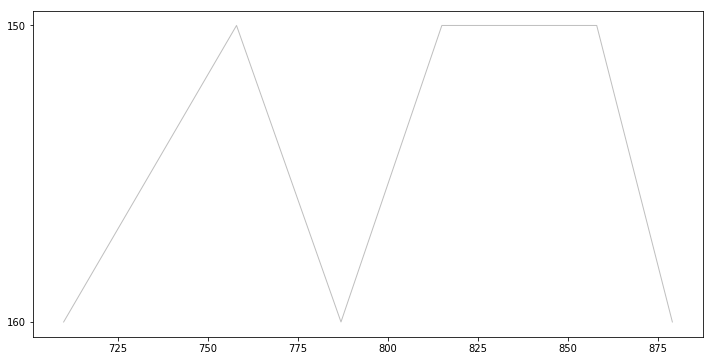

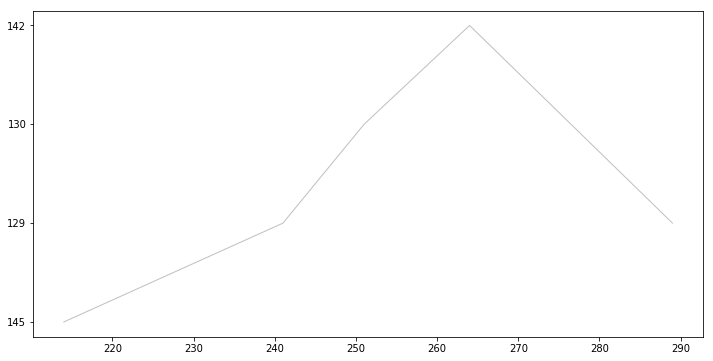

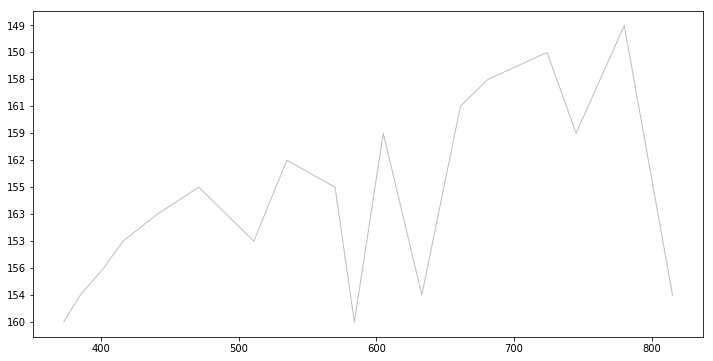

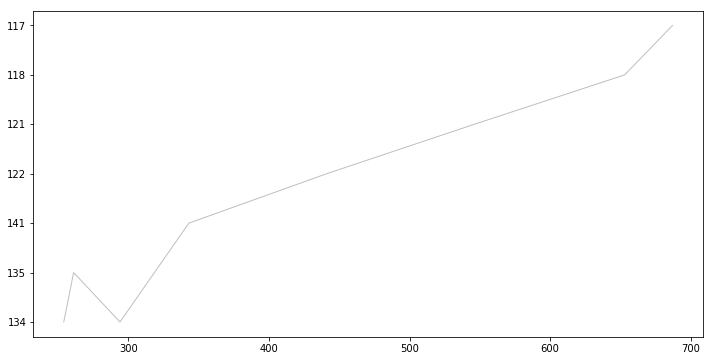

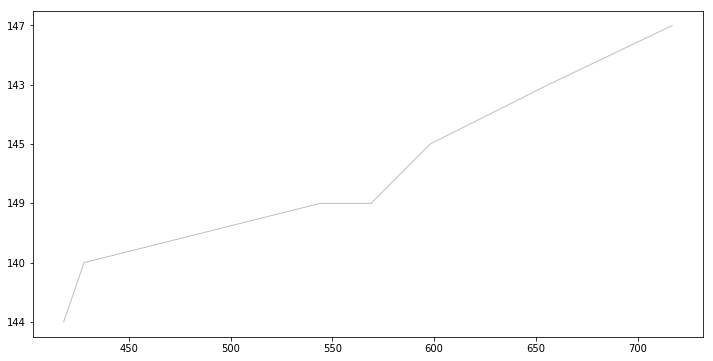

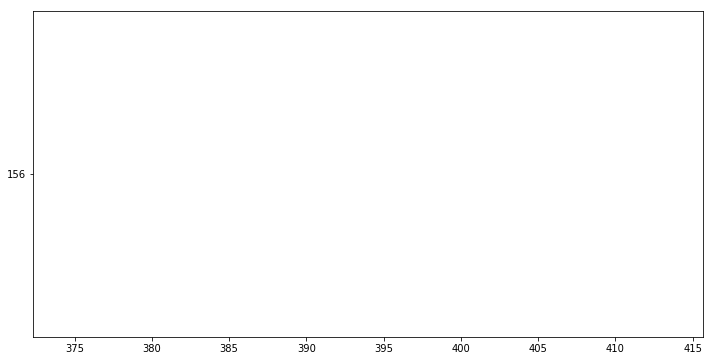

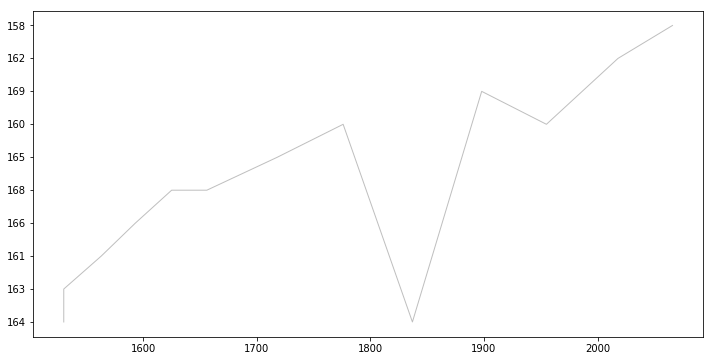

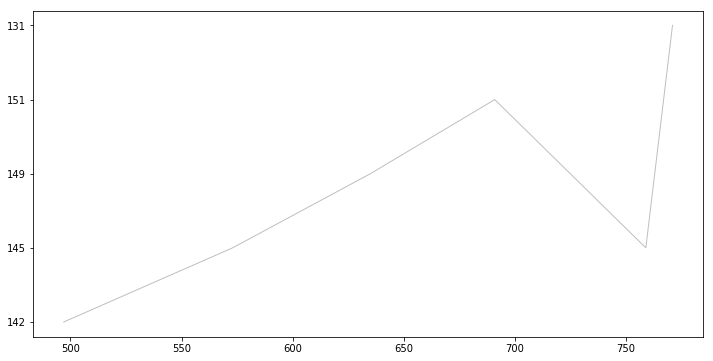

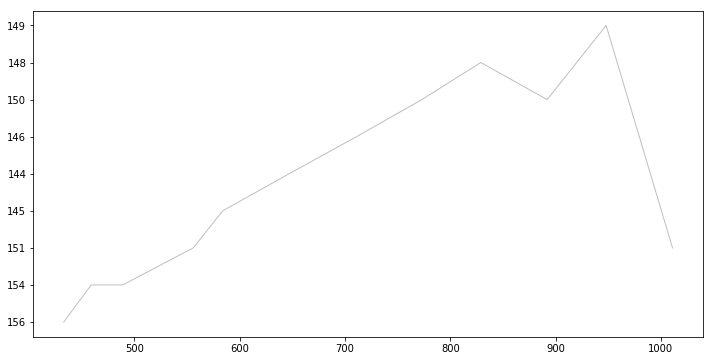

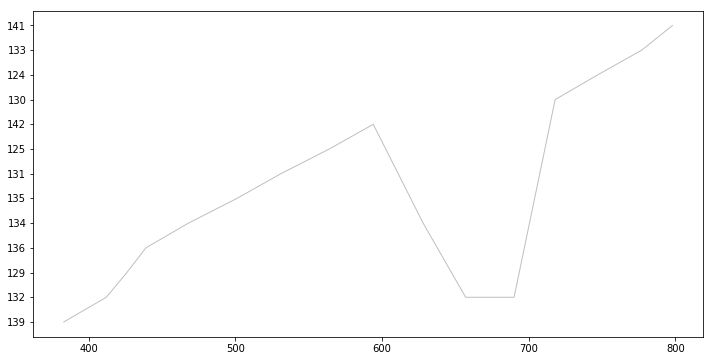

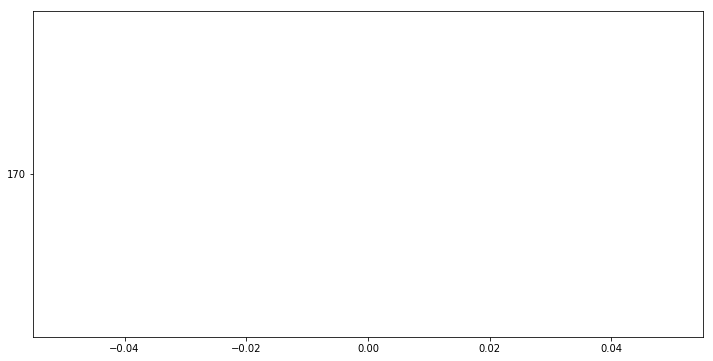

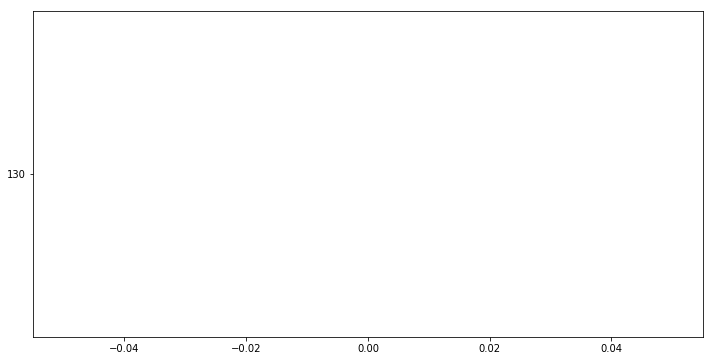

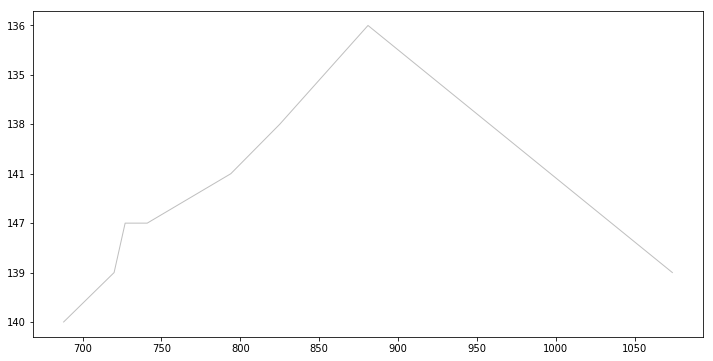

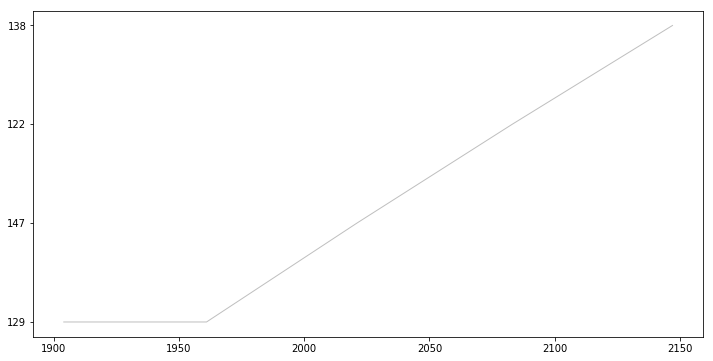

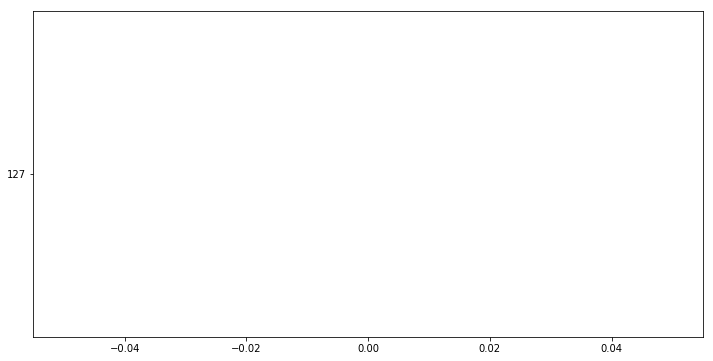

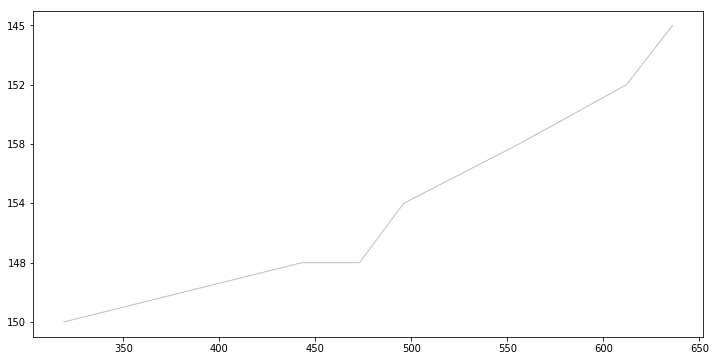

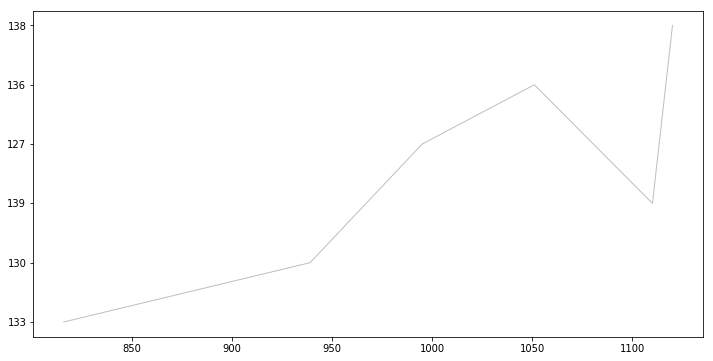

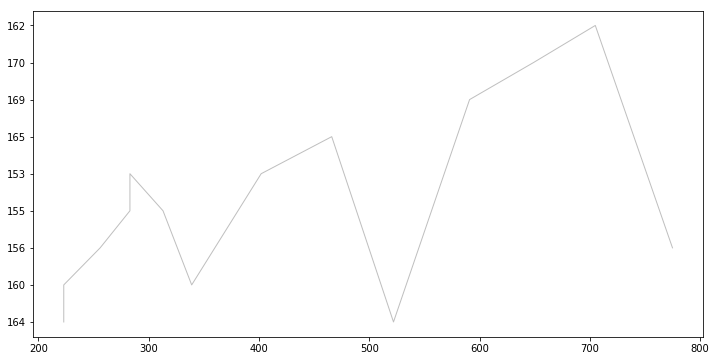

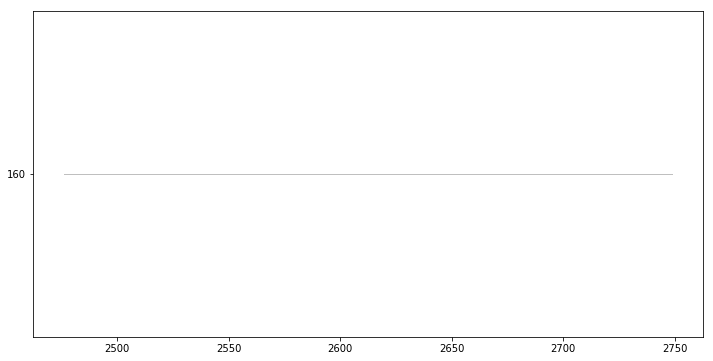

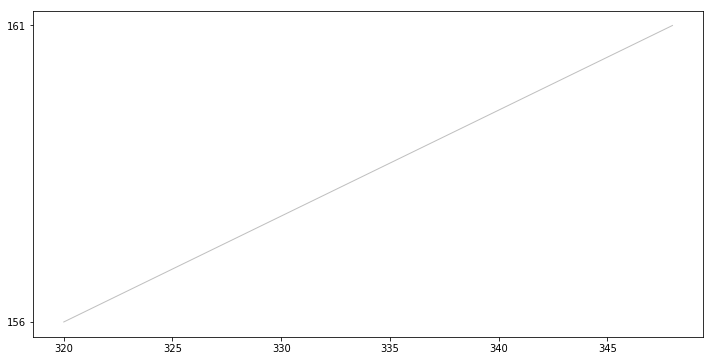

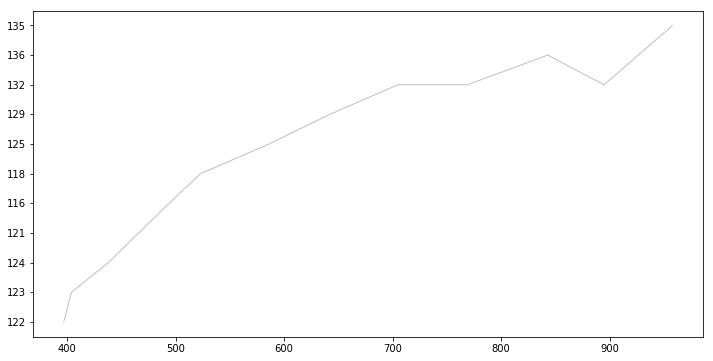

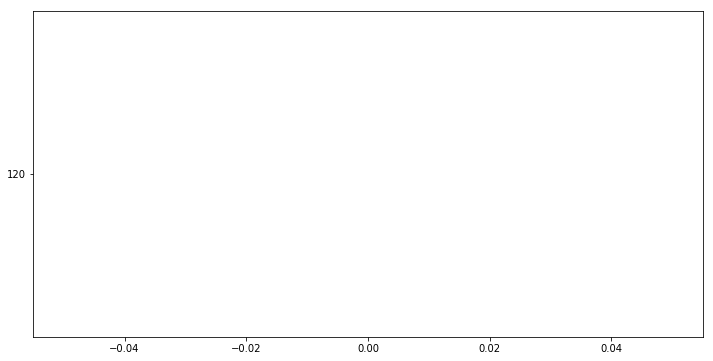

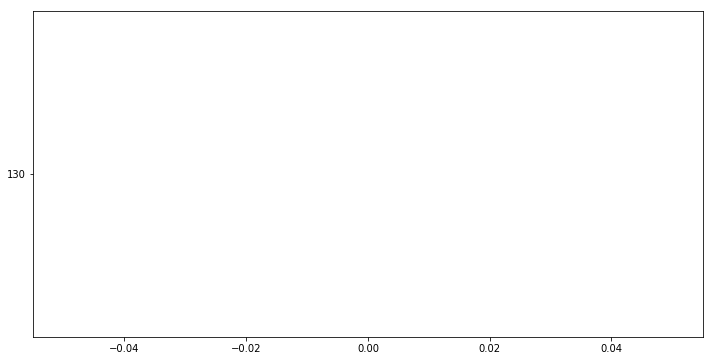

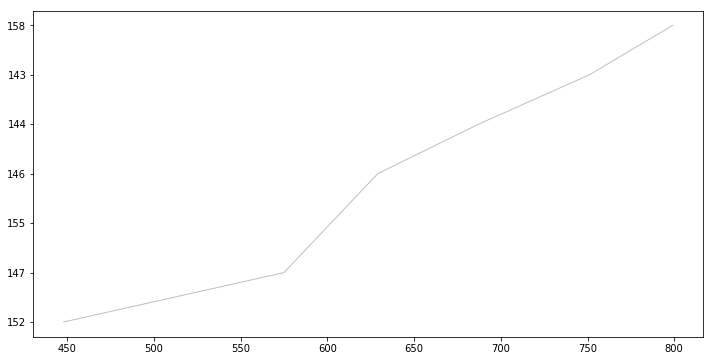

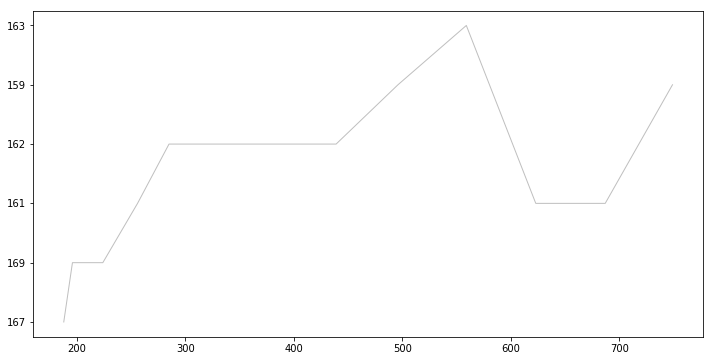

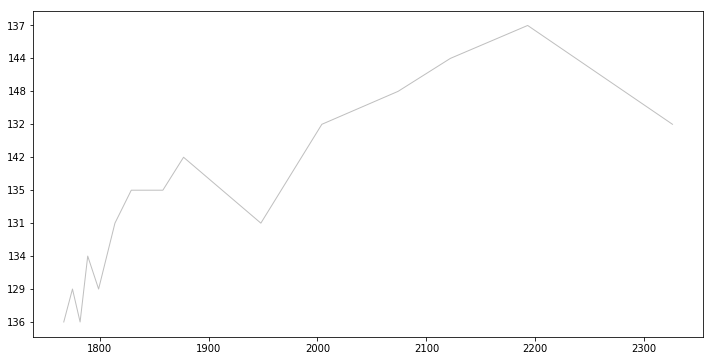

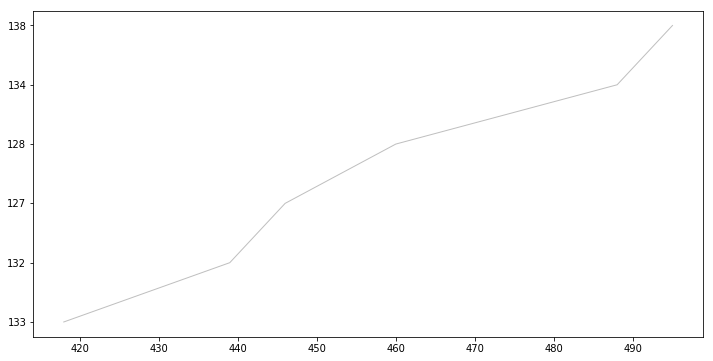

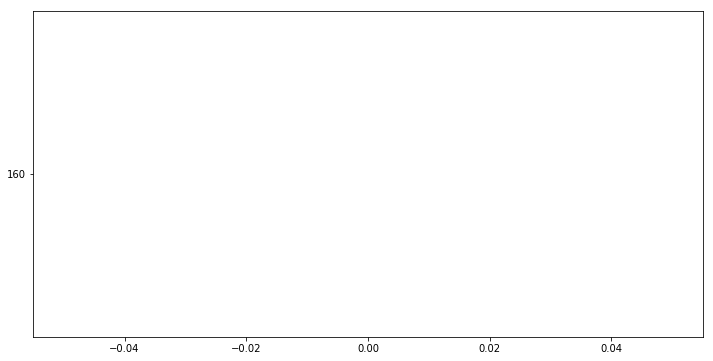

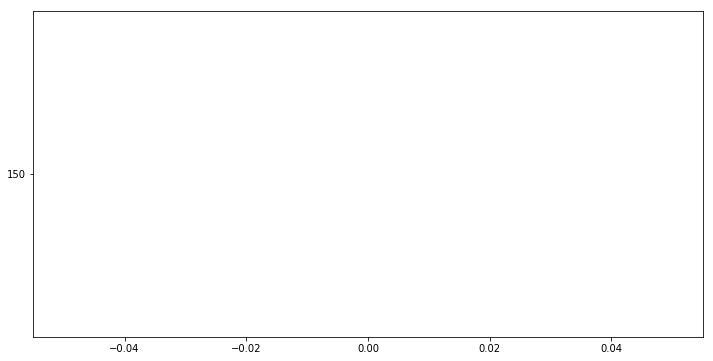

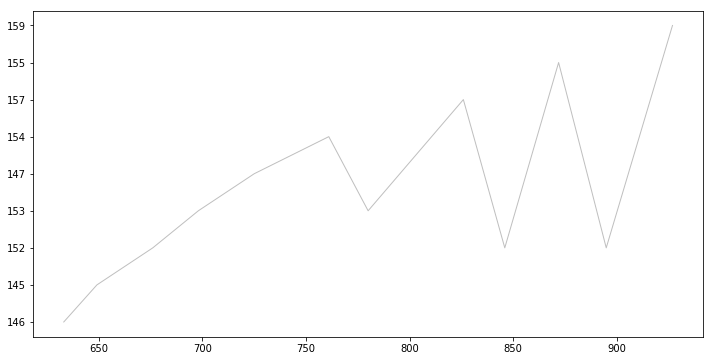

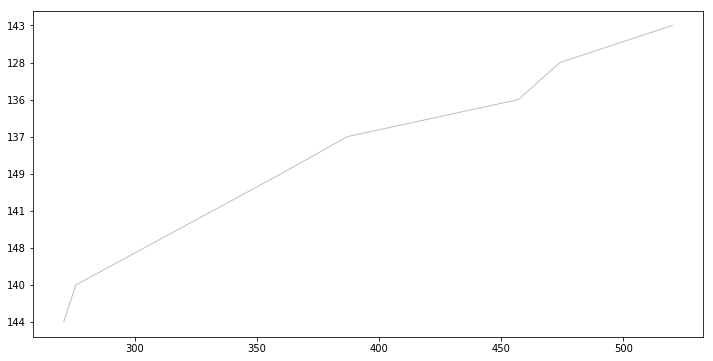

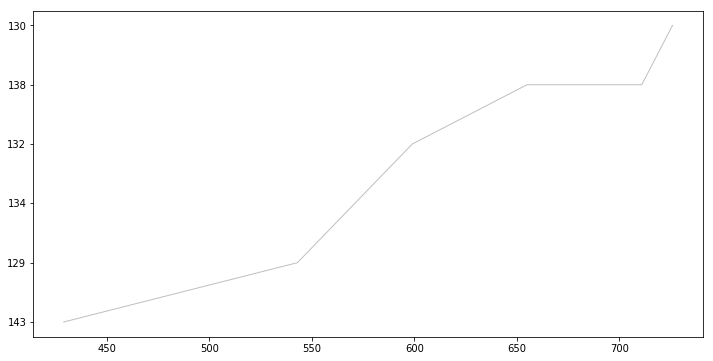

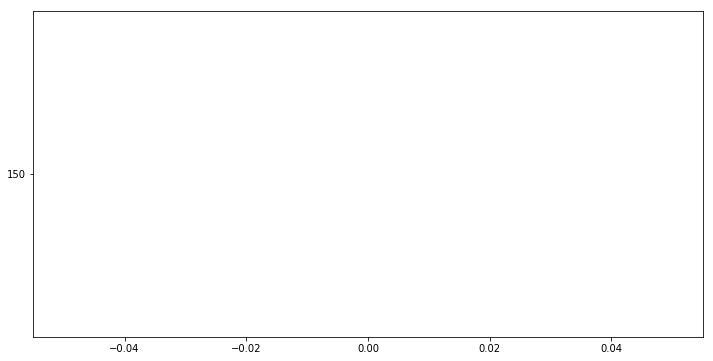

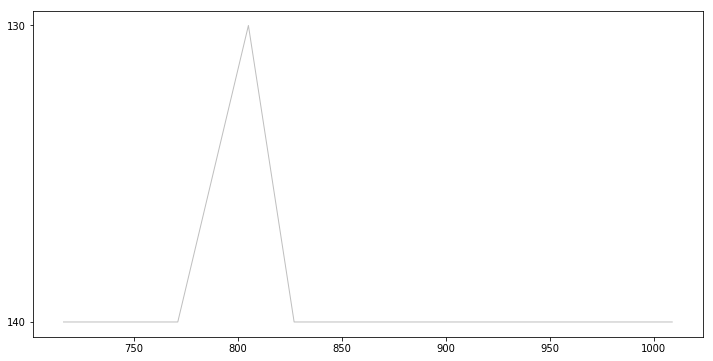

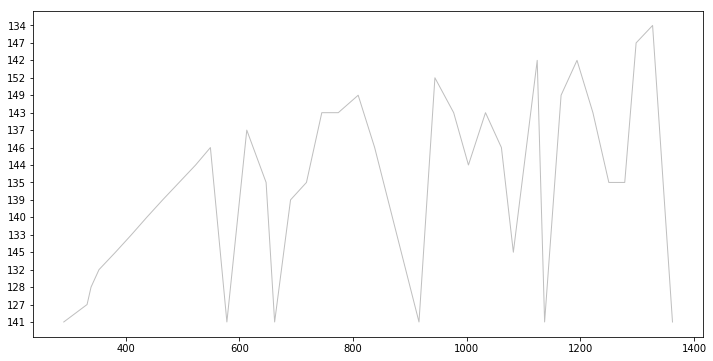

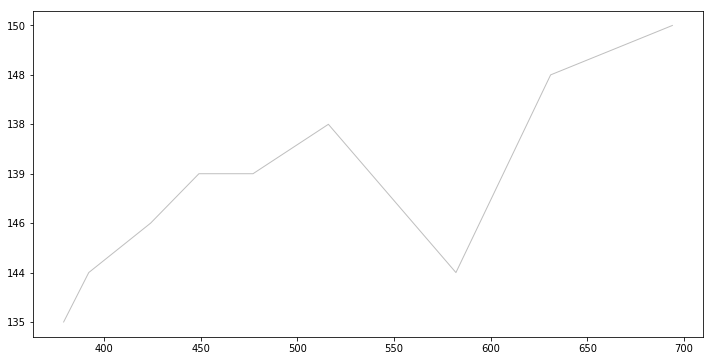

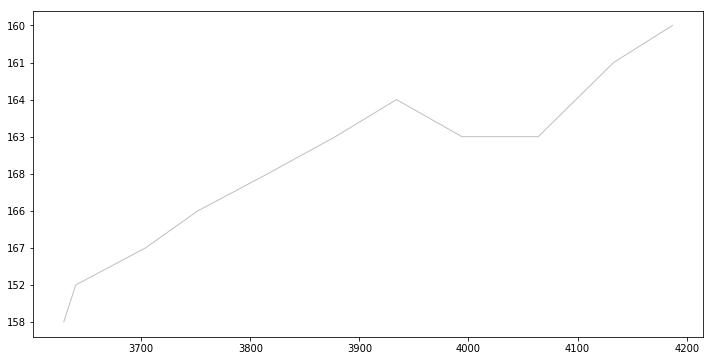

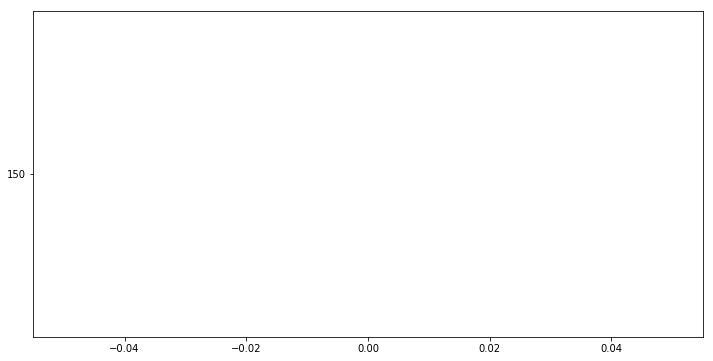

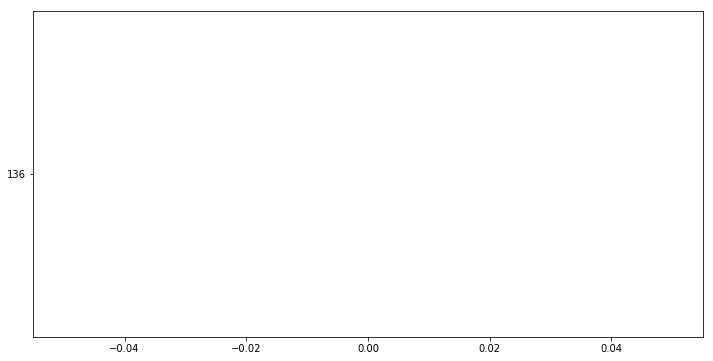

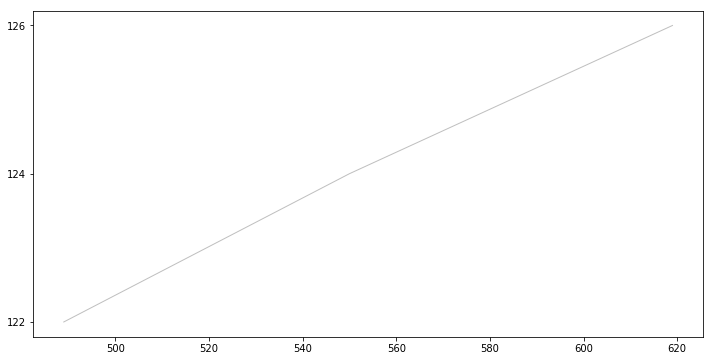

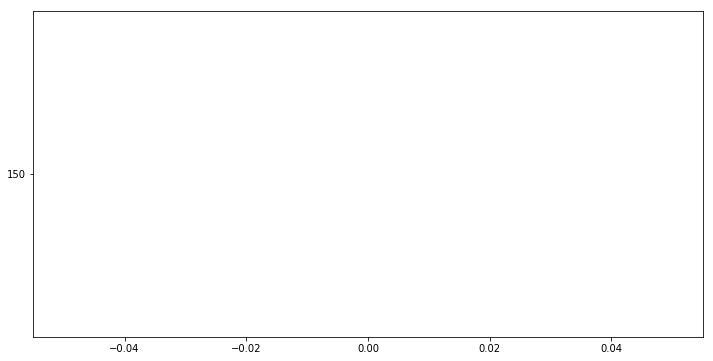

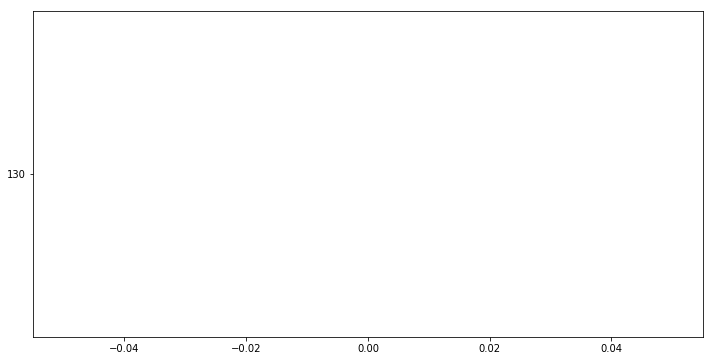

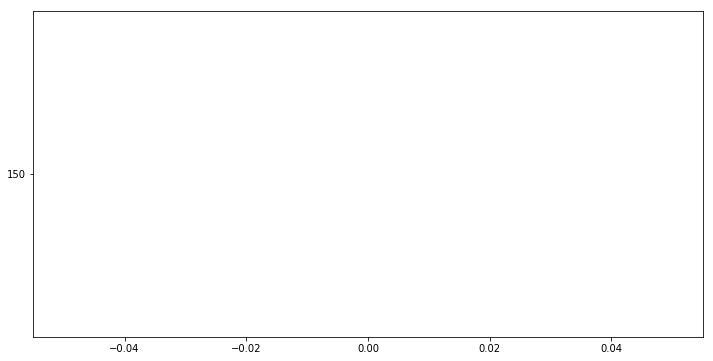

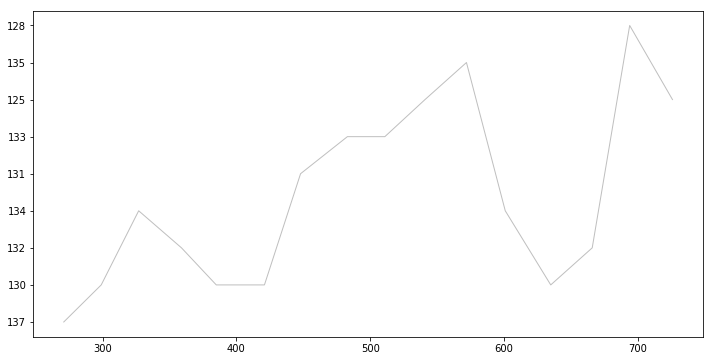

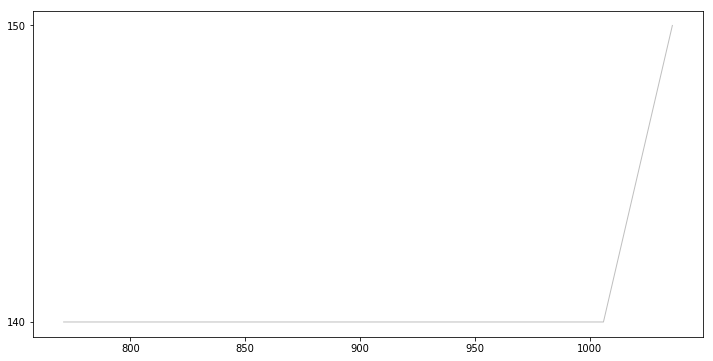

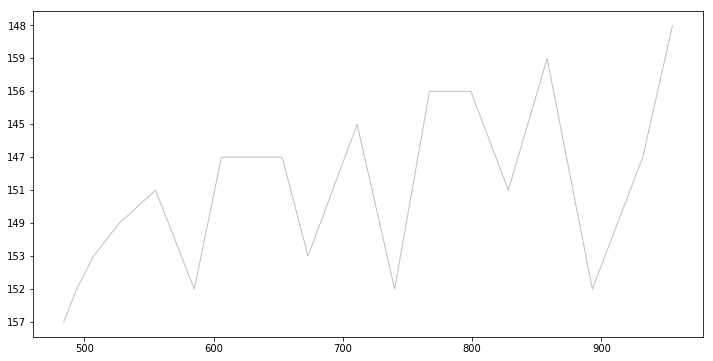

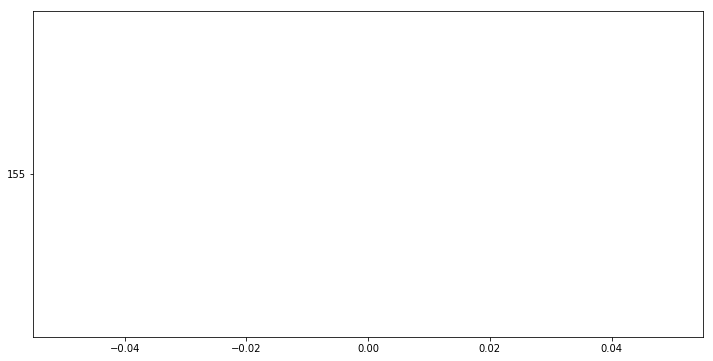

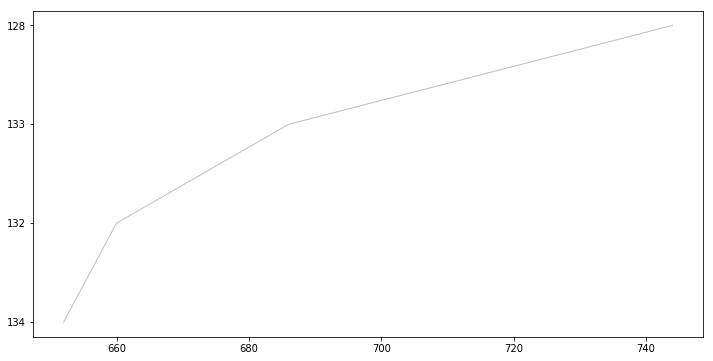

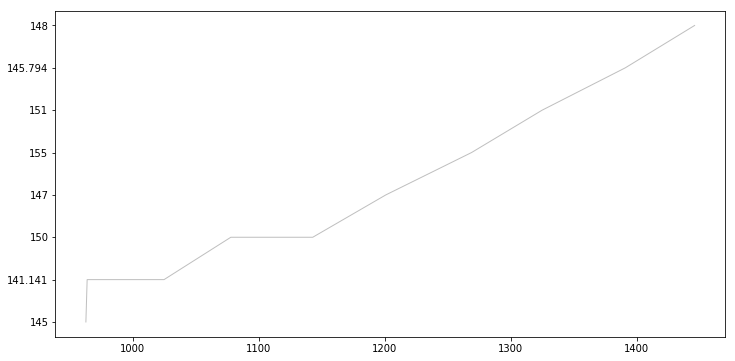

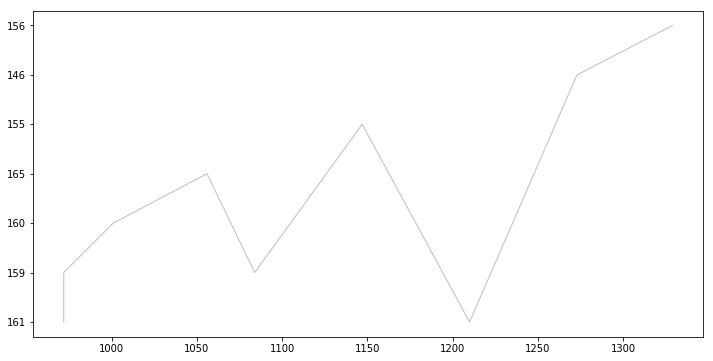

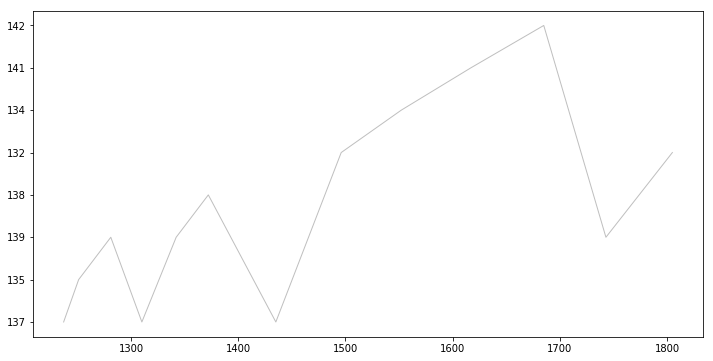

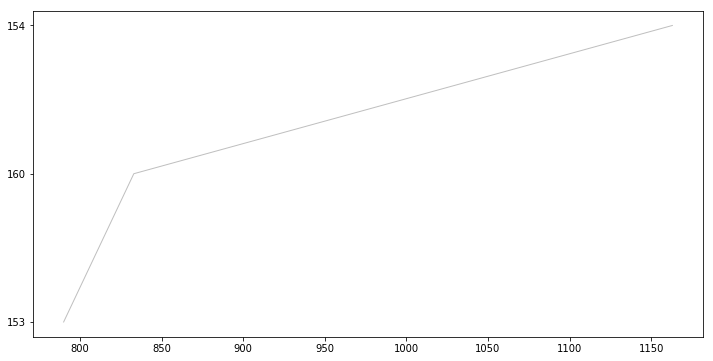

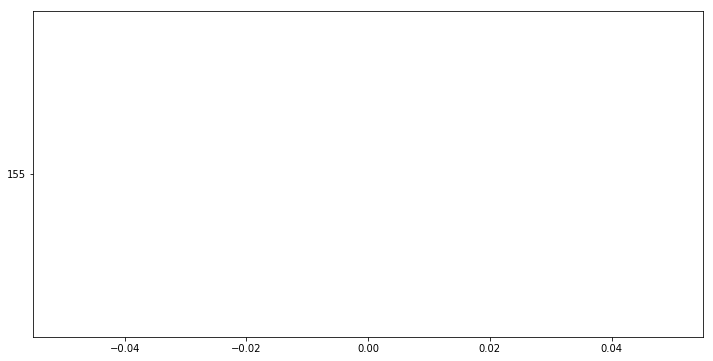

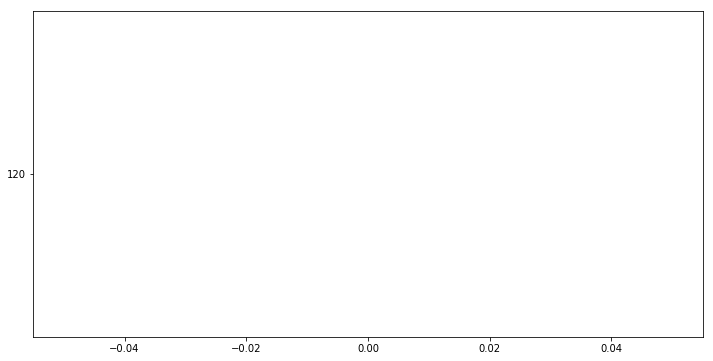

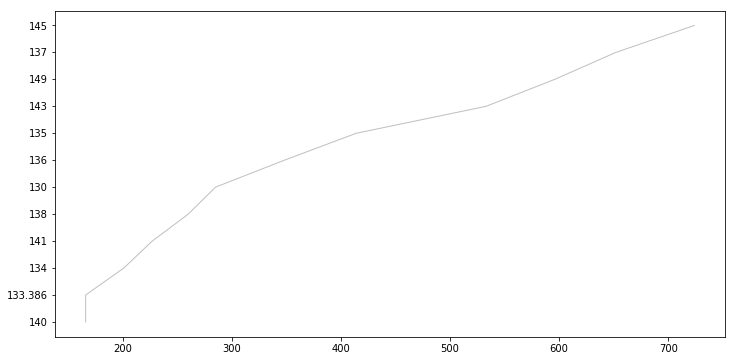

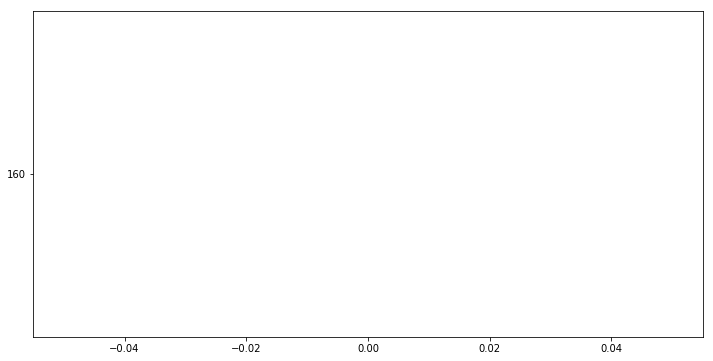

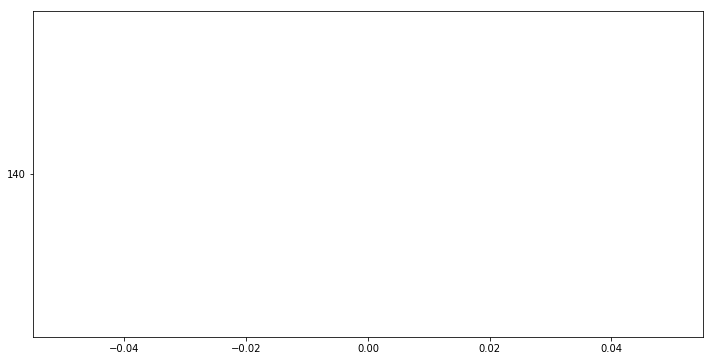

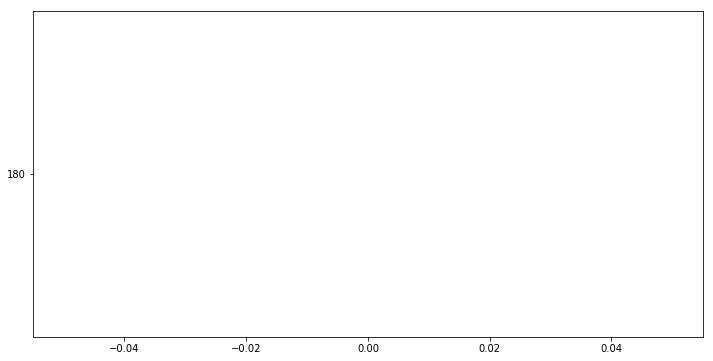

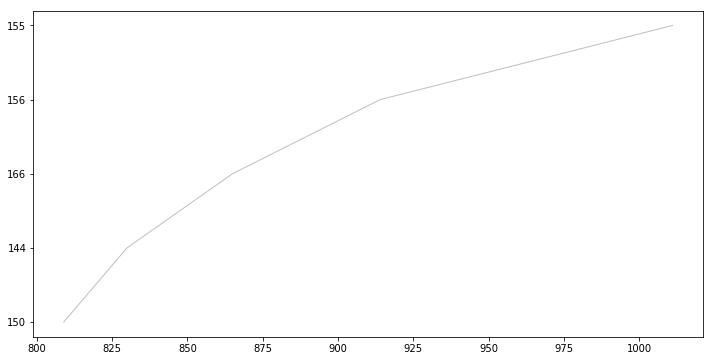

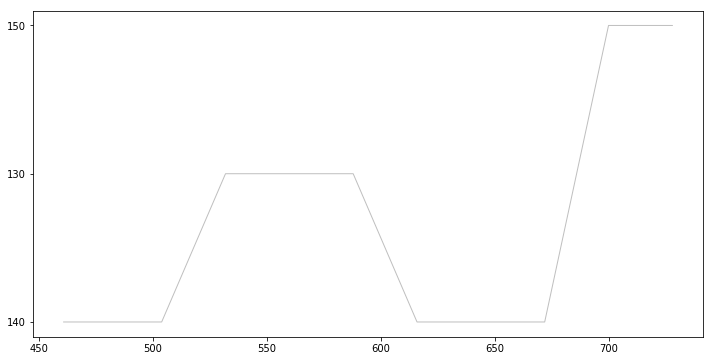

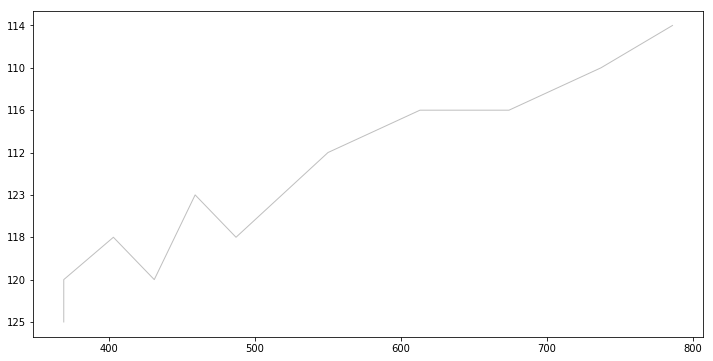

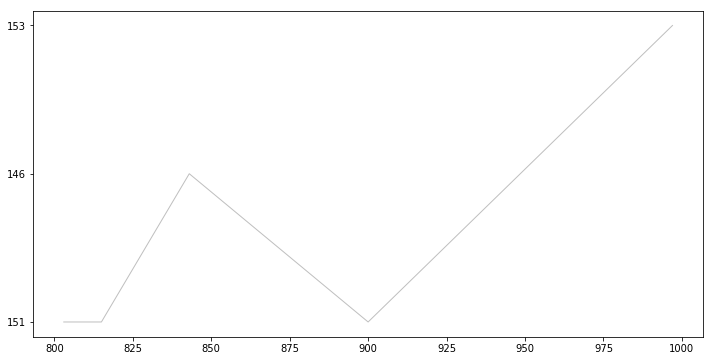

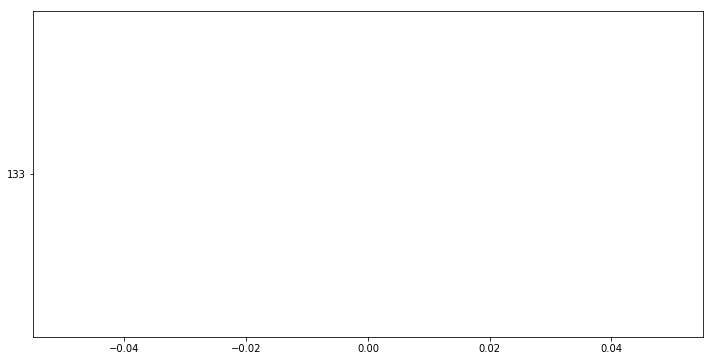

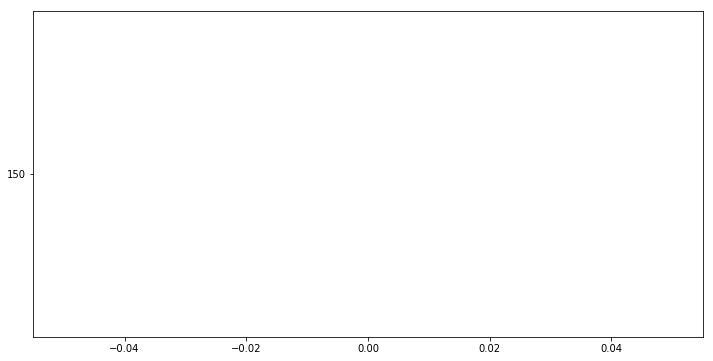

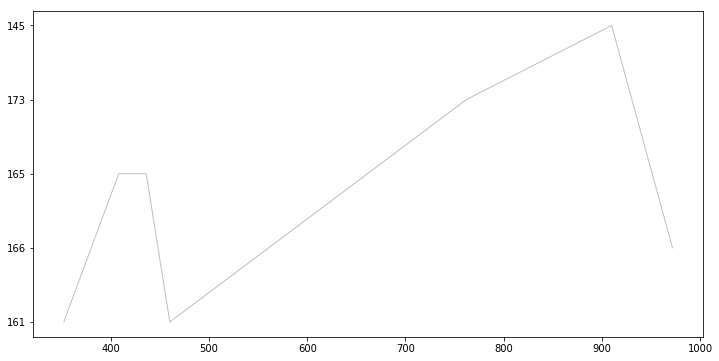

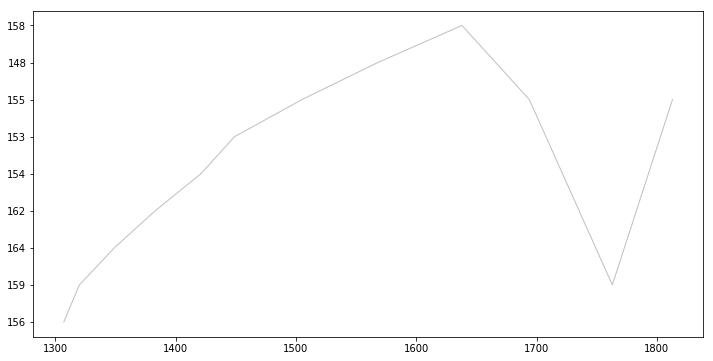

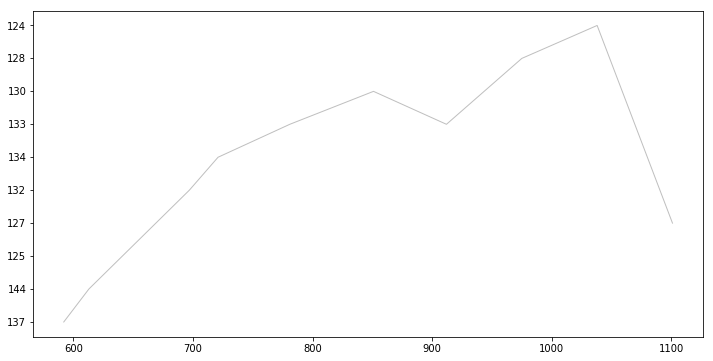

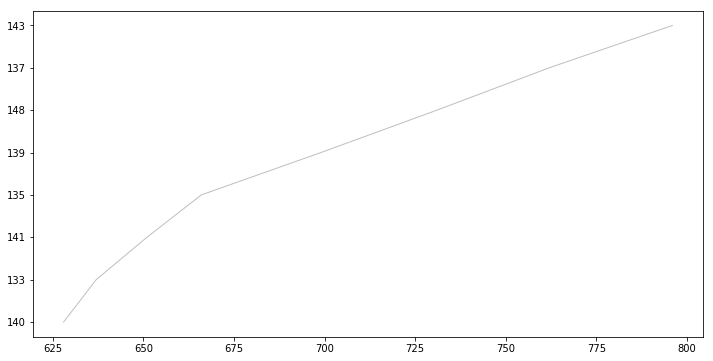

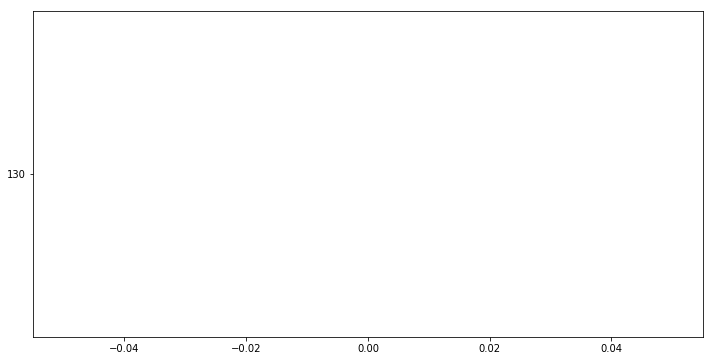

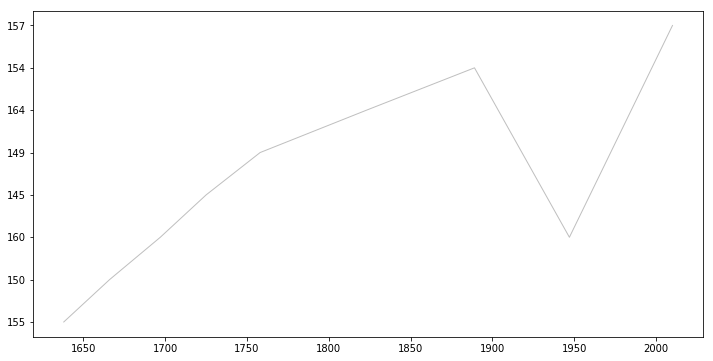

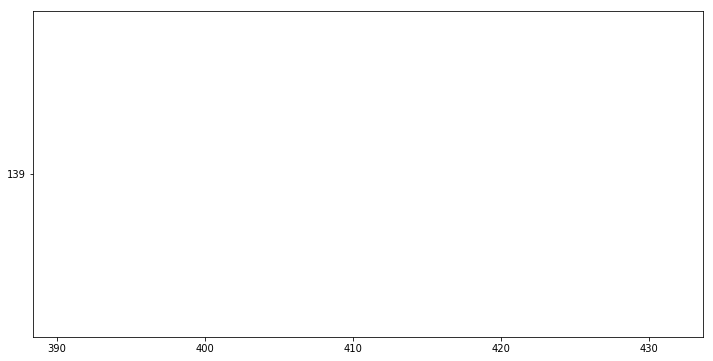

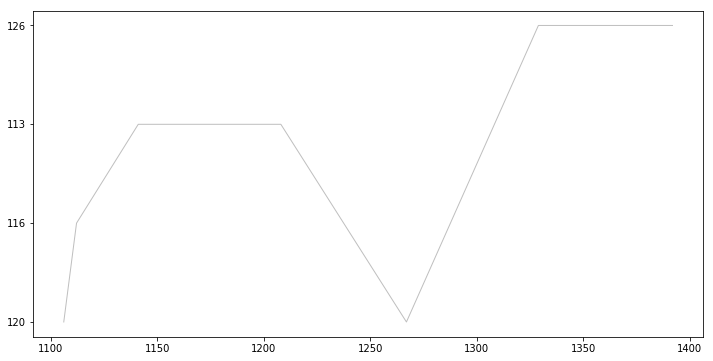

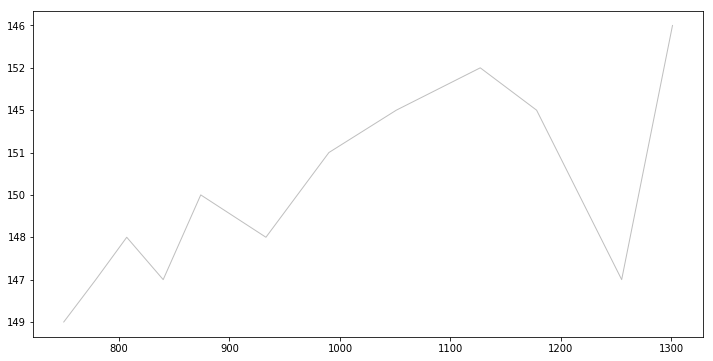

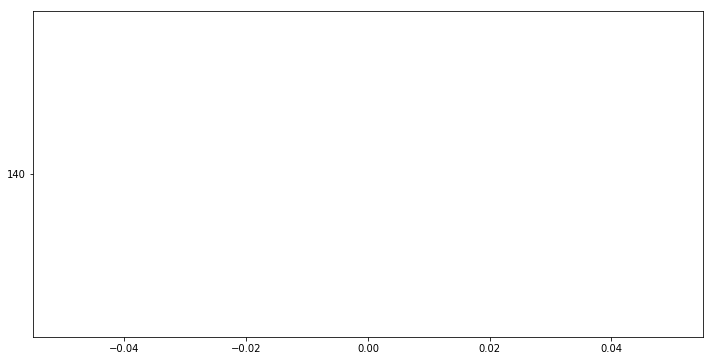

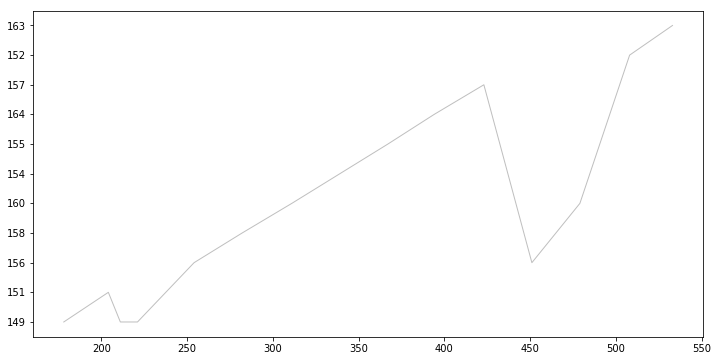

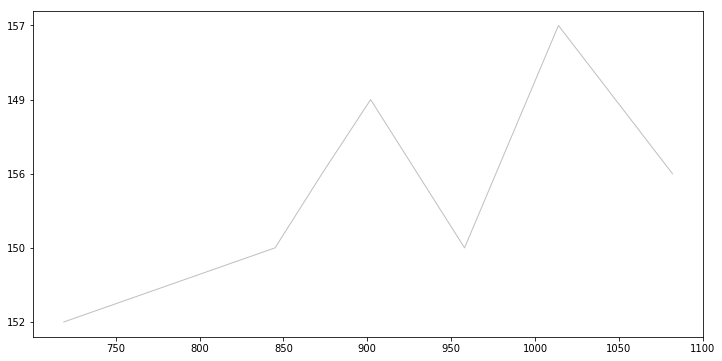

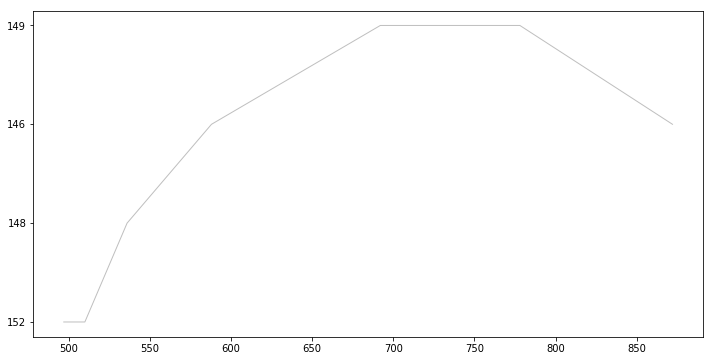

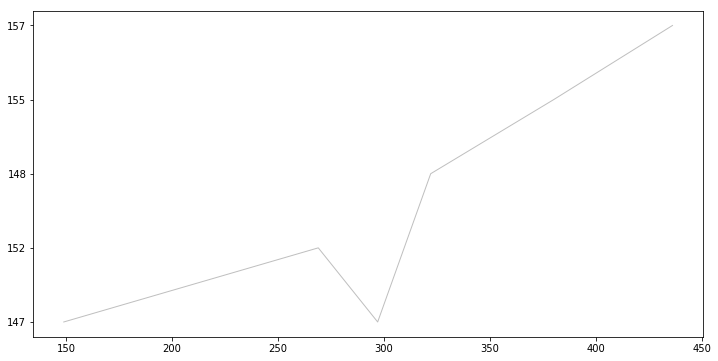

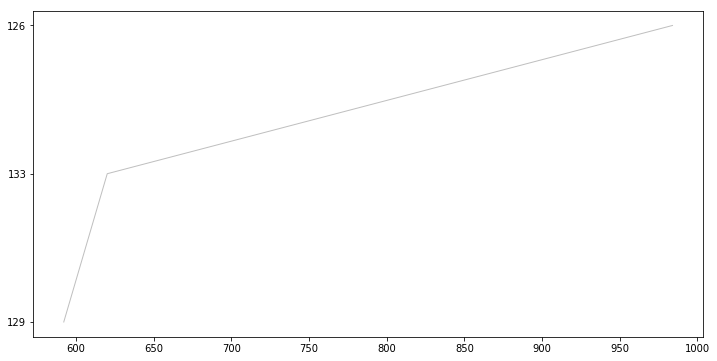

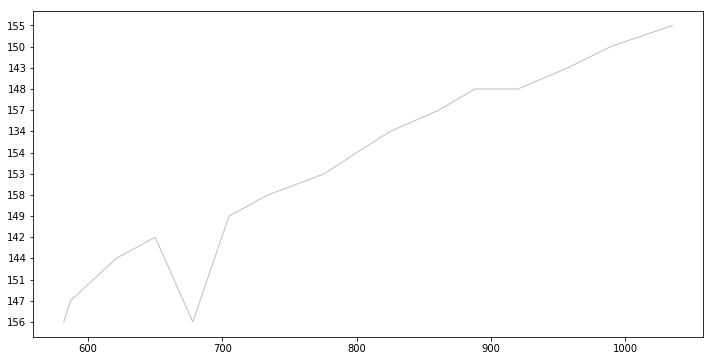

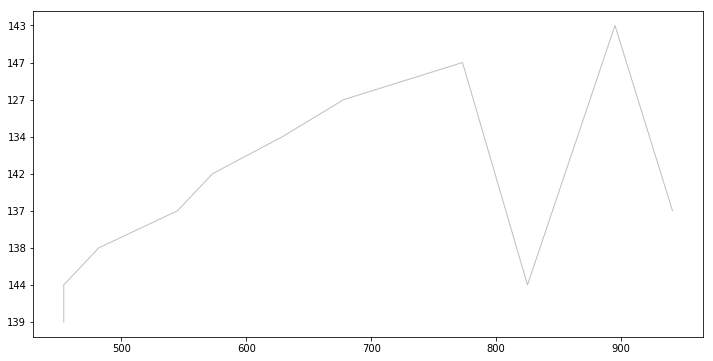

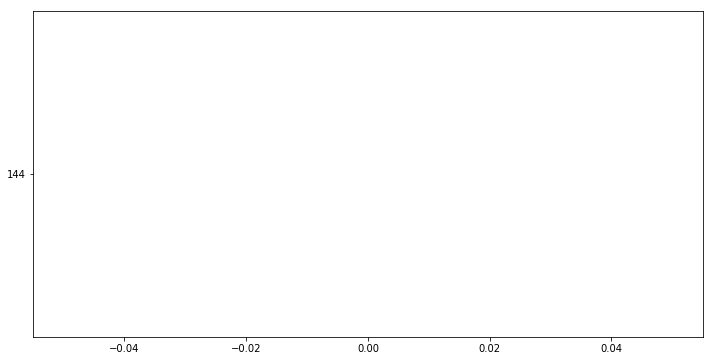

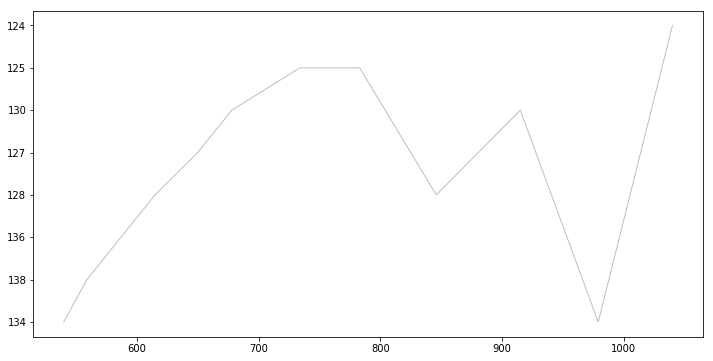

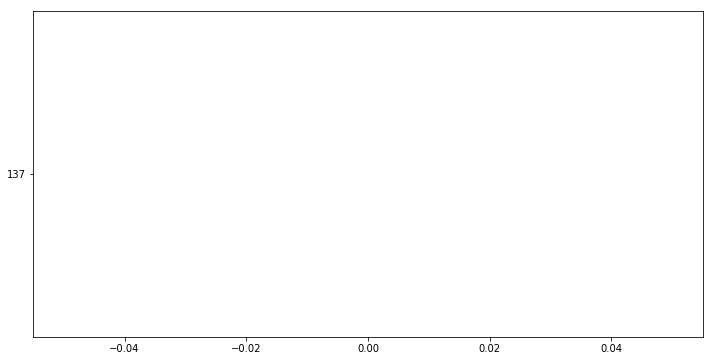

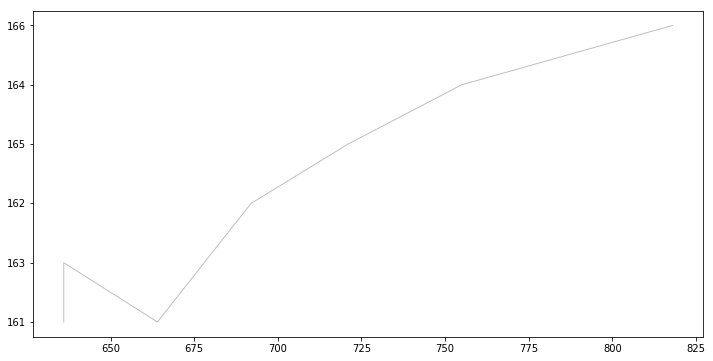

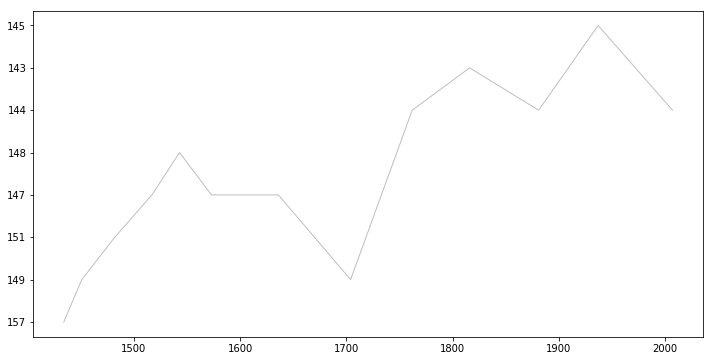

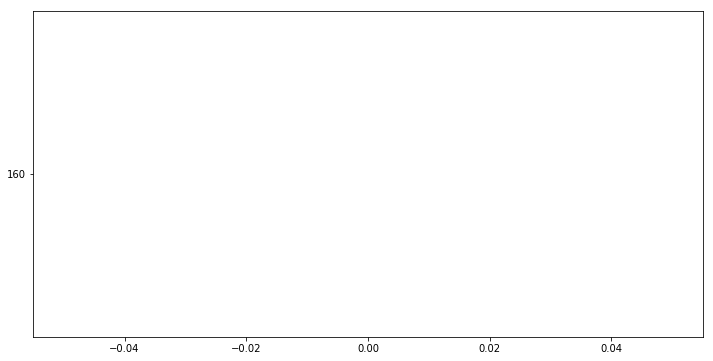

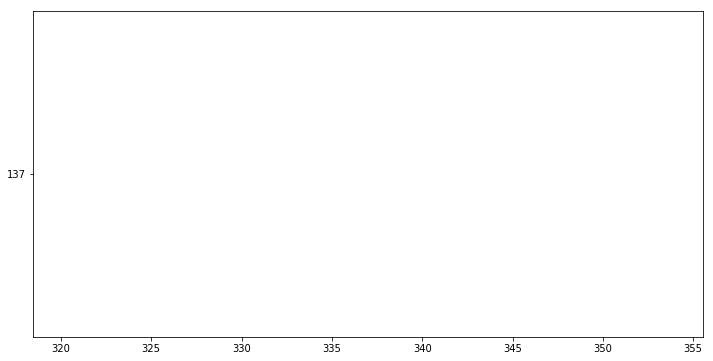

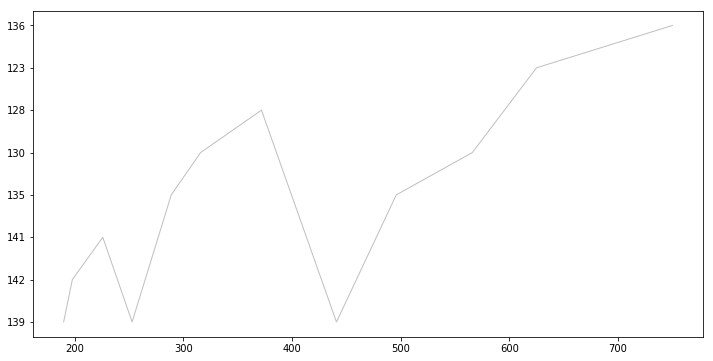

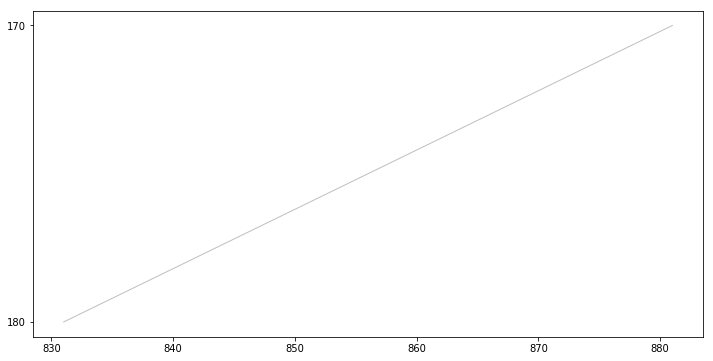

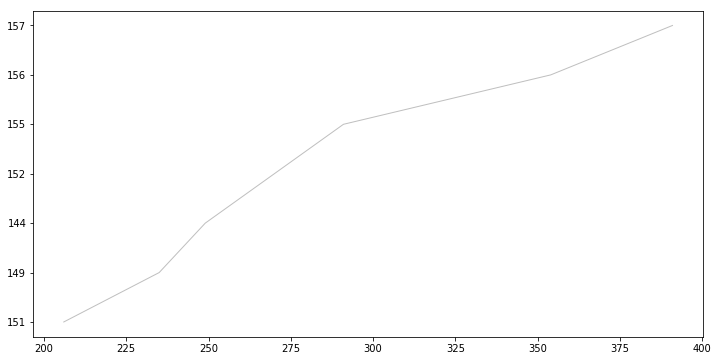

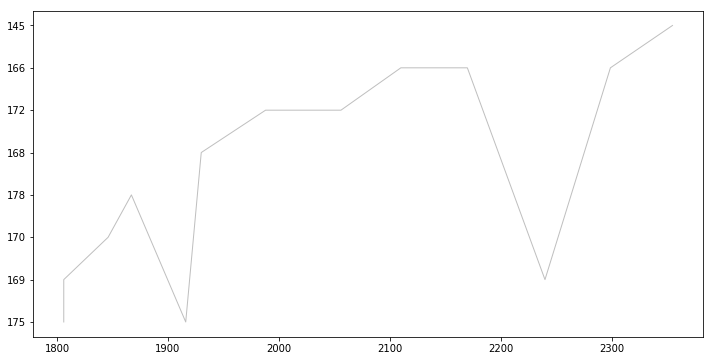

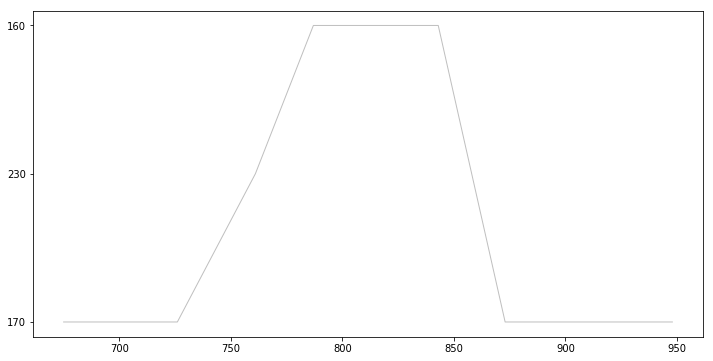

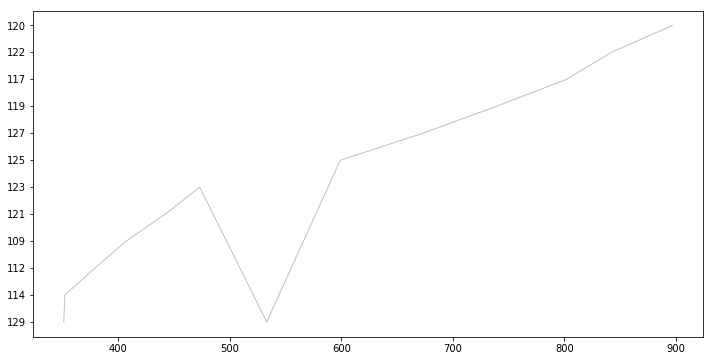

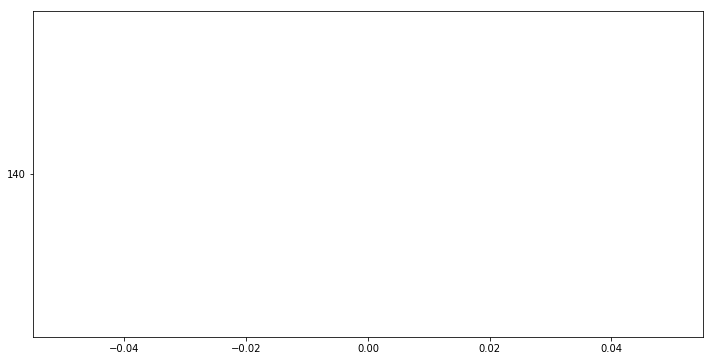

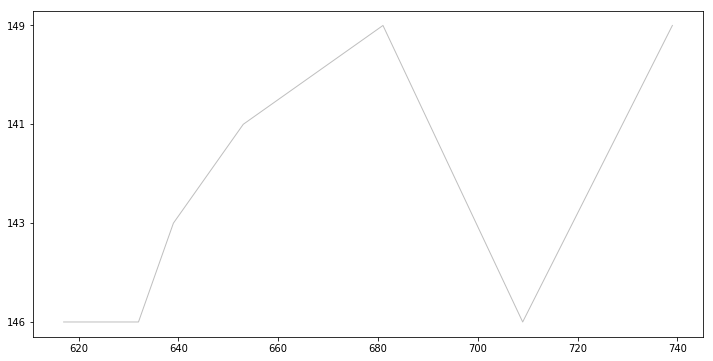

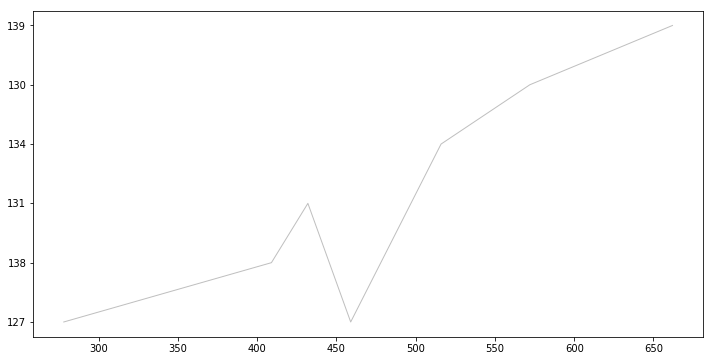

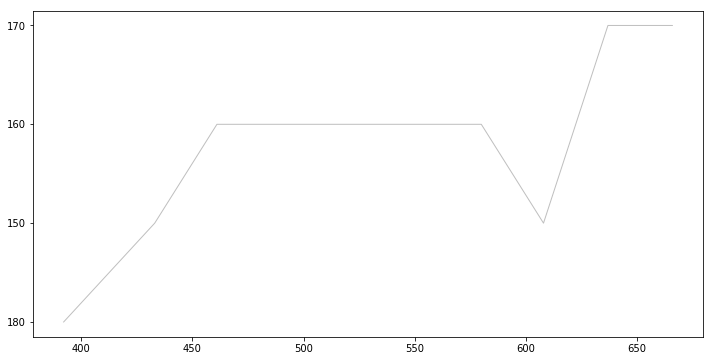

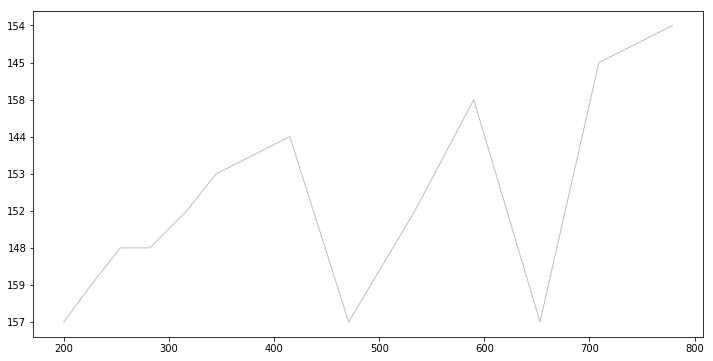

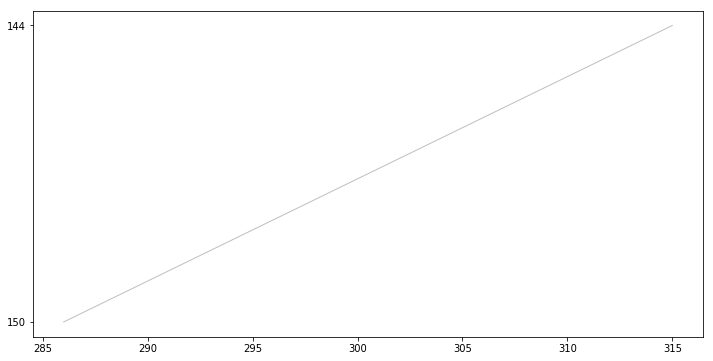

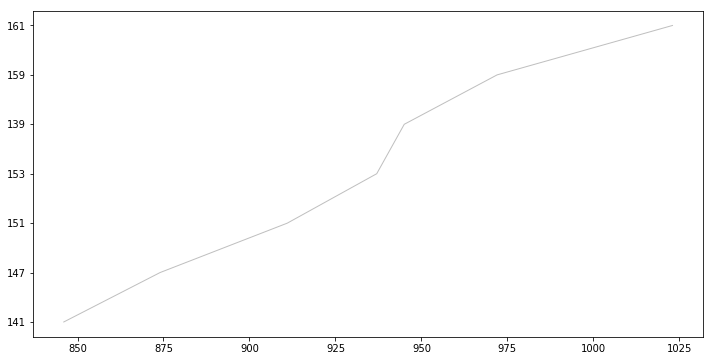

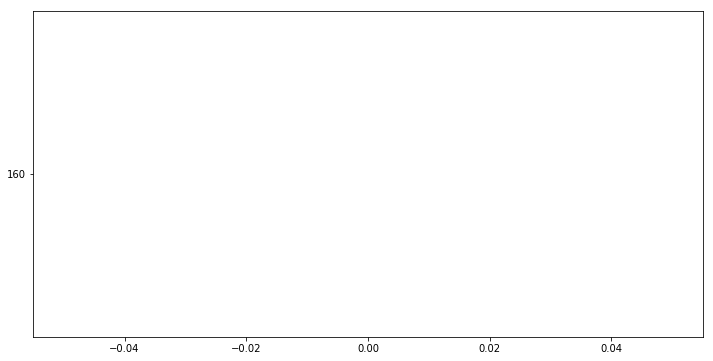

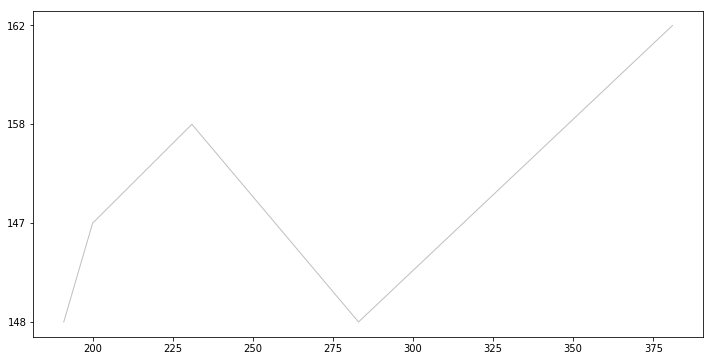

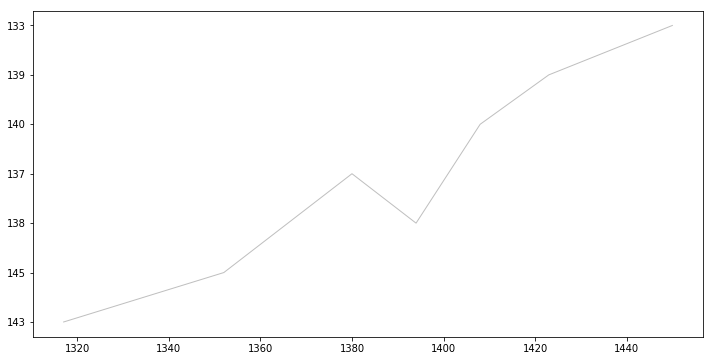

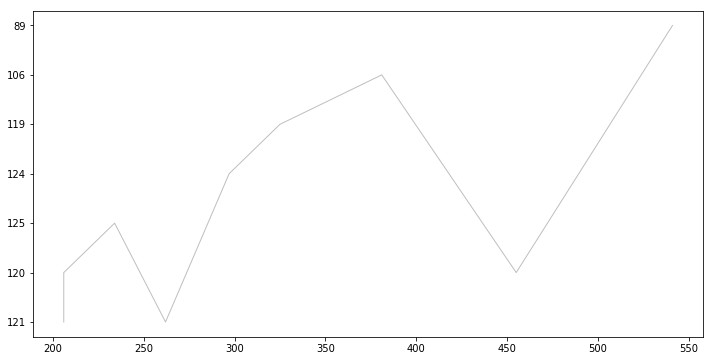

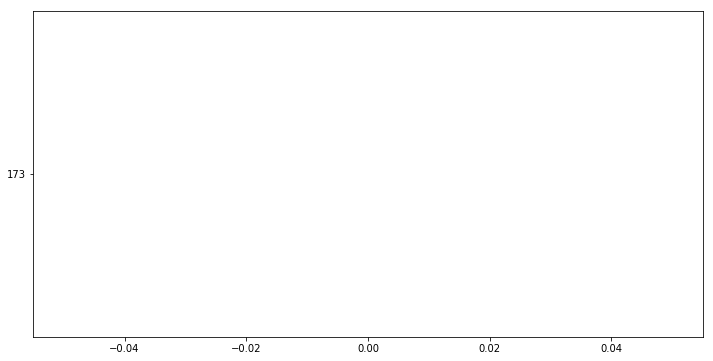

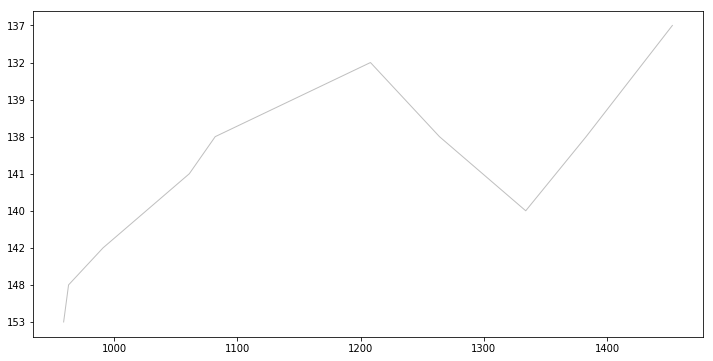

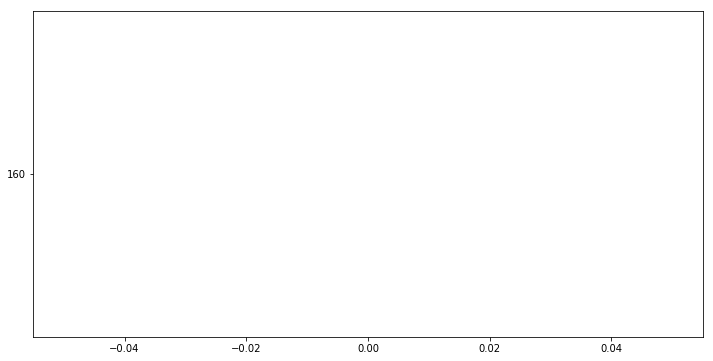

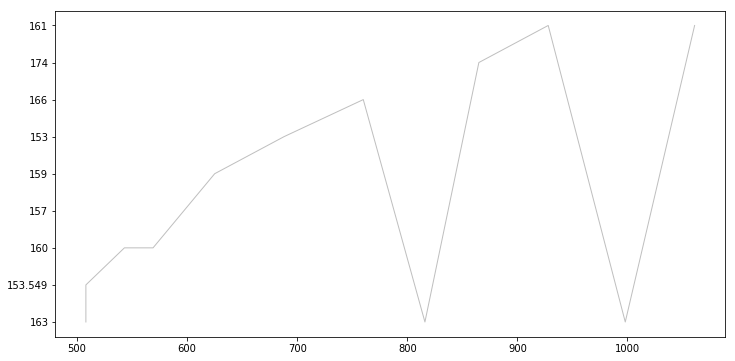

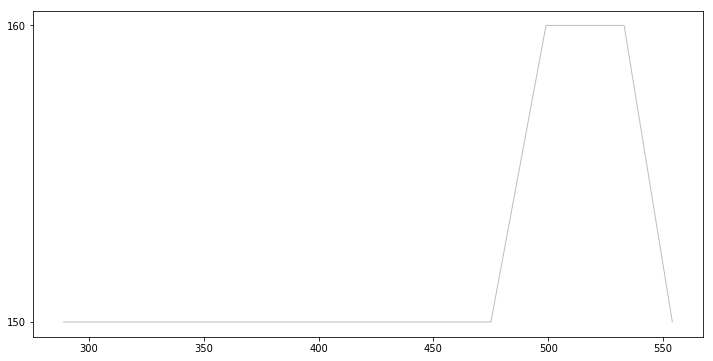

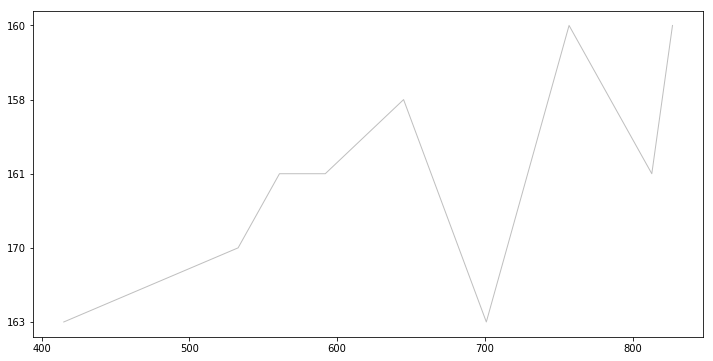

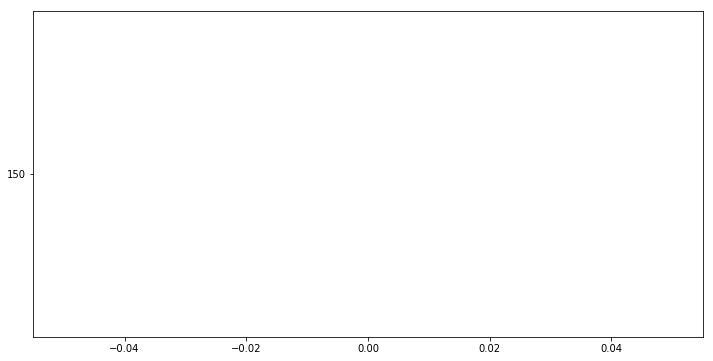

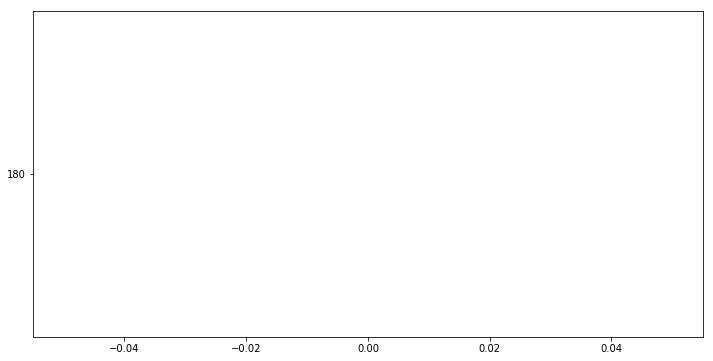

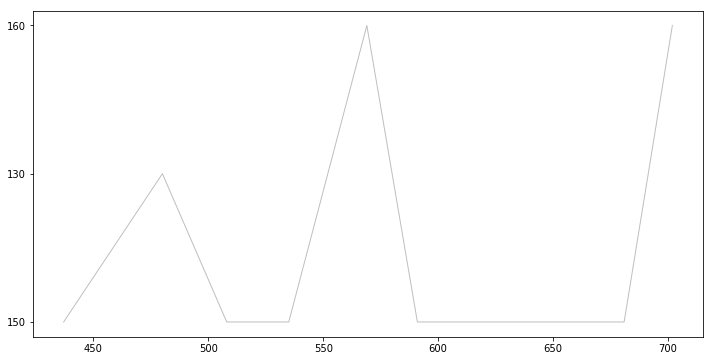

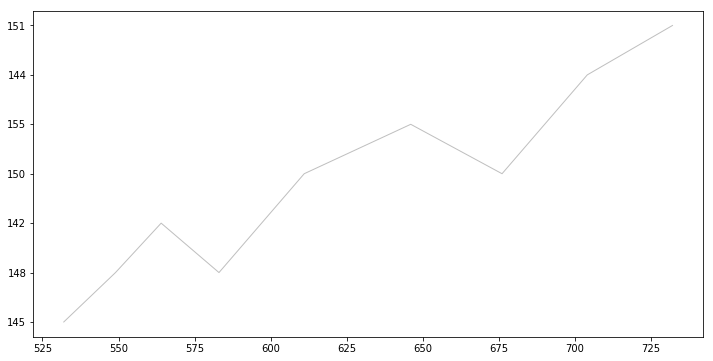

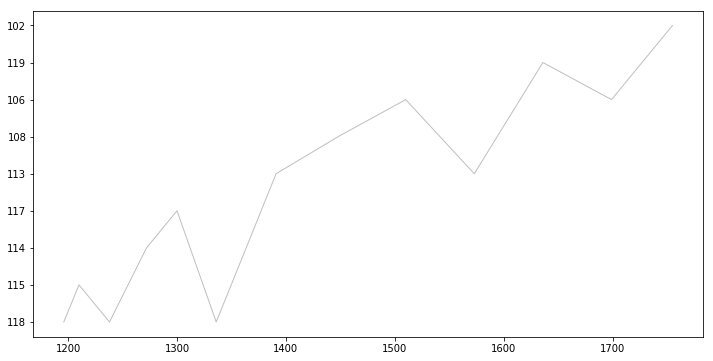

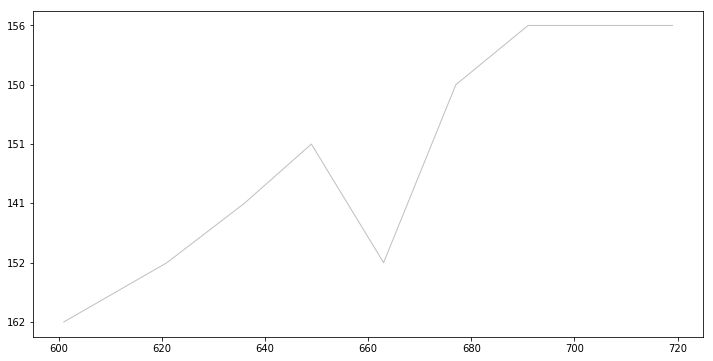

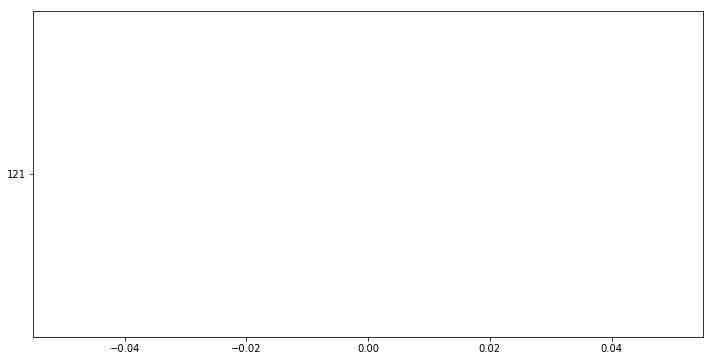

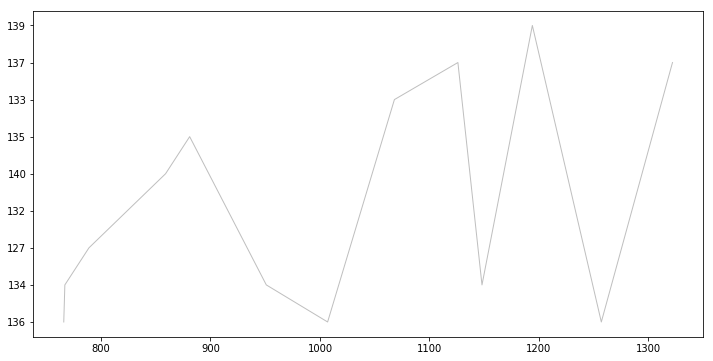

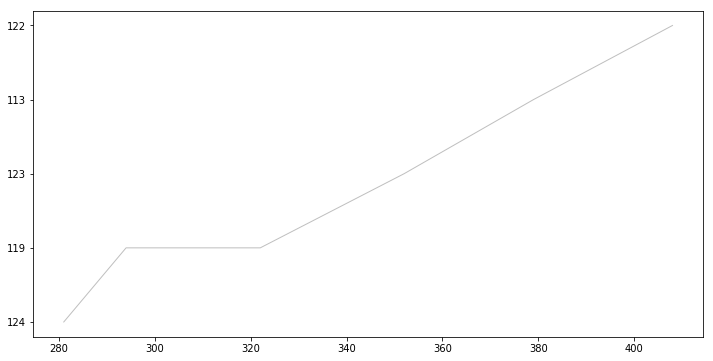

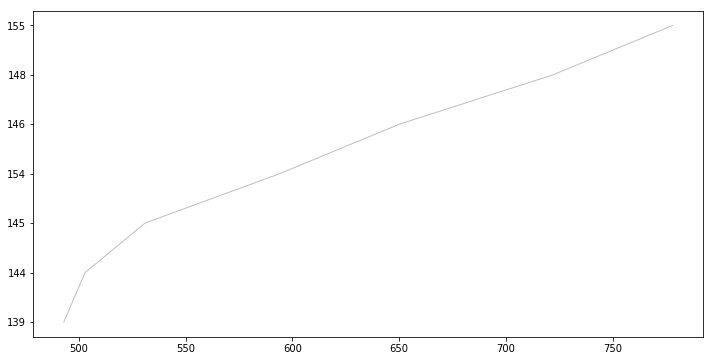

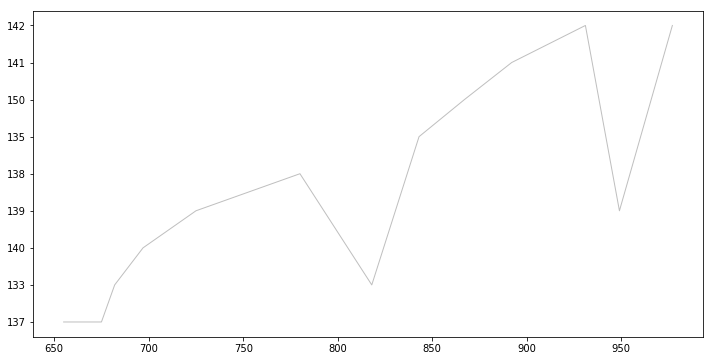

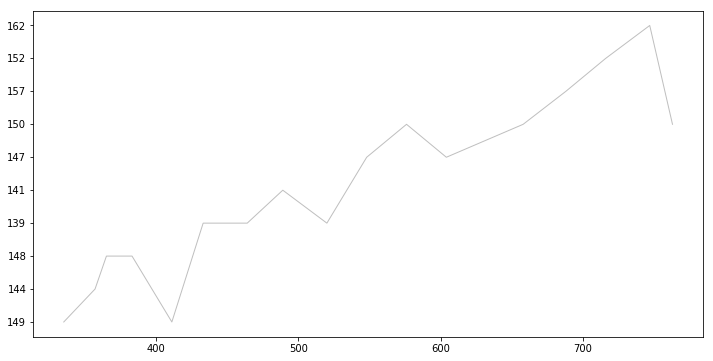

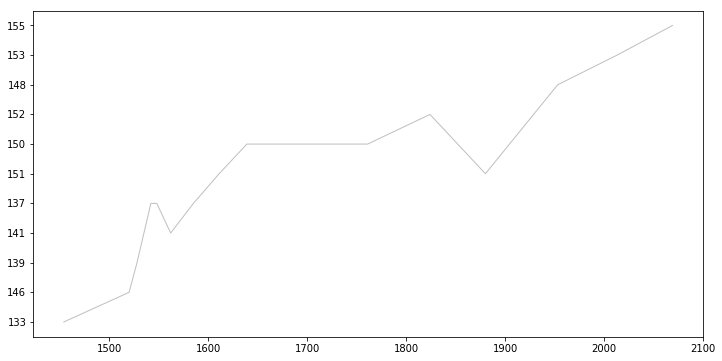

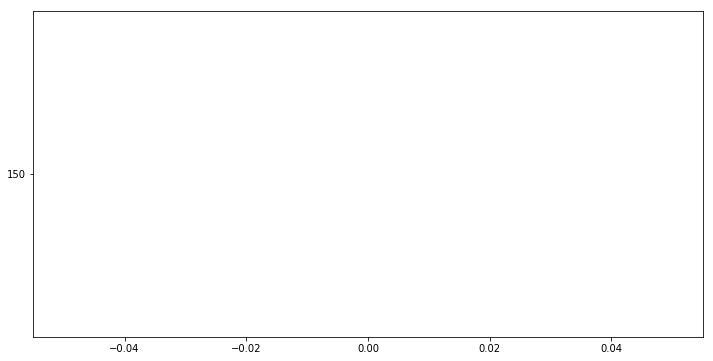

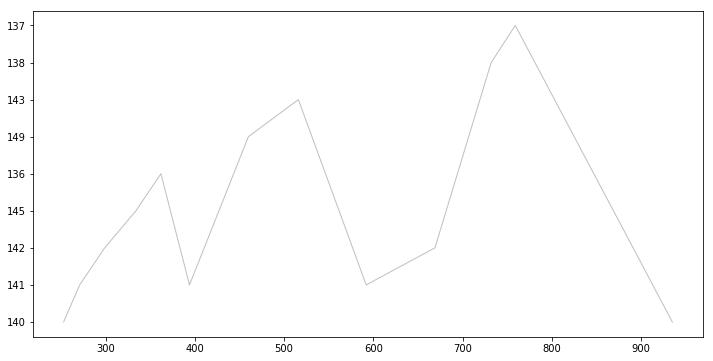

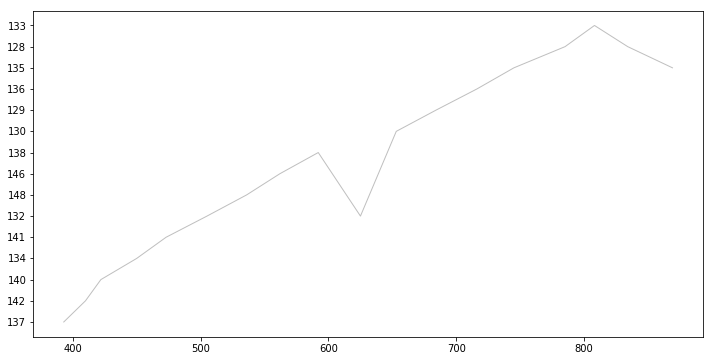

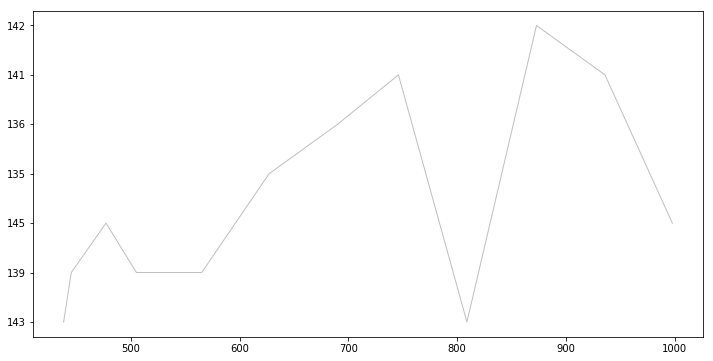

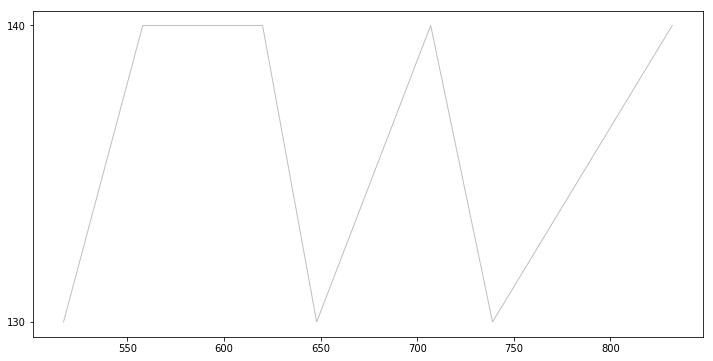

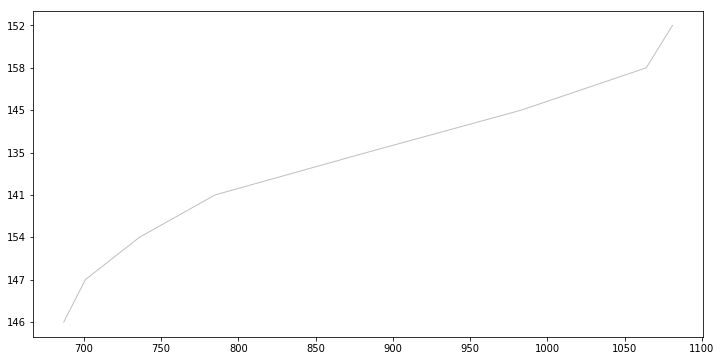

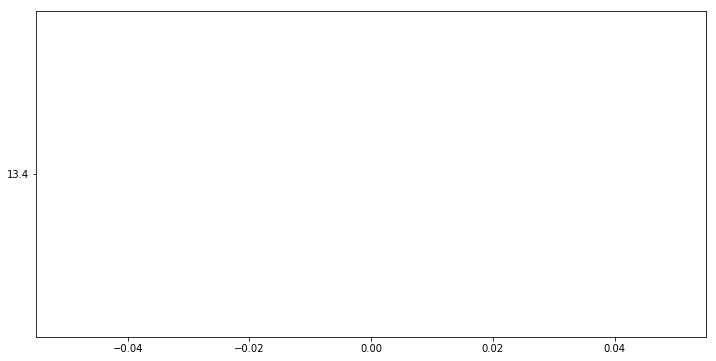

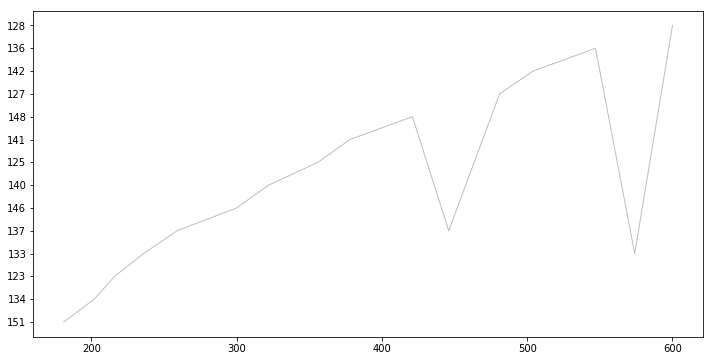

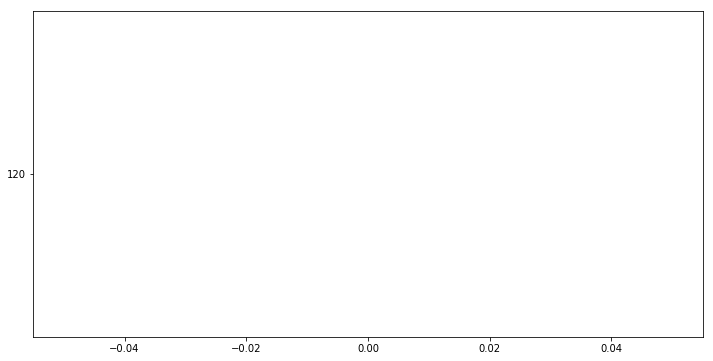

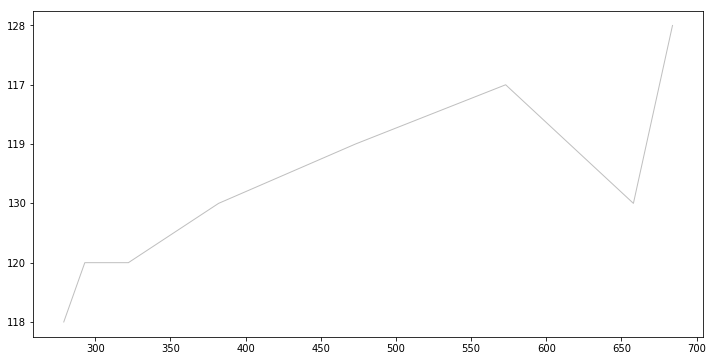

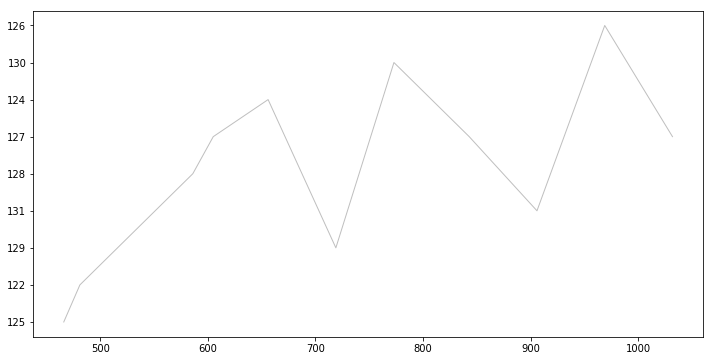

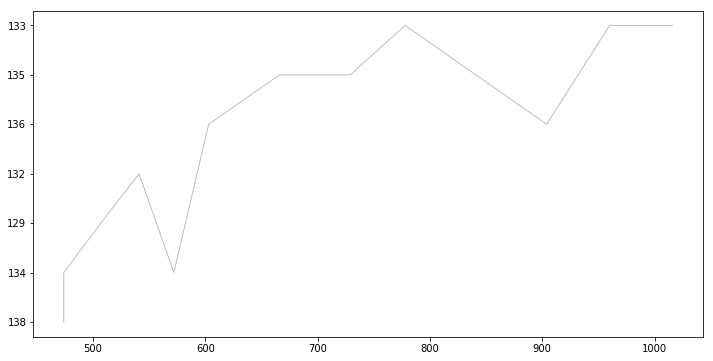

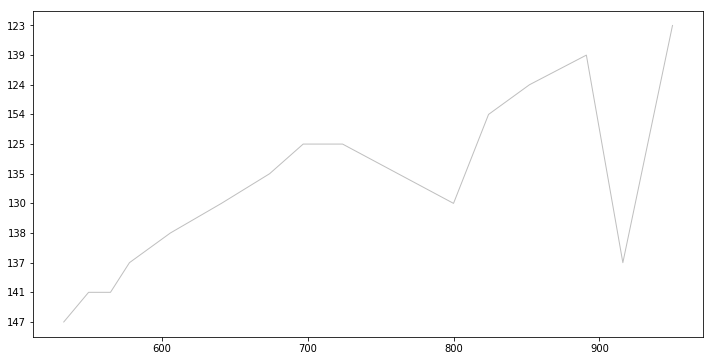

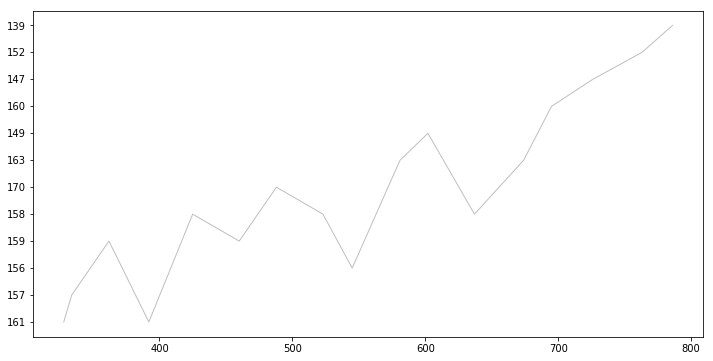

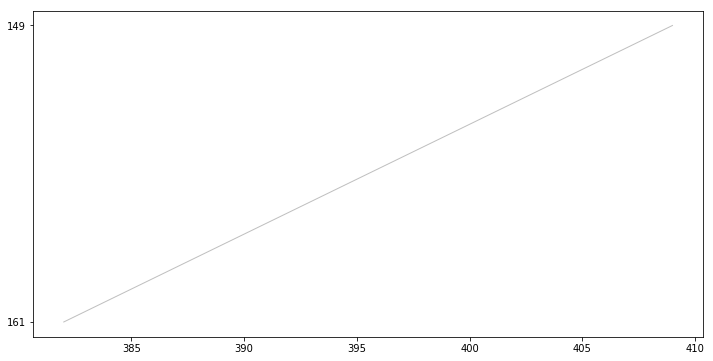

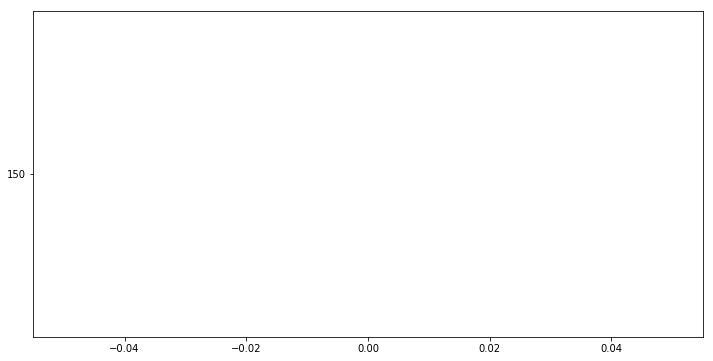

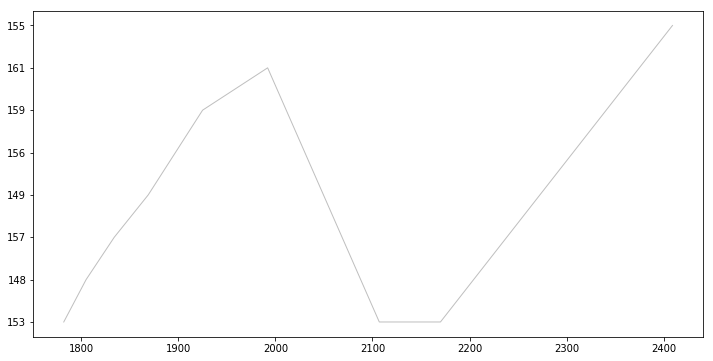

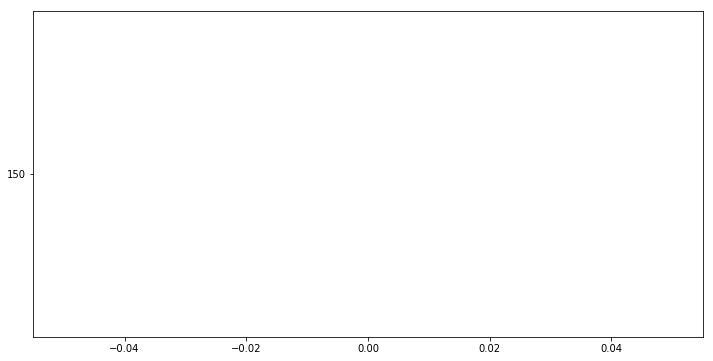

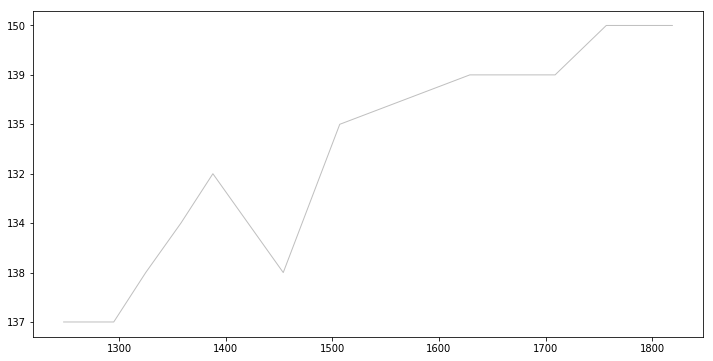

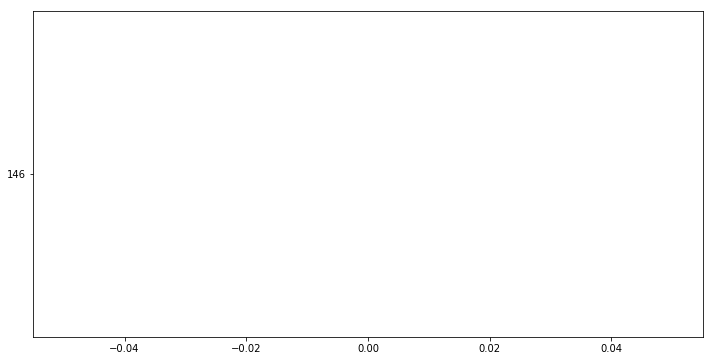

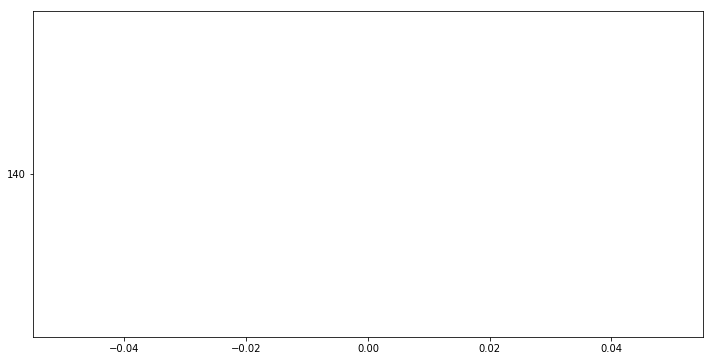

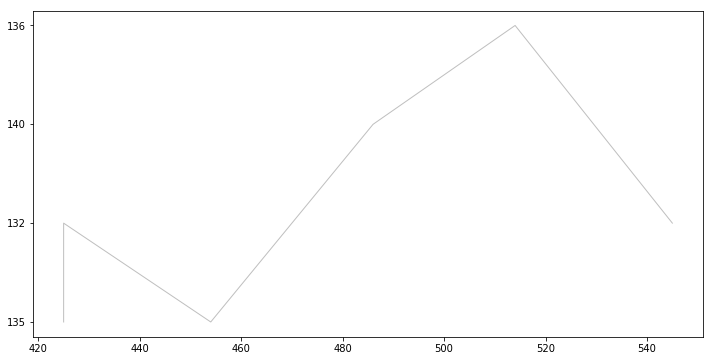

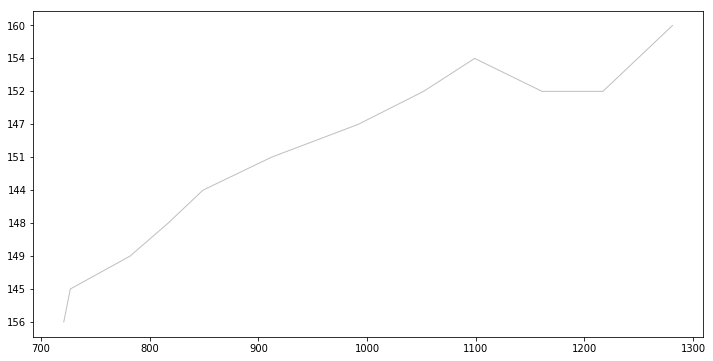

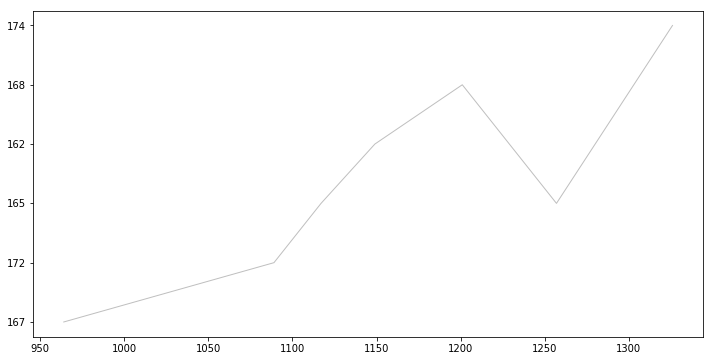

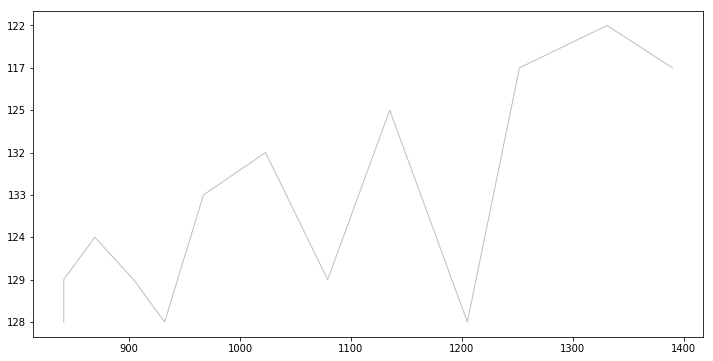

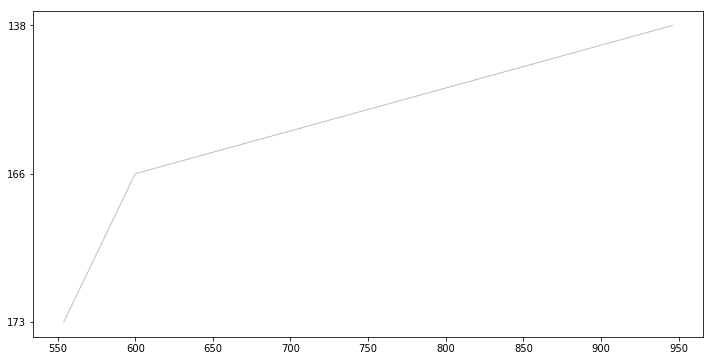

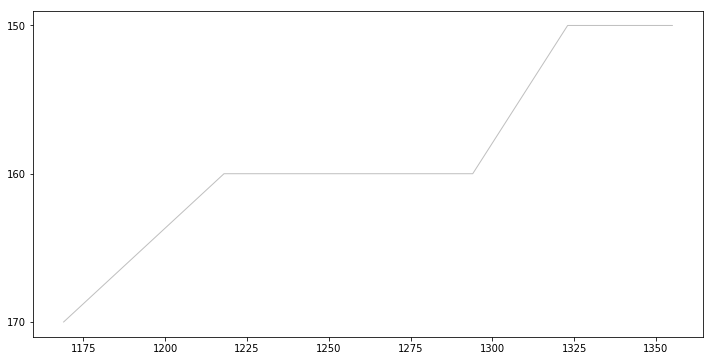

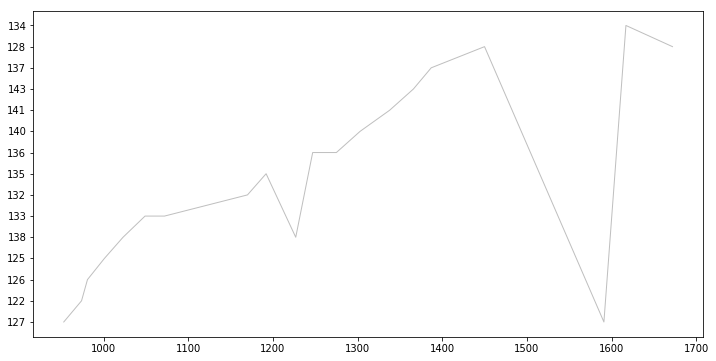

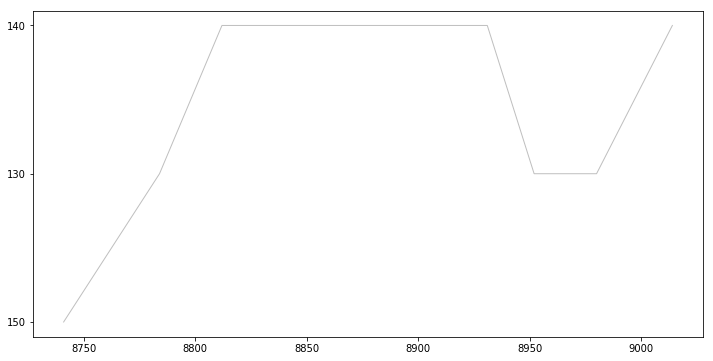

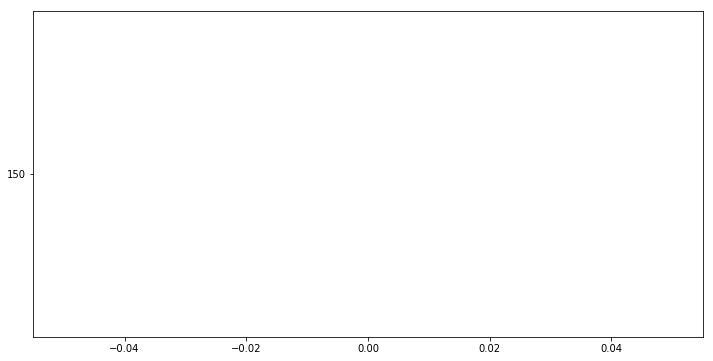

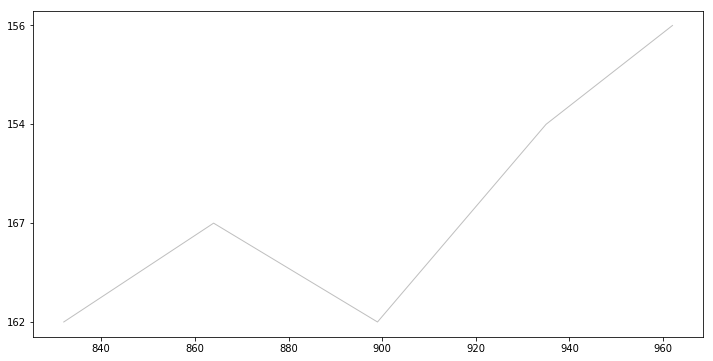

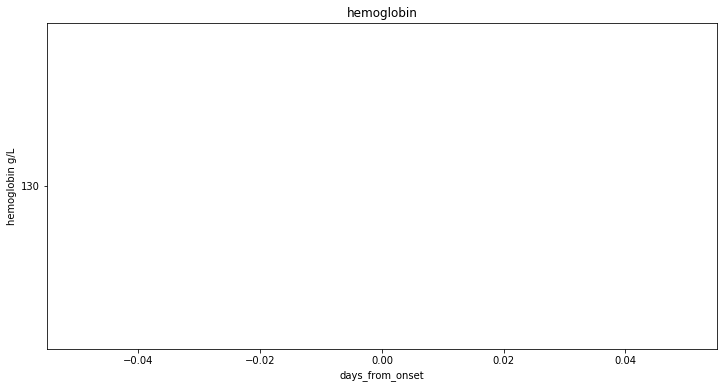

## Last lab day for each subject

In [169]:
gr = labs_onset.groupby('subject_id').max()
max_lab_date = gr.drop(['Test_Result','test_name','Study_Arm'], axis=1)
max_lab_date['max_lab_date_onset'] = max_lab_date['days_from_onset']
max_lab_date['max_lab_study_day'] = max_lab_date['study_day']
max_lab_date.drop(['days_from_onset', 'study_day'], axis=1, inplace=True)
max_lab_date.reset_index(drop=False, inplace=True)
max_lab_date.head()

subject_id  max_lab_date_onset  max_lab_study_day
0         329              1980.0              274.0
1         348               902.0              401.0
2         533                 NaN              287.0
3         649               898.0              557.0
4         708              1301.0              231.0

In [170]:
# save to csv
filename = 'clean_data/max_lab_date.csv'
max_lab_date.to_csv(filename, index=False)

## Make one big labs table  
- actually don't

In [38]:
# open the pickle file
with open('labs_list.pkl', 'rb') as f:
    labs_dfs = pickle.load(f)

In [39]:
len(labs_dfs)

128

In [75]:
labs_dfs[0].head(10)

subject_id  study_day hemoglobin hemoglobin unit
0         329        0.0        130             g/L
1         329       42.0        120             g/L
2         329       72.0        120             g/L
3         329      106.0        120             g/L
4         329      135.0        120             g/L
5         329      168.0        120             g/L
6         329      189.0        120             g/L
7         329      212.0        120             g/L
8         329      247.0        120             g/L
9         329      274.0        120             g/L

In [41]:
# get length of tables
table_len=[]
for i in range(len(labs_dfs)):
    table_len.append((i,len(labs_dfs[i])))
table_len=sorted(table_len, key=lambda x: x[1], reverse=True)

In [58]:
# get top 2 longest tables and merge
for i in range(3):
    inx = table_len[i][0]
    print(len(labs_dfs[inx]))
    if i ==0:
        new_table = labs_dfs[inx].copy()
    else:
        new_table = new_table.merge(labs_dfs[inx], how='outer', 
                                    on=['subject_id', 'study_day'])#,  indicator=True)

73646
70360
64655


In [59]:
print(new_table.shape)
new_table.head()

(91767, 8)


subject_id  study_day alt(sgpt) alt(sgpt) unit ast(sgot) ast(sgot) unit  \
0         329        0.0        18            U/L        20            U/L   
1         329       42.0        49            U/L        30            U/L   
2         329       72.0        29            U/L        21            U/L   
3         329      106.0        21            U/L        17            U/L   
4         329      135.0         9            U/L        10            U/L   

  bilirubin (total) bilirubin (total) unit  
0                 0                 umol/L  
1                 0                 umol/L  
2            17.104                 umol/L  
3            17.104                 umol/L  
4            17.104                 umol/L

In [51]:
new_table['_merge'].value_counts()

both          73888
left_only      3354
right_only      103
Name: _merge, dtype: int64

In [73]:
# get top 2 longest tables and merge
for i in range(2,4):
    inx = table_len[i][0]
    print(len(labs_dfs[inx]))
    if i ==0:
        x = labs_dfs[inx].copy()
    else:
        new_table = x.merge(labs_dfs[inx], how='outer', 
                                    on=['subject_id', 'study_day'], indicator=True)
    

64655
64070


In [74]:
print(new_table.shape)
new_table.head()

(78052, 7)


subject_id  study_day alt(sgpt) alt(sgpt) unit hemoglobin hemoglobin unit  \
0         329        0.0        18            U/L        130             g/L   
1         329       42.0        49            U/L        120             g/L   
2         329       72.0        29            U/L        120             g/L   
3         329      106.0        21            U/L        120             g/L   
4         329      135.0         9            U/L        120             g/L   

  _merge  
0   both  
1   both  
2   both  
3   both  
4   both

In [100]:
# get top 6 longest tables and merge
for i in range(5,6):
    inx = table_len[i][0]
    print(len(labs_dfs[inx]))
    if i ==0:
        new_table = labs_dfs[inx].copy()
    else:
        new_table = new_table.merge(labs_dfs[inx], how='outer', 
                                    on=['subject_id', 'study_day'])

63710


KeyboardInterrupt: 

In [ ]:
print(new_table.shape)
new_table.head()

In [3]:
for x in range(5,7):
    print(x)

5
6


In [98]:
sum((new_table['subject_id']==329) & (new_table['study_day']==0))

1

In [99]:
print(new_table.shape)
new_table.head(100)

(20811795, 16)


subject_id  study_day alt(sgpt) alt(sgpt) unit ast(sgot) ast(sgot) unit  \
0          329        0.0        18            U/L        20            U/L   
1          329       42.0        49            U/L        30            U/L   
2          329       72.0        29            U/L        21            U/L   
3          329      106.0        21            U/L        17            U/L   
4          329      135.0         9            U/L        10            U/L   
5          329      168.0        18            U/L        16            U/L   
6          329      189.0        30            U/L        20            U/L   
7          329      212.0         9            U/L        12            U/L   
8          329      247.0        11            U/L        11            U/L   
9          329      274.0        10            U/L        14            U/L   
10         348        0.0        27            U/L        23            U/L   
11         348       19.0        42            U/L        29            U/L   
12         348       61.0        55            U/L        40            U/L   
13         348       90.0        39            U/L        30            U/L   
14         348      120.0        47            U/L        30            U/L   
15         348      150.0        36            U/L        23            U/L   
16         348      201.0        33            U/L        26            U/L   
17         348      214.0        41            U/L        24            U/L   
18         348      250.0        36            U/L        25            U/L   
19         348      276.0        28            U/L        22            U/L   
20         348      306.0        35            U/L        24            U/L   
21         348      334.0        31            U/L        25            U/L   
22         348      366.0        36            U/L        24            U/L   
23         348      401.0        32            U/L        25            U/L   
24         533        0.0        18            U/L        23            U/L   
25         533       91.0        24            U/L        31            U/L   
26         533      189.0        21            U/L        27            U/L   
27         533      287.0        23            U/L        28            U/L   
28         649      -17.0        16            U/L        19            U/L   
29         649        0.0        10            U/L        14            U/L   
..         ...        ...       ...            ...       ...            ...   
70        1234      133.0        20            U/L        19            U/L   
71        1234      189.0        14            U/L        19            U/L   
72        1234      245.0        17            U/L        18            U/L   
73        1234      308.0        16            U/L        21            U/L   
74        1234      371.0        17            U/L        18            U/L   
75        1234      434.0        21            U/L        24            U/L   
76        1234      504.0        21            U/L        20            U/L   
77        1234      560.0        20            U/L        22            U/L   
78        1309        0.0        45            U/L        29            U/L   
79        1312        0.0        20            U/L        19            U/L   
80        1608        0.0        20            U/L        19            U/L   
81        1608       16.0        16            U/L       NaN            NaN   
82        1608       32.0        18            U/L       NaN            NaN   
83        1608       44.0        17            U/L       NaN            NaN   
84        1608       57.0        20            U/L        23            U/L   
85        1608      114.0        30            U/L        27            U/L   
86        1608      176.0        30            U/L        29            U/L   
87        1608      232.0        30            U/L        29            U/L   
88        1608      301.0        24            U/L    

In [209]:
labs_final = reduce(lambda left,right: pd.merge(left,right,
                                              on=['subject_id','study_day'], 
                                              how='outer'), lab_dfs)

KeyboardInterrupt: 

In [210]:
# save to csv
filename = 'clean_data/labs_clean.csv'
labs_final.to_csv(filename, index=False)

NameError: name 'labs_final' is not defined